## Plotting different kinematic variables at reco level for different $\kappa_\lambda$

First we will import all of the necessary packages and load the data

In [2]:
# load a coffea file
from coffea.util import load
import os
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea import hist, processor
#from pocket_coffea.parameters import defaults

from hist import Hist
import vector
vector.register_awkward()

import sys
#set the resolution of the figures
matplotlib.rcParams["figure.dpi"] = 300

ModuleNotFoundError: No module named 'coffea'

In [ ]:
#load data
prefix =  str(
    os.environ.get("HH", "/pnfs/psi.ch/cms/trivcat/store/user/mmalucch/out_HH4b/")
)
prefix='/work/mmalucch//out_hh4b/'

input_nc = prefix + "out_privateValidation_newJetCuts/output_all.coffea"
input_oc= prefix + "out_spanet/output_all.coffea"
input_nc_kl=  "/work/mmalucch/out_hh4b/out_spanet_newkl_newJetCuts/output_all.coffea"
#dataset with new cuts
o = load(f"{input_nc}")
#dataset with old cuts
oc= load(f"{input_oc}")
okl=load(f"{input_nc_kl}")

## Checking the effciency of the cuts

We will look at the cutflows dictionary for every kl dataset and check if the effciency of the cuts are more or less always the same (4-10%)

In [ ]:
#getting familiar with the datasets
print(oc.keys())
print(len(oc.keys()))
print(oc["cutflow"].keys())
print(oc["cutflow"]["initial"].keys())
print(type(oc["cutflow"]["initial"].keys()))
print(type(oc["cutflow"]["initial"]["GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022_postEE"]))

#creating a list of the keys
keys_list = list(oc["cutflow"]["initial"].keys())

# Printing the list of keys
print(keys_list)

print((keys_list[9]))

for i in range(11):
    print(keys_list[i])



NameError: name 'oc' is not defined

In [ ]:
#trying this for the dataset with new cuts   

print(o.keys())
print(o["cutflow"].keys())
print(o["cutflow"]["initial"].keys())
print((o["cutflow"]["initial"]["GluGlutoHHto4B_kl-m2p00_kt-1p00_c2-0p00_private__2022_postEE"]))
 
keys_list_2 = list(o["cutflow"]["initial"].keys())

# Printing the list of keys
print(len(keys_list_2))

for i in range(15):
    print(keys_list_2[i])

dict_keys(['sum_genweights', 'sum_signOf_genweights', 'sumw', 'sumw2', 'cutflow', 'variables', 'columns', 'processing_metadata', 'datasets_metadata'])
dict_keys(['initial', 'skim', 'presel', '4b_region'])
dict_keys(['GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_poisson__2022_postEE', 'GluGlutoHHto4B_kl-2p45_kt-1p00_c2-0p00_poisson__2022_postEE', 'GluGlutoHHto4B_kl-0p00_kt-1p00_c2-0p00_poisson__2022_postEE', 'GluGlutoHHto4B_kl-5p00_kt-1p00_c2-0p00_private__2022_postEE', 'GluGlutoHHto4B_kl-m2p00_kt-1p00_c2-0p00_private__2022_postEE', 'GluGlutoHHto4B_kl-2p45_kt-1p00_c2-0p00_private__2022_postEE', 'GluGlutoHHto4B_kl-0p00_kt-0p00_c2-0p00_private__2022_postEE', 'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_private__2022_postEE', 'GluGlutoHHto4B_kl-5p00_kt-1p00_c2-0p00_poisson__2022_postEE', 'GluGlutoHHto4B_kl-4p00_kt-1p00_c2-0p00_private__2022_postEE', 'GluGlutoHHto4B_kl-3p00_kt-1p00_c2-0p00_private__2022_postEE', 'GluGlutoHHto4B_kl-2p00_kt-1p00_c2-0p00_private__2022_postEE', 'GluGlutoHHto4B_kl-1p50_kt-

In [ ]:
def filter_dataset_2(datasets, key, key2):
    for dataset in datasets:
        if key in dataset and key2 in dataset:
            return dataset
    print("No dataset contains both keys.")
    return ""


print(o["cutflow"].keys())

print(filter_dataset_2(list(o["cutflow"]["initial"].keys()),"kl-1p00","poisson"))

def cutflow_info(o,dataset,k_l,p):
    #choose between ['initial', 'skim', 'presel', '4b_region']
    #selects the chosen k_l
    #print(o["cutflow"][dataset].keys())
    name=(filter_dataset_2(o["cutflow"][dataset].keys(), k_l,p))
    #print(name)
    col=o["cutflow"][dataset][name]
    #convert the keys from colum processor into numpy arrays
    return col


#defining the different number of events per kl for private samples
kl_1_private_o_i=cutflow_info(o,"initial","kl-1p00","private")
kl_0_private_o_i=cutflow_info(o,"initial","kl-0p00","private")
kl_2p45_private_o_i=cutflow_info(o,"initial","kl-2p45","private")
kl_5_private_o_i=cutflow_info(o,"initial","kl-5p00","private")

kl_1_private_o_skim=cutflow_info(o,"skim","kl-1p00","private")
kl_0_private_o_skim=cutflow_info(o,"skim","kl-0p00","private")
kl_2p45_private_o_skim=cutflow_info(o,"skim","kl-2p45","private")
kl_5_private_o_skim=cutflow_info(o,"skim","kl-5p00","private")

kl_1_private_o_presel=cutflow_info(o,"presel","kl-1p00","private")
kl_0_private_o_presel=cutflow_info(o,"presel","kl-0p00","private")
kl_2p45_private_o_presel=cutflow_info(o,"presel","kl-2p45","private")
kl_5_private_o_presel=cutflow_info(o,"presel","kl-5p00","private")

kl_1_private_o_4b_region=cutflow_info(o,"4b_region","kl-1p00","private")
kl_0_private_o_4b_region=cutflow_info(o,"4b_region","kl-0p00","private")
kl_2p45_private_o_4b_region=cutflow_info(o,"4b_region","kl-2p45","private")
kl_5_private_o_4b_region=cutflow_info(o,"4b_region","kl-5p00","private")

#defining the different number of events per kl for official samples

kl_1_official_o_i=cutflow_info(o,"initial","kl-1p00","poisson")
kl_0_official_o_i=cutflow_info(o,"initial","kl-0p00","poisson")
kl_2p45_official_o_i=cutflow_info(o,"initial","kl-2p45","poisson")
kl_5_official_o_i=cutflow_info(o,"initial","kl-5p00","poisson")

kl_1_official_o_4b_region=cutflow_info(o,"4b_region","kl-1p00","poisson")
kl_0_official_o_4b_region=cutflow_info(o,"4b_region","kl-0p00","poisson")
kl_2p45_official_o_4b_region=cutflow_info(o,"4b_region","kl-2p45","poisson")
kl_5_official_o_4b_region=cutflow_info(o,"4b_region","kl-5p00","poisson")

#defining the different number of events per kl for private samples with old cuts

kl_1_private_oc_i=cutflow_info(oc,"initial","kl-1p00","postEE")
kl_0_private_oc_i=cutflow_info(oc,"initial","kl-0p00","private")
kl_2p45_private_oc_i=cutflow_info(oc,"initial","kl-2p45","private")
kl_5_private_oc_i=cutflow_info(oc,"initial","kl-5p00","private")

kl_1_private_oc_4b_region=cutflow_info(oc,"4b_region","kl-1p00","postEE")
kl_0_private_oc_4b_region=cutflow_info(oc,"4b_region","kl-0p00","private")
kl_2p45_private_oc_4b_region=cutflow_info(oc,"4b_region","kl-2p45","private")
kl_5_private_oc_4b_region=cutflow_info(oc,"4b_region","kl-5p00","private")

print(kl_1_private_oc_i)
print(kl_1_official_o_i)
print(o["cutflow"]["initial"]["GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_poisson__2022_postEE"])


dict_keys(['initial', 'skim', 'presel', '4b_region'])
GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_poisson__2022_postEE
7391383
100000
100000


In [ ]:
#cutflow efficiencies for kl 1 new cuts

print("Initial number of events of the private sample with the new cuts for kl=1",kl_1_private_o_i)
print("Number of events of the private sample with the new cuts for kl=1",next(iter(kl_1_private_o_4b_region.values())))
print("Percentage of events in the 4b region with the new cuts for the private sample for kl=1:", (next(iter(kl_1_private_o_4b_region.values()))/kl_1_private_o_i)*100)

#cutflow efficiencies for kl 0 new cuts
print("Initial number of events of the private sample with the new cuts for kl=0",kl_0_private_o_i)
print("Number of events of the private sample with the new cuts for kl=0",next(iter(kl_0_private_o_4b_region.values())))
print("Percentage of events in the 4b region with the new cuts for the private sample for kl=0:", (next(iter(kl_0_private_o_4b_region.values()))/kl_0_private_o_i)*100)

#cutflow efficiencies for kl 2.45 new cut2p45
print("Initial number of events of the private sample with the new cuts for kl=2p45",kl_2p45_private_o_i)
print("Number of events of the private sample with the new cuts for kl=2p45",next(iter(kl_2p45_private_o_4b_region.values())))
print("Percentage of events in the 4b region with the new cuts for the private sample for kl=2p45:", (next(iter(kl_2p45_private_o_4b_region.values()))/kl_2p45_private_o_i)*100)

#cutflow efficiencies for kl 5 new cuts
print("Initial number of events of the private sample with the new cuts for kl=5",kl_5_private_o_i)
print("Number of events of the private sample with the new cuts for kl=5",next(iter(kl_5_private_o_4b_region.values())))
print("Percentage of events in the 4b region with the new cuts for the private sample for kl=5:", (next(iter(kl_5_private_o_4b_region.values()))/kl_5_private_o_i)*100)

Initial number of events of the private sample with the new cuts for kl=1 1496000
Number of events of the private sample with the new cuts for kl=1 158090
Percentage of events in the 4b region with the new cuts for the private sample for kl=1: 10.567513368983958
Initial number of events of the private sample with the new cuts for kl=0 1494015
Number of events of the private sample with the new cuts for kl=0 128068
Percentage of events in the 4b region with the new cuts for the private sample for kl=0: 8.5720692228659
Initial number of events of the private sample with the new cuts for kl=2p45 1489001
Number of events of the private sample with the new cuts for kl=2p45 162716
Percentage of events in the 4b region with the new cuts for the private sample for kl=2p45: 10.927863715336658
Initial number of events of the private sample with the new cuts for kl=5 1496012
Number of events of the private sample with the new cuts for kl=5 61644
Percentage of events in the 4b region with the new 

In [ ]:
kl=[1,0,"2p45",5]

for i in kl:
    kl_i_private_o_i=cutflow_info(o,"initial",f"kl-{i}","private")
    kl_i_private_o_4b_region=cutflow_info(o,"4b_region",f"kl-{i}","private")
    print(f"Initial number of events of the private sample with the new cuts for kl={i}",kl_i_private_o_i)
    print(f"Number of events of the private sample with the new cuts for kl={i}",next(iter(kl_i_private_o_4b_region.values())))
    print(f"Percentage of events in the 4b region with the new cuts for the private sample for kl={i}:", (next(iter(kl_i_private_o_4b_region.values()))/kl_i_private_o_i)*100)

Initial number of events of the private sample with the new cuts for kl=1 1496000
Number of events of the private sample with the new cuts for kl=1 158090
Percentage of events in the 4b region with the new cuts for the private sample for kl=1: 10.567513368983958
Initial number of events of the private sample with the new cuts for kl=0 1494015
Number of events of the private sample with the new cuts for kl=0 128068
Percentage of events in the 4b region with the new cuts for the private sample for kl=0: 8.5720692228659
Initial number of events of the private sample with the new cuts for kl=2p45 1489001
Number of events of the private sample with the new cuts for kl=2p45 162716
Percentage of events in the 4b region with the new cuts for the private sample for kl=2p45: 10.927863715336658
Initial number of events of the private sample with the new cuts for kl=5 1496012
Number of events of the private sample with the new cuts for kl=5 61644
Percentage of events in the 4b region with the new 

In [ ]:
kl=[1,0,"2p45",5]

for i in kl:
    kl_i_poisson_o_i=cutflow_info(o,"initial",f"kl-{i}","poisson")
    kl_i_poisson_o_4b_region=cutflow_info(o,"4b_region",f"kl-{i}","poisson")
    print(f"Initial number of events of the official sample with the new cuts for kl={i}",kl_i_poisson_o_i)
    print(f"Number of events of the official sample with the new cuts for kl={i}",next(iter(kl_i_poisson_o_4b_region.values())))
    print(f"Percentage of events in the 4b region with the new cuts for the official sample for kl={i}:", (next(iter(kl_i_poisson_o_4b_region.values()))/kl_i_poisson_o_i)*100)

Initial number of events of the official sample with the new cuts for kl=1 100000
Number of events of the official sample with the new cuts for kl=1 9855
Percentage of events in the 4b region with the new cuts for the official sample for kl=1: 9.855
Initial number of events of the official sample with the new cuts for kl=0 96000
Number of events of the official sample with the new cuts for kl=0 7643
Percentage of events in the 4b region with the new cuts for the official sample for kl=0: 7.961458333333334
Initial number of events of the official sample with the new cuts for kl=2p45 75500
Number of events of the official sample with the new cuts for kl=2p45 7653
Percentage of events in the 4b region with the new cuts for the official sample for kl=2p45: 10.136423841059603
Initial number of events of the official sample with the new cuts for kl=5 100000
Number of events of the official sample with the new cuts for kl=5 3826
Percentage of events in the 4b region with the new cuts for the 

In [ ]:
kl=[1,0,"2p45",5]

for i in kl:
    kl_i_priv_oc_i=cutflow_info(oc,"initial",f"kl-{i}","postEE")
    kl_i_priv_oc_4b_region=cutflow_info(oc,"4b_region",f"kl-{i}","postEE")
    print(f"Initial number of events of the private sample with the old cuts for kl={i}",kl_i_priv_oc_i)
    print(f"Number of events of the private sample with the old cuts for kl={i}",next(iter(kl_i_priv_oc_4b_region.values())))
    print(f"Percentage of events in the 4b region with the old cuts for the private sample for kl={i}:", (next(iter(kl_i_priv_oc_4b_region.values()))/kl_i_priv_oc_i)*100)

Initial number of events of the private sample with the old cuts for kl=1 7391383
Number of events of the private sample with the old cuts for kl=1 648550
Percentage of events in the 4b region with the old cuts for the private sample for kl=1: 8.774406629990626
Initial number of events of the private sample with the old cuts for kl=0 1494015
Number of events of the private sample with the old cuts for kl=0 103899
Percentage of events in the 4b region with the old cuts for the private sample for kl=0: 6.954347847913174
Initial number of events of the private sample with the old cuts for kl=2p45 1489001
Number of events of the private sample with the old cuts for kl=2p45 136482
Percentage of events in the 4b region with the old cuts for the private sample for kl=2p45: 9.166011305566618
Initial number of events of the private sample with the old cuts for kl=5 1496012
Number of events of the private sample with the old cuts for kl=5 42058
Percentage of events in the 4b region with the old 

In [ ]:
print(oc["cutflow"]["initial"].keys())
print(oc["cutflow"]["initial"]['GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022_postEE'])
print(oc["cutflow"]["initial"]['GluGlutoHHto4B_kl-m1p00_kt-1p00_c2-0p00_private__2022_postEE'])
print(oc["cutflow"]["4b_region"]['GluGlutoHHto4B_kl-m1p00_kt-1p00_c2-0p00_private__2022_postEE'])
print((next(iter(oc["cutflow"]["4b_region"]['GluGlutoHHto4B_kl-m1p00_kt-1p00_c2-0p00_private__2022_postEE'].values()))/oc["cutflow"]["initial"]['GluGlutoHHto4B_kl-m1p00_kt-1p00_c2-0p00_private__2022_postEE'])*100)

print(cutflow_info(oc,"initial",f"kl-1","postEE"))

dict_keys(['GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022_postEE', 'GluGlutoHHto4B_kl-5p00_kt-1p00_c2-0p00_private__2022_postEE', 'GluGlutoHHto4B_kl-m2p00_kt-1p00_c2-0p00_private__2022_postEE', 'GluGlutoHHto4B_kl-2p45_kt-1p00_c2-0p00_private__2022_postEE', 'GluGlutoHHto4B_kl-0p00_kt-0p00_c2-0p00_private__2022_postEE', 'GluGlutoHHto4B_kl-4p00_kt-1p00_c2-0p00_private__2022_postEE', 'GluGlutoHHto4B_kl-3p00_kt-1p00_c2-0p00_private__2022_postEE', 'GluGlutoHHto4B_kl-2p00_kt-1p00_c2-0p00_private__2022_postEE', 'GluGlutoHHto4B_kl-1p50_kt-1p00_c2-0p00_private__2022_postEE', 'GluGlutoHHto4B_kl-0p50_kt-1p00_c2-0p00_private__2022_postEE', 'GluGlutoHHto4B_kl-m1p00_kt-1p00_c2-0p00_private__2022_postEE'])
7391383
1492007
{'GluGlutoHHto4B_spanet': 89687}
6.011164826974672
7391383


In [ ]:
print(okl.keys())
print(okl["cutflow"].keys())
print(okl["cutflow"]["initial"].keys())

keys_list_3=list(okl["cutflow"]["initial"].keys())
print(len(keys_list_3))

for i in range(12):
    print(keys_list_3[i])
    
for i in range(14):
    print(keys_list_2[i])

dict_keys(['sum_genweights', 'sum_signOf_genweights', 'sumw', 'sumw2', 'cutflow', 'variables', 'columns', 'processing_metadata', 'datasets_metadata'])
dict_keys(['initial', 'skim', 'presel', '4b_region'])
dict_keys(['GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_spanet__2022_postEE', 'GluGlutoHHto4B_kl-m2p00_kt-1p00_c2-0p00_private_spanet__2022_postEE', 'GluGlutoHHto4B_kl-m1p00_kt-1p00_c2-0p00_private_spanet__2022_postEE', 'GluGlutoHHto4B_kl-5p00_kt-1p00_c2-0p00_private_spanet__2022_postEE', 'GluGlutoHHto4B_kl-2p45_kt-1p00_c2-0p00_private_spanet__2022_postEE', 'GluGlutoHHto4B_kl-0p00_kt-0p00_c2-0p00_private_spanet__2022_postEE', 'GluGlutoHHto4B_kl-3p50_kt-1p00_c2-0p00_private_spanet__2022_postEE', 'GluGlutoHHto4B_kl-4p00_kt-1p00_c2-0p00_private_spanet__2022_postEE', 'GluGlutoHHto4B_kl-3p00_kt-1p00_c2-0p00_private_spanet__2022_postEE', 'GluGlutoHHto4B_kl-2p00_kt-1p00_c2-0p00_private_spanet__2022_postEE', 'GluGlutoHHto4B_kl-1p50_kt-1p00_c2-0p00_private_spanet__2022_postEE', 'GluGlutoHHto4B_kl-0

In [ ]:
kl=[1,0,"2p45","3p50",5]

for i in kl:
    kl_i_priv_okl_i=cutflow_info(okl,"initial",f"kl-{i}","postEE")
    kl_i_priv_okl_4b_region=cutflow_info(okl,"4b_region",f"kl-{i}","postEE")
    print(f"Initial number of events of the private sample with the new cuts for kl={i}",kl_i_priv_okl_i)
    print(f"Number of events of the private sample with the new cuts for kl={i}",next(iter(kl_i_priv_okl_4b_region.values())))
    print(f"Percentage of events in the 4b region with the new cuts for the private sample for kl={i}:", (next(iter(kl_i_priv_okl_4b_region.values()))/kl_i_priv_okl_i)*100)

Initial number of events of the private sample with the new cuts for kl=1 7391383
Number of events of the private sample with the new cuts for kl=1 776858
Percentage of events in the 4b region with the new cuts for the private sample for kl=1: 10.510319922536825
Initial number of events of the private sample with the new cuts for kl=0 1494015
Number of events of the private sample with the new cuts for kl=0 128068
Percentage of events in the 4b region with the new cuts for the private sample for kl=0: 8.5720692228659
Initial number of events of the private sample with the new cuts for kl=2p45 1489001
Number of events of the private sample with the new cuts for kl=2p45 162716
Percentage of events in the 4b region with the new cuts for the private sample for kl=2p45: 10.927863715336658
Initial number of events of the private sample with the new cuts for kl=3p50 1434223
Number of events of the private sample with the new cuts for kl=3p50 79865
Percentage of events in the 4b region with th

## Separating the different $\kappa_\lambda$ datasets

So as to compare the different $\kappa_\lambda$ at reco level, we need to plot different kinemtic varibales in both the private and offcial samples to then compare these. The diffreent kinematical variables we want to plot are the following : 

- $\Delta \eta_{HH}$
- $\Delta \Phi_{HH}$
- $\eta_{H_1}$
- $\eta_{H_2}$
- $\eta_{HH}$
- $P_T^{H_1}$
- $P_T^{H_2}$
- $P_T^{HH}$
- $m_{HH}$

Let's start by separting the $\kappa_\lambda$ in the input file

In [ ]:
def filter_dataset(datasets, key):
    for dataset in datasets:
        if key in dataset:
            return dataset 
    print(type(dataset))
    return "" 

def kl_var(o,data,k_l,var):
    #choose between official (data=0) and private (data=1)
    sample=list(o["columns"].keys())[data]
    #selects the chosen k_l
    dataset=(filter_dataset(o["columns"][sample].keys(), k_l))
    #category 4b
    category=list(o["columns"][sample][dataset].keys())[var]
    col=o["columns"][sample][dataset][category]
    #convert the keys from colum processor into numpy arrays
    return col

kl_var(o,1,"kl-2p45",0)
print(type(kl_var(o,1,"kl-2p45",0)["JetGoodHiggs_N"]))

<class 'coffea.processor.accumulator.column_accumulator'>


In [ ]:
#defining the different k_l with new cuts
kl_1_official=kl_var(o,0,"kl-1p00",0)
kl_0_official=kl_var(o,0,"kl-0p00",0)
kl_2p45_official=kl_var(o,0,"kl-2p45",0)
kl_5_official=kl_var(o,0,"kl-5p00",0)

kl_1_private=kl_var(o,1,"kl-1p00",0)
kl_0_private=kl_var(o,1,"kl-0p00",0)
kl_2p45_private=kl_var(o,1,"kl-2p45",0)
kl_5_private=kl_var(o,1,"kl-5p00",0)

In [ ]:
#converting the dataset keys from column_accumulator to np.array
print(type(kl_5_private))

kl_datasets=[kl_1_official,kl_0_official,kl_2p45_official,kl_5_official,kl_1_private,kl_0_private,kl_2p45_private,kl_5_private]
print(type(kl_datasets[0]["weight"]))

#print(ak.sum(kl_0_official["weight"]))

for dataset in kl_datasets:
    #print("Dataset type:", (dataset))
    for key in dataset.keys():
        # Check if the item is an instance of column_accumulator
        if hasattr(dataset[key], 'value'):
            #print(f"Converting {key} from column_accumulator to np.array")
            dataset[key] = dataset[key].value
        else:
            print(f"{key} is already a np.array or another type: {type(dataset[key])}")
            
print(type(kl_datasets[0]["weight"]))

<class 'dict'>
<class 'coffea.processor.accumulator.column_accumulator'>
<class 'numpy.ndarray'>


In [ ]:
#defining a 4 vector
# jet_pt = kl_0_official["JetGoodHiggsMatched_pt"]
# jet_ptPNetRegNeutrino = kl_0_official["JetGoodHiggsMatched_ptPnetRegNeutrino"]
# jet_eta = kl_0_official["JetGoodHiggsMatched_eta"]
# jet_phi = kl_0_official["JetGoodHiggsMatched_phi"]
# jet_mass = kl_0_official["JetGoodHiggsMatched_mass"]
# jet_btag = kl_0_official["JetGoodHiggsMatched_btagPNetB"]
# jet_prov= kl_0_official["JetGoodHiggsMatched_provenance"]

# print(type(jet_pt))

# jet = ak.zip(
#     {
#         # "pt": jet_pt,
#         "pt": jet_ptPNetRegNeutrino,
#         "eta": jet_eta,
#         "phi": jet_phi,
#         "mass": jet_mass,
#         "btag": jet_btag,
#         "prov": jet_prov
#     },with_name="Momentum4D"
# )

# #test to veryfy it is working: if it does not work  check that vector is imported

# print(len(jet.pt))
# print(jet)
# print("px",jet.px)
# print("py",jet.py)
# print("pz",jet.pz)
# print("E",jet.E)
# jet_sum=jet[0]+jet[1]
# print("pt",jet.pt)
# print("pt sum",jet_sum.pt)

In [ ]:
def jet_four_vector(kl_dataset):
    jet_pt = kl_dataset["JetGoodHiggsMatched_pt"]
    jet_ptPNetRegNeutrino = kl_dataset["JetGoodHiggsMatched_ptPnetRegNeutrino"]
    jet_eta = kl_dataset["JetGoodHiggsMatched_eta"]
    jet_phi = kl_dataset["JetGoodHiggsMatched_phi"]  
    jet_mass = kl_dataset["JetGoodHiggsMatched_mass"]
    jet_btag = kl_dataset["JetGoodHiggsMatched_btagPNetB"]
    jet_prov= kl_dataset["JetGoodHiggsMatched_provenance"]
    
    jet = ak.zip(
    {
        # "pt": jet_pt,
        "pt": jet_ptPNetRegNeutrino,
        "eta": jet_eta,
        "phi": jet_phi,
        "mass": jet_mass,
        "btag": jet_btag,
        "prov": jet_prov
    },with_name="Momentum4D"
    )
    
    return jet

kl_datasets=[kl_1_official,kl_0_official,kl_2p45_official,kl_5_official,kl_1_private,kl_0_private,kl_2p45_private,kl_5_private]
for k in kl_datasets:
    print(jet_four_vector(k).px)

[113, -27.5, 5.26, -64, -102, 43.2, 42.9, ... -40.8, 12.9, -31.1, -6.47, 95.1, 37.3]


[-51.4, 61.4, -14, -34.7, 5.2, -36.1, -66.5, ... 158, -999, 26.1, -53.4, -38.3, 43.5]
[-147, -124, -62.3, -999, 148, 9.94, -86.8, ... 173, -107, 52.8, -70.6, -96.6, 84.9]
[-49.9, -96.1, -87.5, 31.9, 64.8, 50.1, ... -20.3, 106, -72.9, 33.5, -24.1, 6.87]
[-73.2, 46.2, -9.69, -76.2, -7.65, 191, -65.1, ... 54, 97, -40, -61.8, 71.8, 42.4]
[-1.27, 70.4, -87.1, 3.9, -164, 120, 37.8, ... 32.4, -999, 50.3, 58.4, 4.61, -108]
[64.1, -49.7, 80.5, -61.7, -114, 29.3, ... -70.5, 58.3, -115, -56.3, 58.8, 27.4]
[-61.6, 44.2, 25.4, -28.7, -45, -42.1, 20.6, ... 88.4, 52.3, 59.2, 22.4, -50.4, 32.1]


In [ ]:
#creating the 4 vectors for each kl dataset

jet_four_vector_kl_1_official_hand =jet_four_vector(kl_1_official)
jet_four_vector_kl_0_official =jet_four_vector(kl_0_official)
jet_four_vector_kl_2p45_official =jet_four_vector(kl_2p45_official)
jet_four_vector_kl_5_official =jet_four_vector(kl_5_official)

jet_four_vector_kl_1_private =jet_four_vector(kl_1_private)
jet_four_vector_kl_0_private =jet_four_vector(kl_0_private)
jet_four_vector_kl_2p45_private =jet_four_vector(kl_2p45_private)
jet_four_vector_kl_5_private =jet_four_vector(kl_5_private)


In [ ]:
# dataset_names = ["kl_1_official", "kl_0_official", "kl_2p45_official", "kl_5_official",
#                  "kl_1_private", "kl_0_private", "kl_2p45_private", "kl_5_private"]

# for dataset, name in zip(kl_datasets, dataset_names):
#     # Using globals() to dynamically create variable names and assign function outputs.
#     globals()[f"jet_4_vector_{name}"] = jet_four_vector(dataset)
#     print(f"jet_4_vector_{name}")

# # Now you can access these variables directly by their names:
# print(jet_4_vector_kl_1_official)
# print(jet_4_vector_kl_0_official)

# jet_four_vector_kl_1_official_hand =jet_four_vector(kl_1_official)

# print(jet_4_vector_kl_1_official==jet_four_vector_kl_1_official_hand)

In [ ]:
# defining a 4 vector with only fully matched events in order to reconstruct the Higgs candidates
# jet_prov_unflat=ak.unflatten(jet.prov,kl_0_official["JetGoodHiggsMatched_N"] )
# jet_pt_unflat=ak.unflatten(jet.pt,kl_0_official["JetGoodHiggsMatched_N"])
# jet_eta_unflat=ak.unflatten(jet.eta,kl_0_official["JetGoodHiggsMatched_N"])
# jet_phi_unflat=ak.unflatten(jet.phi,kl_0_official["JetGoodHiggsMatched_N"])
# jet_mass_unflat=ak.unflatten(jet.mass,kl_0_official["JetGoodHiggsMatched_N"])
# jet_btag_unflat=ak.unflatten(jet.btag,kl_0_official["JetGoodHiggsMatched_N"])
# print(jet_pt_unflat)

# count_ones = ak.sum(jet_prov_unflat == 1, axis=1)
# count_twos = ak.sum(jet_prov_unflat == 2, axis=1)

# mask_fully_matched = (count_ones == 2) & (count_twos == 2)

# jet_fully_matched = ak.zip(
#     {
#         "pt": jet_pt_unflat[mask_fully_matched],
#         "eta": jet_eta_unflat[mask_fully_matched],  # Assume you have jet_eta_unflat similarly defined
#         "phi": jet_phi_unflat[mask_fully_matched],  # Assume you have jet_phi_unflat similarly defined
#         "mass": jet_mass_unflat[mask_fully_matched],  # Assume you have jet_mass_unflat similarly defined
#         "btag": jet_btag_unflat[mask_fully_matched],  # Assume you have jet_btag_unflat similarly defined
#         "prov": jet_prov_unflat[mask_fully_matched]
#     }, with_name="Momentum4D"
# )

# print(type(jet_fully_matched.pt))
# print("sum", jet_fully_matched[:,0]+jet_fully_matched[:,1])
# print("sum pt", (jet_fully_matched[:,0]+jet_fully_matched[:,1]).pt )

In [ ]:
#four vector for only fully matched events
def jet_four_vector_fully_matched(kl_dataset):
    jet_prov_unflat=ak.unflatten(jet_four_vector(kl_dataset).prov,kl_dataset["JetGoodHiggsMatched_N"] )
    jet_pt_unflat=ak.unflatten(jet_four_vector(kl_dataset).pt,kl_dataset["JetGoodHiggsMatched_N"])
    jet_eta_unflat=ak.unflatten(jet_four_vector(kl_dataset).eta,kl_dataset["JetGoodHiggsMatched_N"])
    jet_phi_unflat=ak.unflatten(jet_four_vector(kl_dataset).phi,kl_dataset["JetGoodHiggsMatched_N"])
    jet_mass_unflat=ak.unflatten(jet_four_vector(kl_dataset).mass,kl_dataset["JetGoodHiggsMatched_N"])
    jet_btag_unflat=ak.unflatten(jet_four_vector(kl_dataset).btag,kl_dataset["JetGoodHiggsMatched_N"])
    
    count_ones = ak.sum(jet_prov_unflat == 1, axis=1)
    count_twos = ak.sum(jet_prov_unflat == 2, axis=1)

    mask_fully_matched = (count_ones == 2) & (count_twos == 2)

    jet_fully_matched = ak.zip(
        {
            "pt": jet_pt_unflat[mask_fully_matched],
            "eta": jet_eta_unflat[mask_fully_matched],  # Assume you have jet_eta_unflat similarly defined
            "phi": jet_phi_unflat[mask_fully_matched],  # Assume you have jet_phi_unflat similarly defined
            "mass": jet_mass_unflat[mask_fully_matched],  # Assume you have jet_mass_unflat similarly defined
            "btag": jet_btag_unflat[mask_fully_matched],  # Assume you have jet_btag_unflat similarly defined
            "prov": jet_prov_unflat[mask_fully_matched]
        }, with_name="Momentum4D"
    )
    
    return jet_fully_matched

kl_datasets=[kl_1_official,kl_0_official,kl_2p45_official,kl_5_official,kl_1_private,kl_0_private,kl_2p45_private,kl_5_private]
for k in kl_datasets:
    print(jet_four_vector_fully_matched(k).px)

[[113, -27.5, 5.26, -64], [39.9, -125, ... -40.8, 12.9], [-31.1, -6.47, 95.1, 37.3]]
[[-51.4, 61.4, -14, -34.7], [20.5, -40.3, ... 110, 15.6], [26.1, -53.4, -38.3, 43.5]]
[[148, 9.94, -86.8, 48.8], [-69.3, 36.6, ... 59.2, 105], [52.8, -70.6, -96.6, 84.9]]
[[-49.9, -96.1, -87.5, 31.9], [64.8, 50.1, ... 106], [-72.9, 33.5, -24.1, 6.87]]
[[-73.2, 46.2, -9.69, -76.2], [-7.65, 191, ... 54, 97], [-40, -61.8, 71.8, 42.4]]
[[-1.27, 70.4, -87.1, 3.9], [-164, 120, ... 39.8, -141], [50.3, 58.4, 4.61, -108]]
[[64.1, -49.7, 80.5, -61.7], [-114, 29.3, ... 58.3], [-115, -56.3, 58.8, 27.4]]
[[-61.6, 44.2, 25.4, -28.7], [-45, -42.1, ... 88.4, 52.3], [59.2, 22.4, -50.4, 32.1]]


In [ ]:
# for dataset, name in zip(kl_datasets, dataset_names):
#     # Using globals() to dynamically create variable names and assign function outputs.
#     globals()[f"jet_4_vector_fullly_matched_{name}"] = jet_four_vector_fully_matched(dataset)
#     print(f"jet_4_vector_fullly_matched_{name}")


jet_four_vector_kl_1_official_fully_matched =jet_four_vector_fully_matched(kl_1_official)
jet_four_vector_kl_0_official_fully_matched =jet_four_vector_fully_matched(kl_0_official)
jet_four_vector_kl_2p45_official_fully_matched =jet_four_vector_fully_matched(kl_2p45_official)
jet_four_vector_kl_5_official_fully_matched =jet_four_vector_fully_matched(kl_5_official)

jet_four_vector_kl_1_private_fully_matched =jet_four_vector_fully_matched(kl_1_private)
jet_four_vector_kl_0_private_fully_matched =jet_four_vector_fully_matched(kl_0_private)
jet_four_vector_kl_2p45_private_fully_matched =jet_four_vector_fully_matched(kl_2p45_private)
jet_four_vector_kl_5_private_fully_matched =jet_four_vector_fully_matched(kl_5_private)

In [ ]:

print(len(jet_four_vector_kl_1_official_fully_matched))
print(len(jet_four_vector_kl_0_official_fully_matched))
print(len(jet_four_vector_kl_2p45_official_fully_matched))
print(len(jet_four_vector_kl_5_official_fully_matched))


print(len(jet_four_vector_kl_1_private_fully_matched))
print(len(jet_four_vector_kl_0_private_fully_matched))
print(len(jet_four_vector_kl_2p45_private_fully_matched))
print(len(jet_four_vector_kl_5_private_fully_matched))


8619
6617
6649
3067
140247
112330
143510
50344


In [ ]:
print(len(kl_1_official["JetGoodHiggsMatched_pt"]))
print(len(kl_0_official["JetGoodHiggsMatched_pt"]))
print(len(kl_2p45_official["JetGoodHiggsMatched_pt"]))
print(len(kl_5_official["JetGoodHiggsMatched_pt"]))

print(len(kl_1_private["JetGoodHiggsMatched_pt"]))
print(len(kl_0_private["JetGoodHiggsMatched_pt"]))
print(len(kl_2p45_private["JetGoodHiggsMatched_pt"]))
print(len(kl_5_private["JetGoodHiggsMatched_pt"]))

39420
30572
30612
15304
632360
512272
650864
246576


## Reconstructing H1

In [ ]:
#From the fully matched events we select only the jets that have provenance 1

# mask_prov_1=jet_fully_matched.prov==1
# jet_fully_matched_1=jet_fully_matched[mask_prov_1]
# print(jet_fully_matched_1)
# print(jet_fully_matched_1.px)

# #By summing the 4 vectors we obtain the reconstructed H1

# reco_higgs_1=jet_fully_matched_1[:,0]+jet_fully_matched_1[:,1]

# print(reco_higgs_1.px)

In [ ]:
def reco_higgs_1(kl_datasets):
    mask_prov_1=jet_four_vector_fully_matched(kl_datasets).prov==1
    jet_fully_matched_1=jet_four_vector_fully_matched(kl_datasets)[mask_prov_1]
    reco_higgs_1=jet_fully_matched_1[:,0]+jet_fully_matched_1[:,1]
    
    return reco_higgs_1

In [ ]:
type(jet_four_vector_fully_matched(kl_1_official))

vector.backends.awkward.MomentumArray4D

In [ ]:
reco_higgs_1_kl_1_official=reco_higgs_1(kl_1_official)
reco_higgs_1_kl_0_official =reco_higgs_1(kl_0_official)
reco_higgs_1_kl_2p45_official =reco_higgs_1(kl_2p45_official)
reco_higgs_1_kl_5_official =reco_higgs_1(kl_5_official)

reco_higgs_1_kl_1_private =reco_higgs_1(kl_1_private)
reco_higgs_1_kl_0_private =reco_higgs_1(kl_0_private)
reco_higgs_1_kl_2p45_private =reco_higgs_1(kl_2p45_private)
reco_higgs_1_kl_5_private =reco_higgs_1(kl_5_private)


In [ ]:
print(reco_higgs_1_kl_1_official.eta)

[0.653, 1.82, -1.57, 0.0136, -1.15, -1.28, ... -0.814, -0.627, -0.204, 0.307, 1.87]


## Reconstructing H2

In [ ]:
# #From the fully matched events we select only the jets that have provenance 2

# mask_prov_2=jet_fully_matched.prov==2
# jet_fully_matched_2=jet_fully_matched[mask_prov_2]
# print(jet_fully_matched_2)
# print(jet_fully_matched_2.px)

# #By summing the 4 vectors we obtain the reconstructed H2
# reco_higgs_2=jet_fully_matched_2[:,0]+jet_fully_matched_2[:,1]

# print(reco_higgs_2.px)

In [ ]:
def reco_higgs_2(kl_datasets):
    mask_prov_2=jet_four_vector_fully_matched(kl_datasets).prov==2
    jet_fully_matched_2=jet_four_vector_fully_matched(kl_datasets)[mask_prov_2]
    reco_higgs_2=jet_fully_matched_2[:,0]+jet_fully_matched_2[:,1]
    
    return reco_higgs_2

In [ ]:
reco_higgs_2_kl_1_official=reco_higgs_2(kl_1_official)
reco_higgs_2_kl_0_official =reco_higgs_2(kl_0_official)
reco_higgs_2_kl_2p45_official =reco_higgs_2(kl_2p45_official)
reco_higgs_2_kl_5_official =reco_higgs_2(kl_5_official)

reco_higgs_2_kl_1_private =reco_higgs_2(kl_1_private)
reco_higgs_2_kl_0_private =reco_higgs_2(kl_0_private)
reco_higgs_2_kl_2p45_private =reco_higgs_2(kl_2p45_private)
reco_higgs_2_kl_5_private =reco_higgs_2(kl_5_private)

## Reconstructing HH

In [ ]:
#from the fully matched events, we can reconstruct the di higgs system by summing the 4 4vector

# reco_hh=jet_fully_matched[:,0]+jet_fully_matched[:,1]+jet_fully_matched[:,2]+jet_fully_matched[:,3]
# print(jet_fully_matched.px)
# print(reco_hh.px)

In [ ]:
# def reco_hh(kl_datasets):
#     reco_hh = jet_four_vector_fully_matched(kl_datasets)[:,0]+ jet_four_vector_fully_matched(kl_datasets)+ jet_four_vector_fully_matched(kl_datasets)[:,2]+ jet_four_vector_fully_matched(kl_datasets)[:,3]
#     return reco_hh

In [ ]:
def reco_hh(kl_datasets):
    reco_hh = reco_higgs_2(kl_datasets)+ reco_higgs_1(kl_datasets)
    return reco_hh

In [ ]:
reco_hh_kl_1_official=reco_hh(kl_1_official)
reco_hh_kl_0_official =reco_hh(kl_0_official)
reco_hh_kl_2p45_official =reco_hh(kl_2p45_official)
reco_hh_kl_5_official =reco_hh(kl_5_official)

reco_hh_kl_1_private =reco_hh(kl_1_private)
reco_hh_kl_0_private =reco_hh(kl_0_private)
reco_hh_kl_2p45_private =reco_hh(kl_2p45_private)
reco_hh_kl_5_private =reco_hh(kl_5_private)

print(reco_hh_kl_1_official)

[{rho: 27.1, phi: -0.0972, eta: 2.86, tau: 323}, ... phi: 0.5, eta: 2.38, tau: 257}]


In [ ]:
reco_higgs_2_list=[reco_higgs_2_kl_1_official,reco_higgs_2_kl_0_official,reco_higgs_2_kl_2p45_official,reco_higgs_2_kl_5_official,reco_higgs_2_kl_1_private,reco_higgs_2_kl_0_private,reco_higgs_2_kl_2p45_private,reco_higgs_2_kl_5_private]
reco_higgs_1_list=[reco_higgs_1_kl_1_official,reco_higgs_1_kl_0_official,reco_higgs_1_kl_2p45_official,reco_higgs_1_kl_5_official,reco_higgs_1_kl_1_private,reco_higgs_1_kl_0_private,reco_higgs_1_kl_2p45_private,reco_higgs_1_kl_5_private]

## Plotting the kinetmatical variables
Now that we havee reconstructed our Higgs candidiates, we just now need to plot the different variables

In [ ]:

#kl_value=["$\kappa_\lambda 1$","$\kappa_\lambda 0$","$\kappa_\lambda 2.45$","$\kappa_\lambda 5$"]

def plot_higgs_eta(official_data, private_data, kl_value, higgs_number):
    plt.figure(figsize=(8, 4))
    plt.hist(official_data.eta, bins=np.linspace(-6, 6, 120), histtype="step", label="official", density=True)
    plt.hist(private_data.eta, bins=np.linspace(-6, 6, 120), histtype="step", label="private", density=True)
    
    plt.xlabel(f"$\eta$ of the {higgs_number} of the leading Higgs")
    plt.title(f"$\eta$ of the {higgs_number} Higgs with $\\kappa_\\lambda$ {kl_value} (private vs. official)")
    plt.legend()
    plt.show()
    
# plot_higgs_eta(reco_higgs_1_kl_1_official, reco_higgs_1_kl_1_private, 1, "leading")
# plot_higgs_eta(reco_higgs_1_kl_0_official, reco_higgs_1_kl_0_private, 0, "leading")
# plot_higgs_eta(reco_higgs_1_kl_2p45_official, reco_higgs_1_kl_2p45_private, 2.45, "leading")
# plot_higgs_eta(reco_higgs_1_kl_5_official, reco_higgs_1_kl_5_private, 5, "leading")


In [ ]:
# plot_higgs_eta(reco_higgs_2_kl_1_official, reco_higgs_2_kl_1_private, 1, "subleading")
# plot_higgs_eta(reco_higgs_2_kl_0_official, reco_higgs_2_kl_0_private, 0, "subleading")
# plot_higgs_eta(reco_higgs_2_kl_2p45_official, reco_higgs_2_kl_2p45_private, 2.45, "subleading")
# plot_higgs_eta(reco_higgs_2_kl_5_official, reco_higgs_2_kl_5_private, 5, "subleading")

In [ ]:
def plot_higgs_pt(official_data, private_data, kl_value, higgs_number):
    plt.figure(figsize=(8, 4))
    plt.hist(official_data.pt, bins=np.linspace(0, 600, 120), histtype="step", label="official", density=True)
    plt.hist(private_data.pt, bins=np.linspace(0, 600, 120), histtype="step", label="private", density=True)
    
    plt.xlabel("$p_t$ value of the leading Higgs")
    plt.title(f"$p_t$ value of the {higgs_number} Higgs with $\\kappa_\\lambda$ {kl_value} (private vs. official)")
    plt.legend()
    plt.show()
    
# plot_higgs_pt(reco_higgs_1_kl_1_official, reco_higgs_1_kl_1_private, 1, "leading")
# plot_higgs_pt(reco_higgs_1_kl_0_official, reco_higgs_1_kl_0_private, 0, "leading")
# plot_higgs_pt(reco_higgs_1_kl_2p45_official, reco_higgs_1_kl_2p45_private, 2.45, "leading")
# plot_higgs_pt(reco_higgs_1_kl_5_official, reco_higgs_1_kl_5_private, 5, "leading")

In [ ]:
# plot_higgs_pt(reco_higgs_2_kl_1_official, reco_higgs_2_kl_1_private, 1, "subleading")
# plot_higgs_pt(reco_higgs_2_kl_0_official, reco_higgs_2_kl_0_private, 0, "subleading")
# plot_higgs_pt(reco_higgs_2_kl_2p45_official, reco_higgs_2_kl_2p45_private, 2.45, "subleading")
# plot_higgs_pt(reco_higgs_2_kl_5_official, reco_higgs_2_kl_5_private, 5, "subleading")

In [ ]:
# plot_higgs_pt(reco_hh_kl_1_official, reco_hh_kl_1_private, 1, "di")
# plot_higgs_pt(reco_hh_kl_0_official, reco_hh_kl_0_private, 0, "di")
# plot_higgs_pt(reco_hh_kl_2p45_official, reco_hh_kl_2p45_private, 2.45, "di")
# plot_higgs_pt(reco_hh_kl_5_official, reco_hh_kl_5_private, 5, "di")

In [ ]:
# plot_higgs_eta(reco_hh_kl_1_official, reco_hh_kl_1_private, 1, "di")
# plot_higgs_eta(reco_hh_kl_0_official, reco_hh_kl_0_private, 0, "di")
# plot_higgs_eta(reco_hh_kl_2p45_official, reco_hh_kl_2p45_private, 2.45, "di")
# plot_higgs_eta(reco_hh_kl_5_official, reco_hh_kl_5_private, 5, "di")

In [ ]:
def plot_higgs_mass(official_data, private_data, kl_value, higgs_number):
    plt.figure(figsize=(8, 4))
    plt.hist(official_data.mass, bins=np.linspace(0, 1500, 120), histtype="step", label="official", density=True)
    plt.hist(private_data.mass, bins=np.linspace(0, 1500, 120), histtype="step", label="private", density=True)
    
    plt.xlabel("Invariant mass value of the leading Higgs")
    plt.title(f"Invariant mass value of the {higgs_number} Higgs with $\\kappa_\\lambda$ {kl_value} (private vs. official)")
    plt.legend()
    plt.show()

In [ ]:
# plot_higgs_mass(reco_hh_kl_1_official, reco_hh_kl_1_private, 1, "di")
# plot_higgs_mass(reco_hh_kl_0_official, reco_hh_kl_0_private, 0, "di")
# plot_higgs_mass(reco_hh_kl_2p45_official, reco_hh_kl_2p45_private, 2.45, "di")
# plot_higgs_mass(reco_hh_kl_5_official, reco_hh_kl_5_private, 5, "di")

In [ ]:
def plot_diff_higgs_eta(official_data_1,official_data_2, private_data_1, private_data_2, kl_value, higgs_number):
    official_data= official_data_1.eta-official_data_2.eta
    private_data= private_data_1.eta-private_data_2.eta
    plt.figure(figsize=(8, 4))
    plt.hist(official_data, bins=np.linspace(-3, 3, 120), histtype="step", label="official", density=True)
    plt.hist(private_data, bins=np.linspace(-3, 3, 120), histtype="step", label="private", density=True)
    
    plt.xlabel("Eta value of the leading Higgs")
    plt.title(f"Eta value of the leading Higgs with $\\kappa_\\lambda$ {kl_value} for the {higgs_number} Higgs (private vs. official)")
    plt.legend()
    plt.show()
    
# plot_diff_higgs_eta(reco_higgs_1_kl_1_official, reco_higgs_2_kl_1_official,reco_higgs_1_kl_1_private, reco_higgs_2_kl_1_private, 1, "eta diff")
# plot_diff_higgs_eta(reco_higgs_1_kl_0_official,reco_higgs_2_kl_0_official, reco_higgs_1_kl_0_private, reco_higgs_2_kl_0_private, 0, "ets diff")
# plot_diff_higgs_eta(reco_higgs_1_kl_2p45_official, reco_higgs_2_kl_2p45_official, reco_higgs_1_kl_2p45_private, reco_higgs_2_kl_2p45_private, 2.45, "eta diff")
# plot_diff_higgs_eta(reco_higgs_1_kl_5_official, reco_higgs_2_kl_5_official, reco_higgs_1_kl_5_private, reco_higgs_2_kl_5_private, 5, "eta diff")

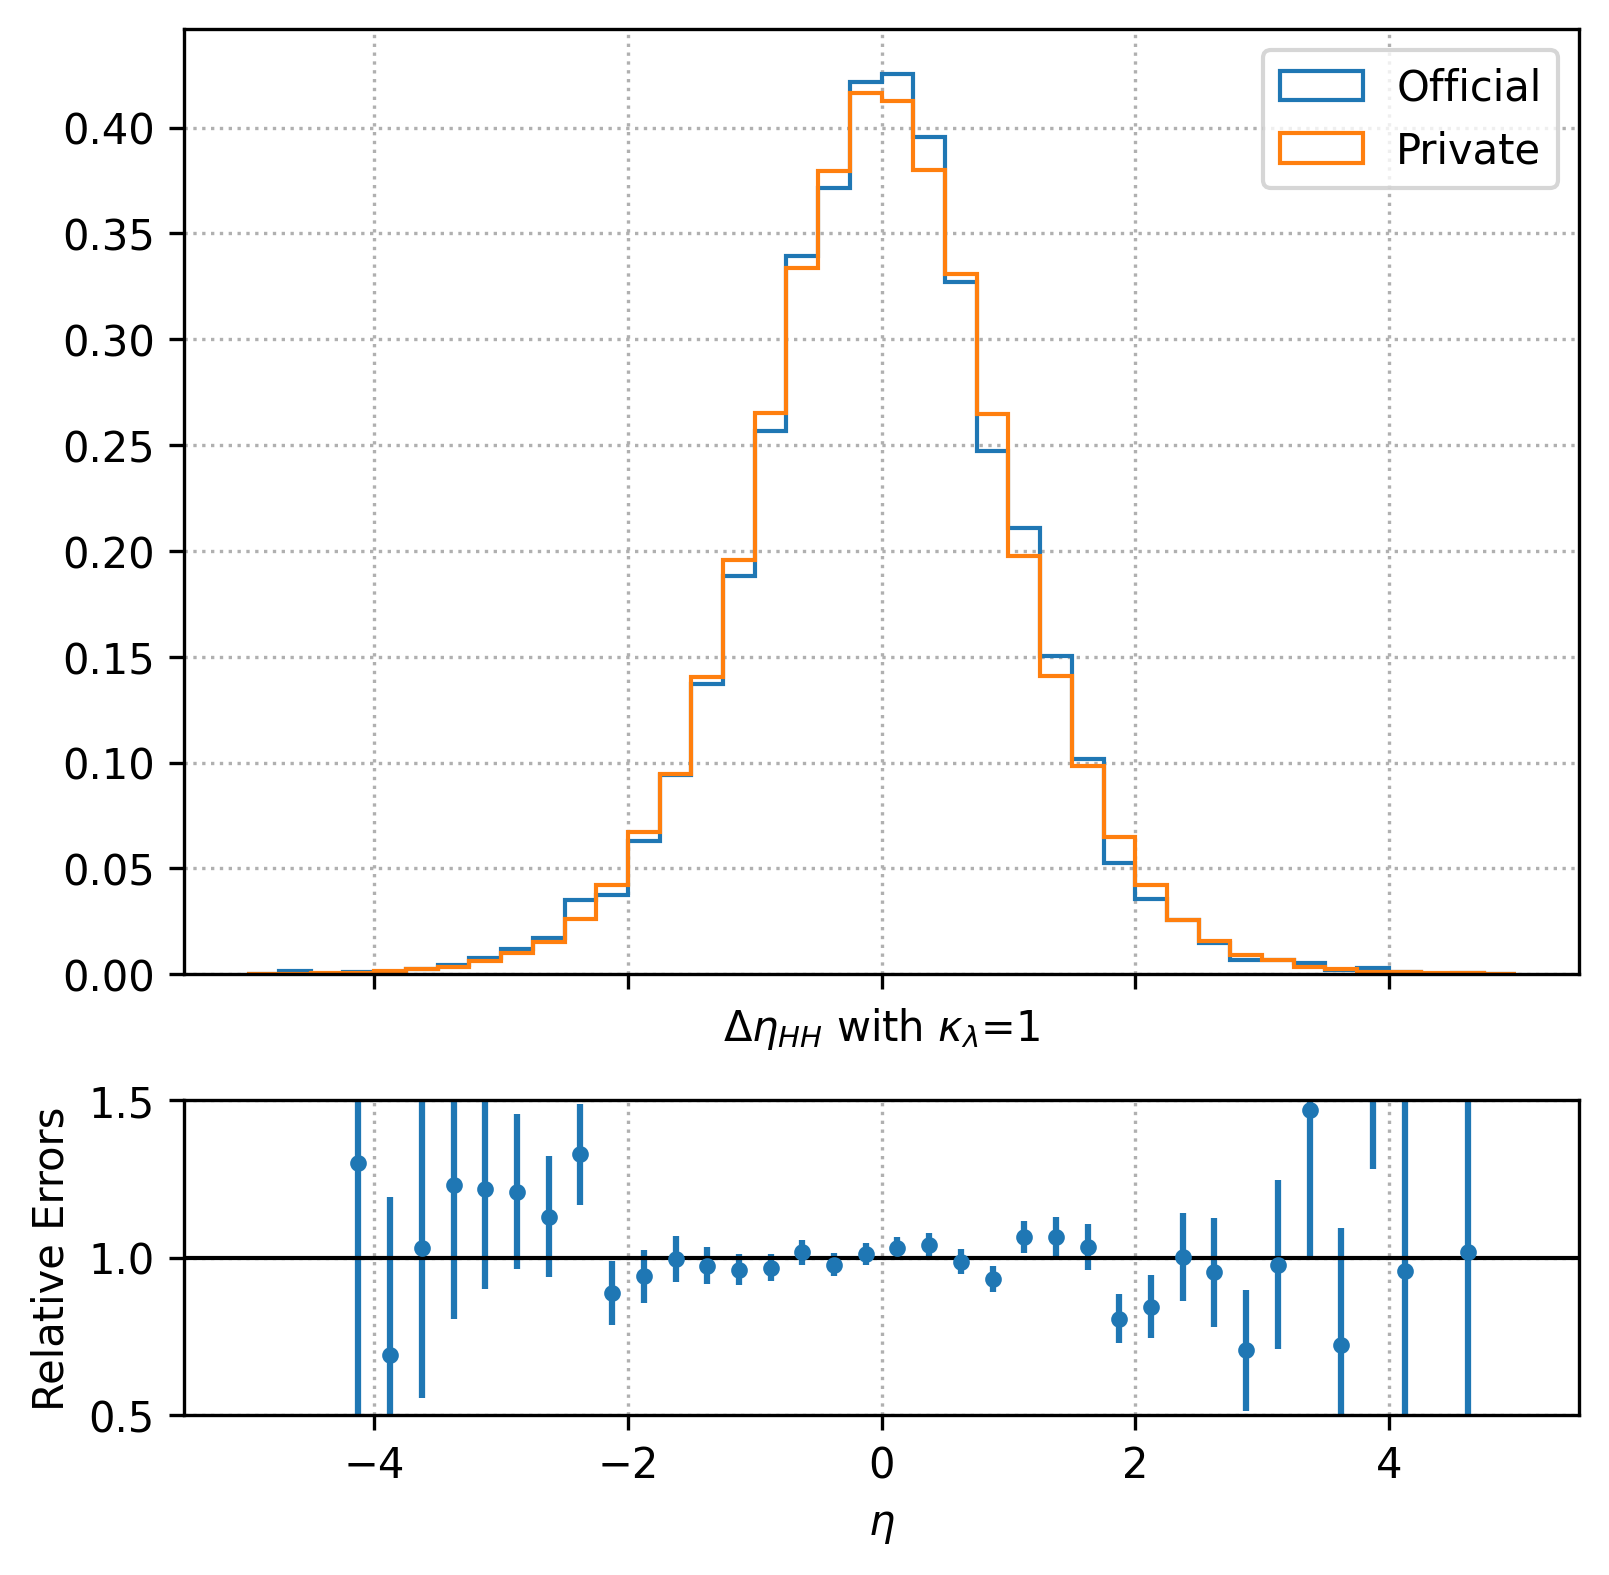

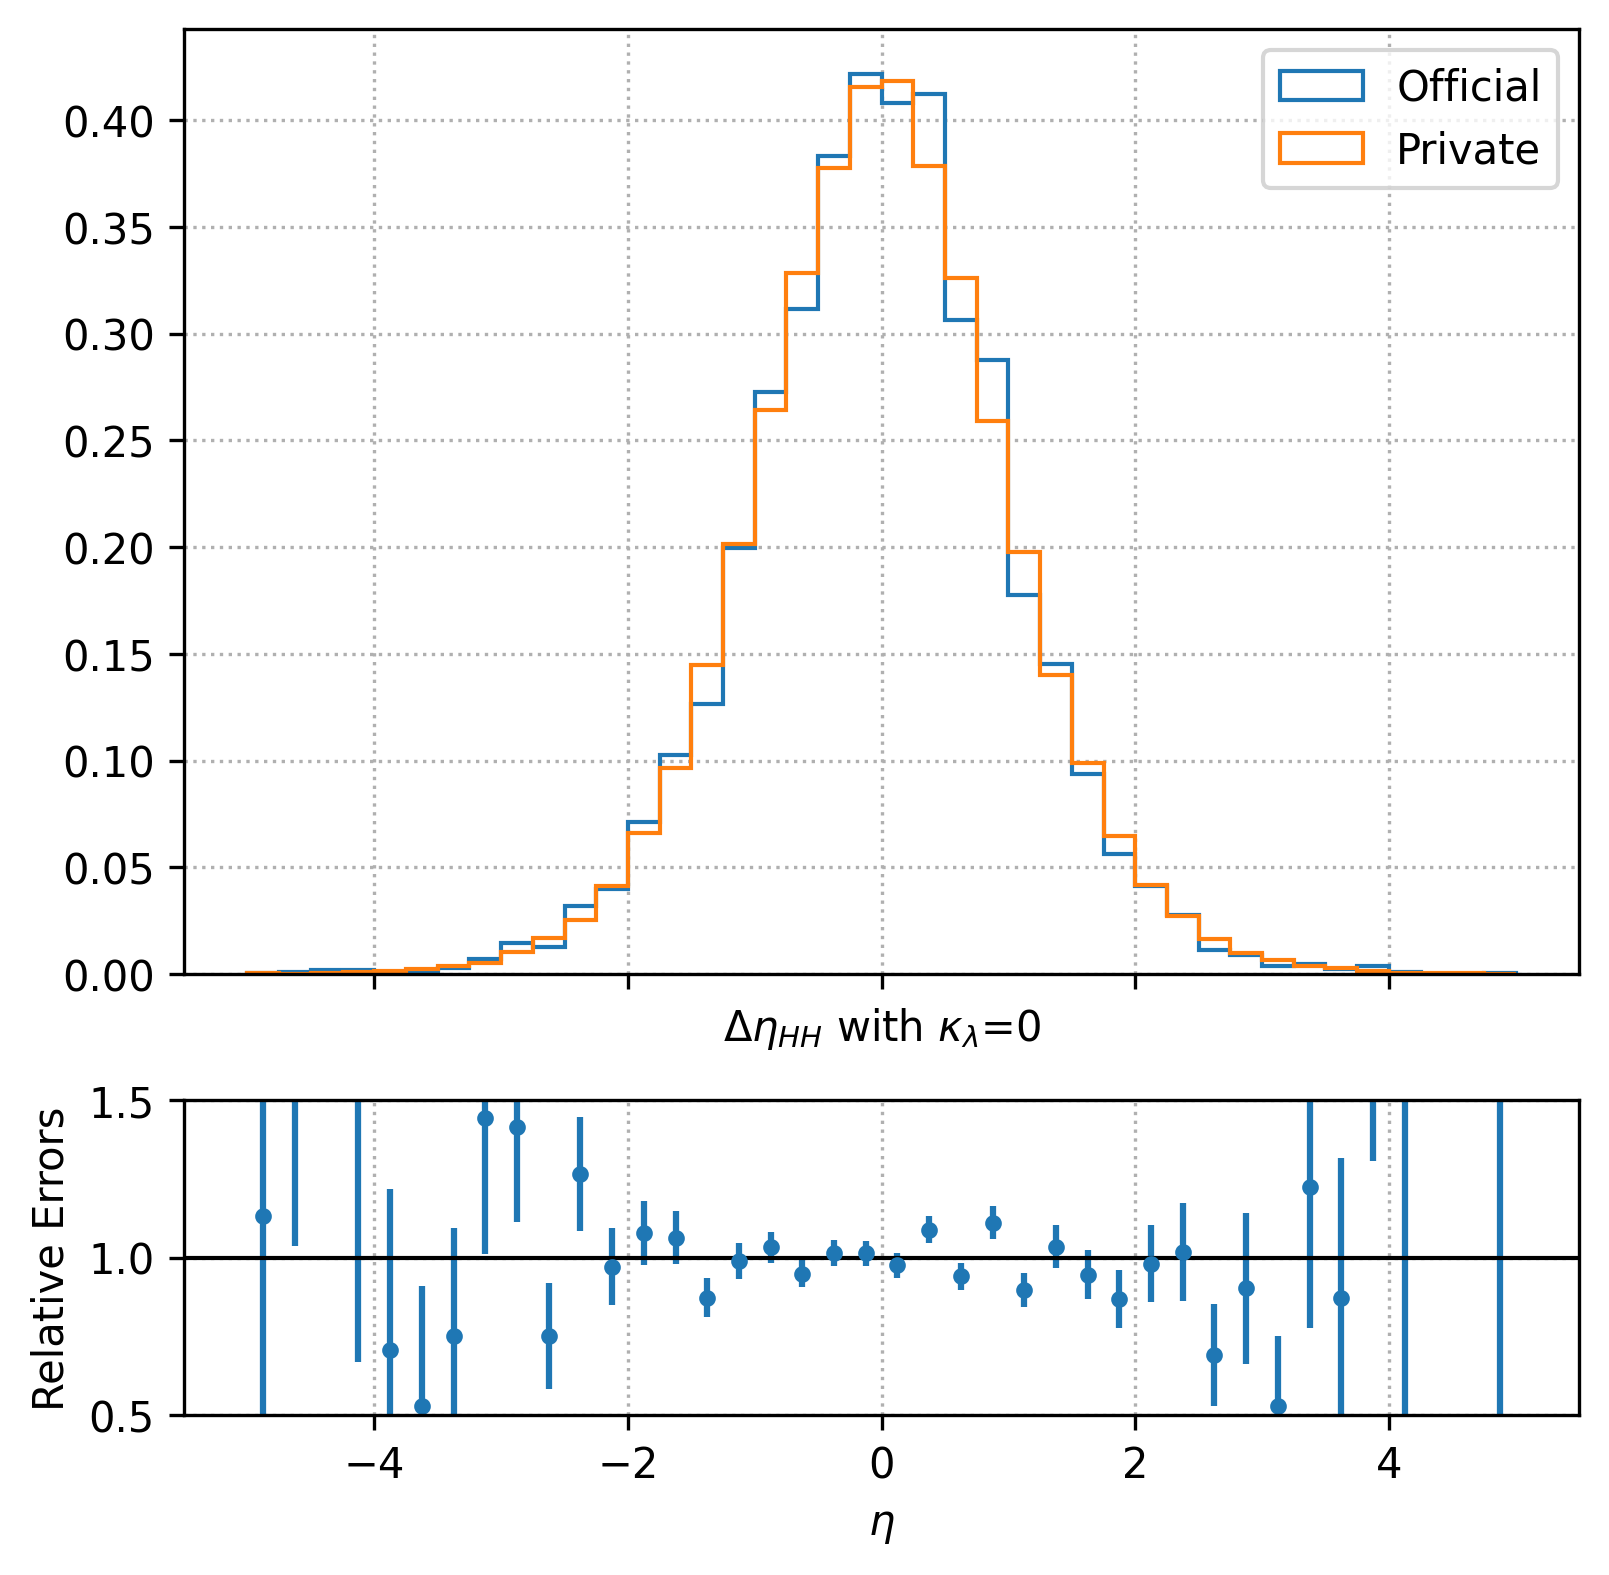

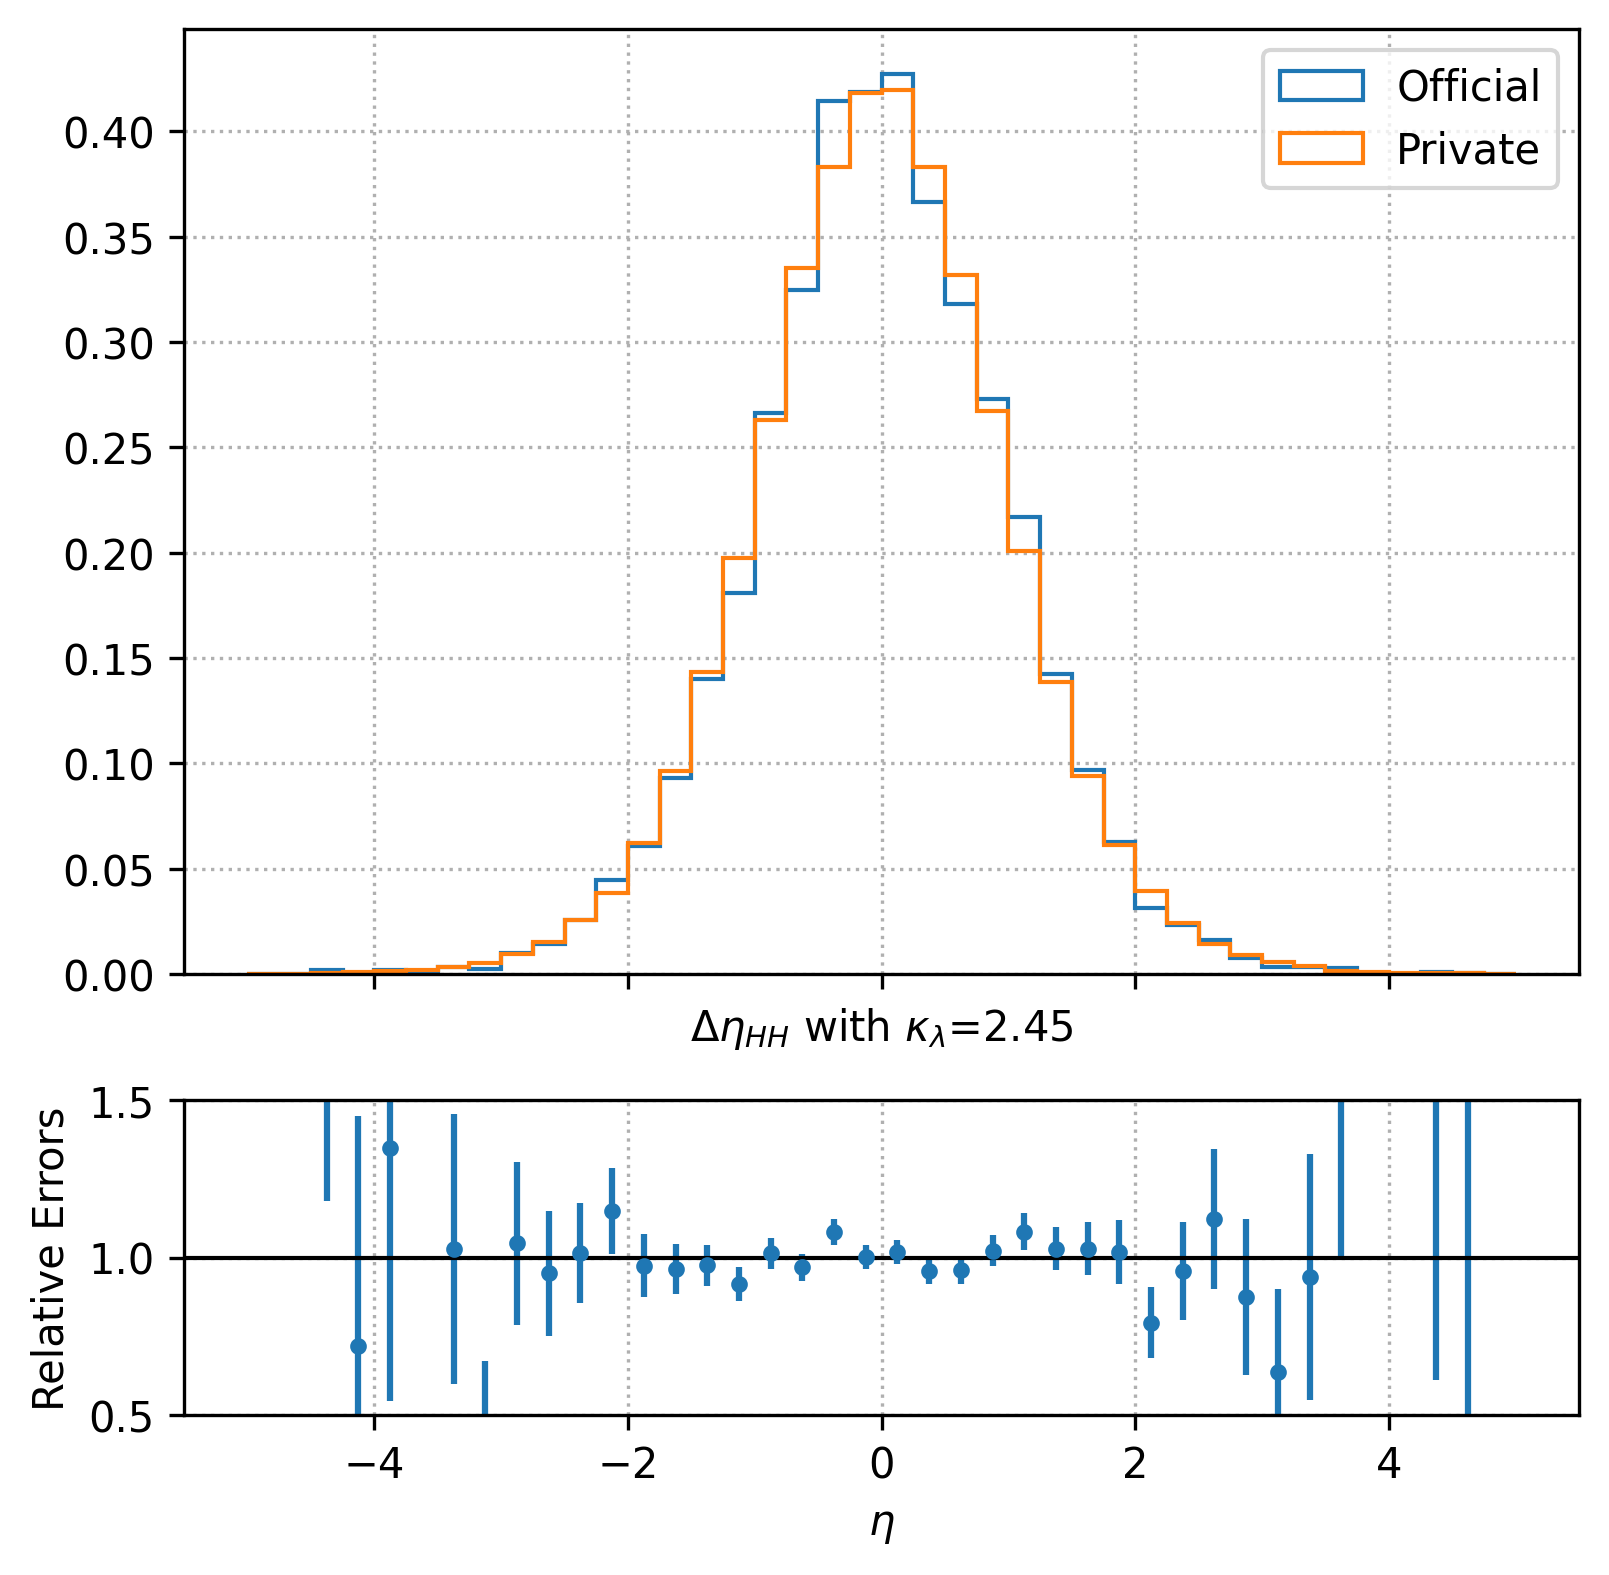

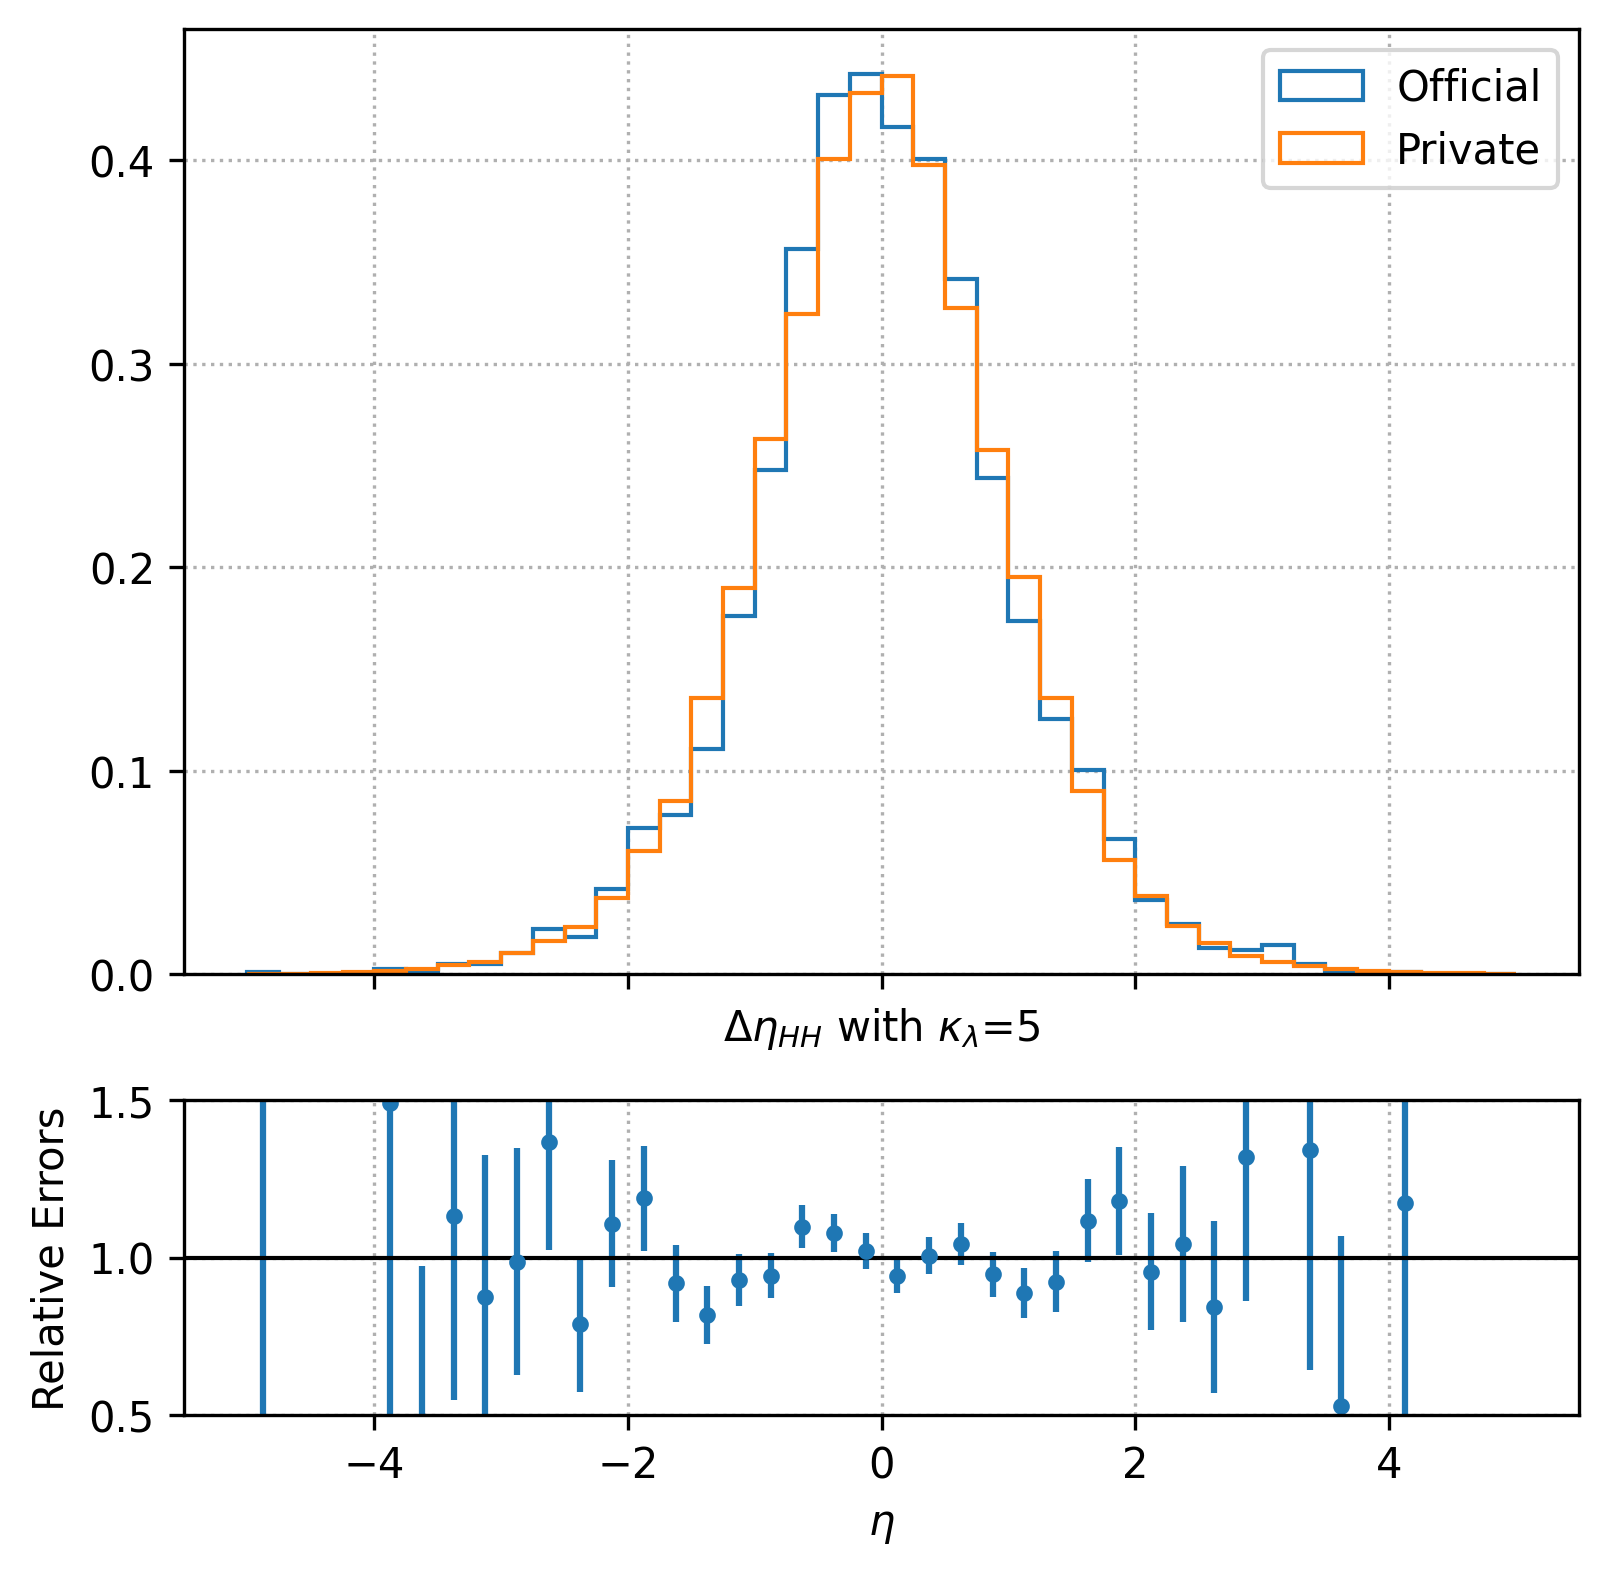

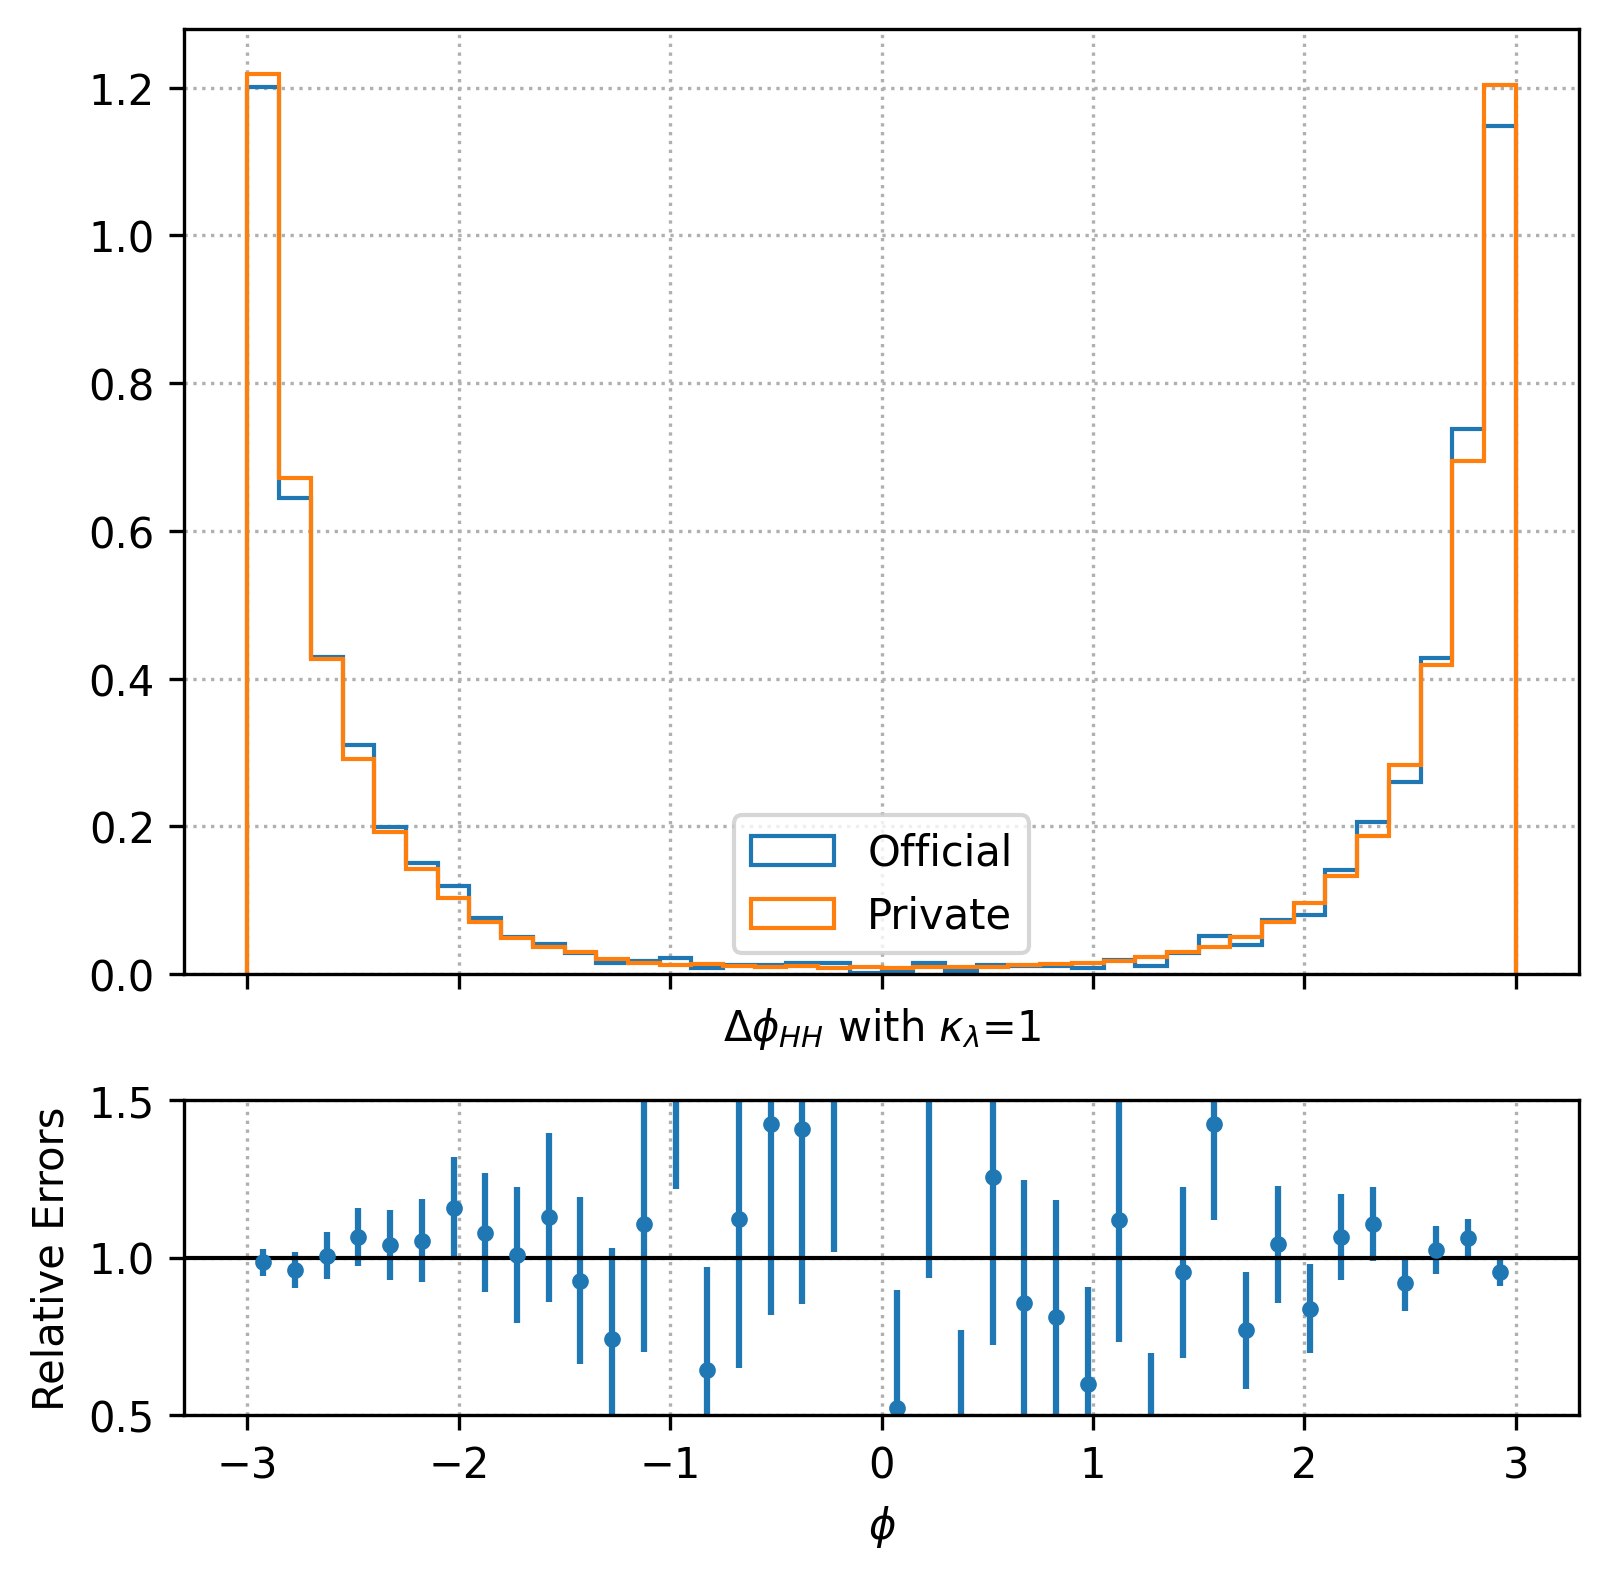

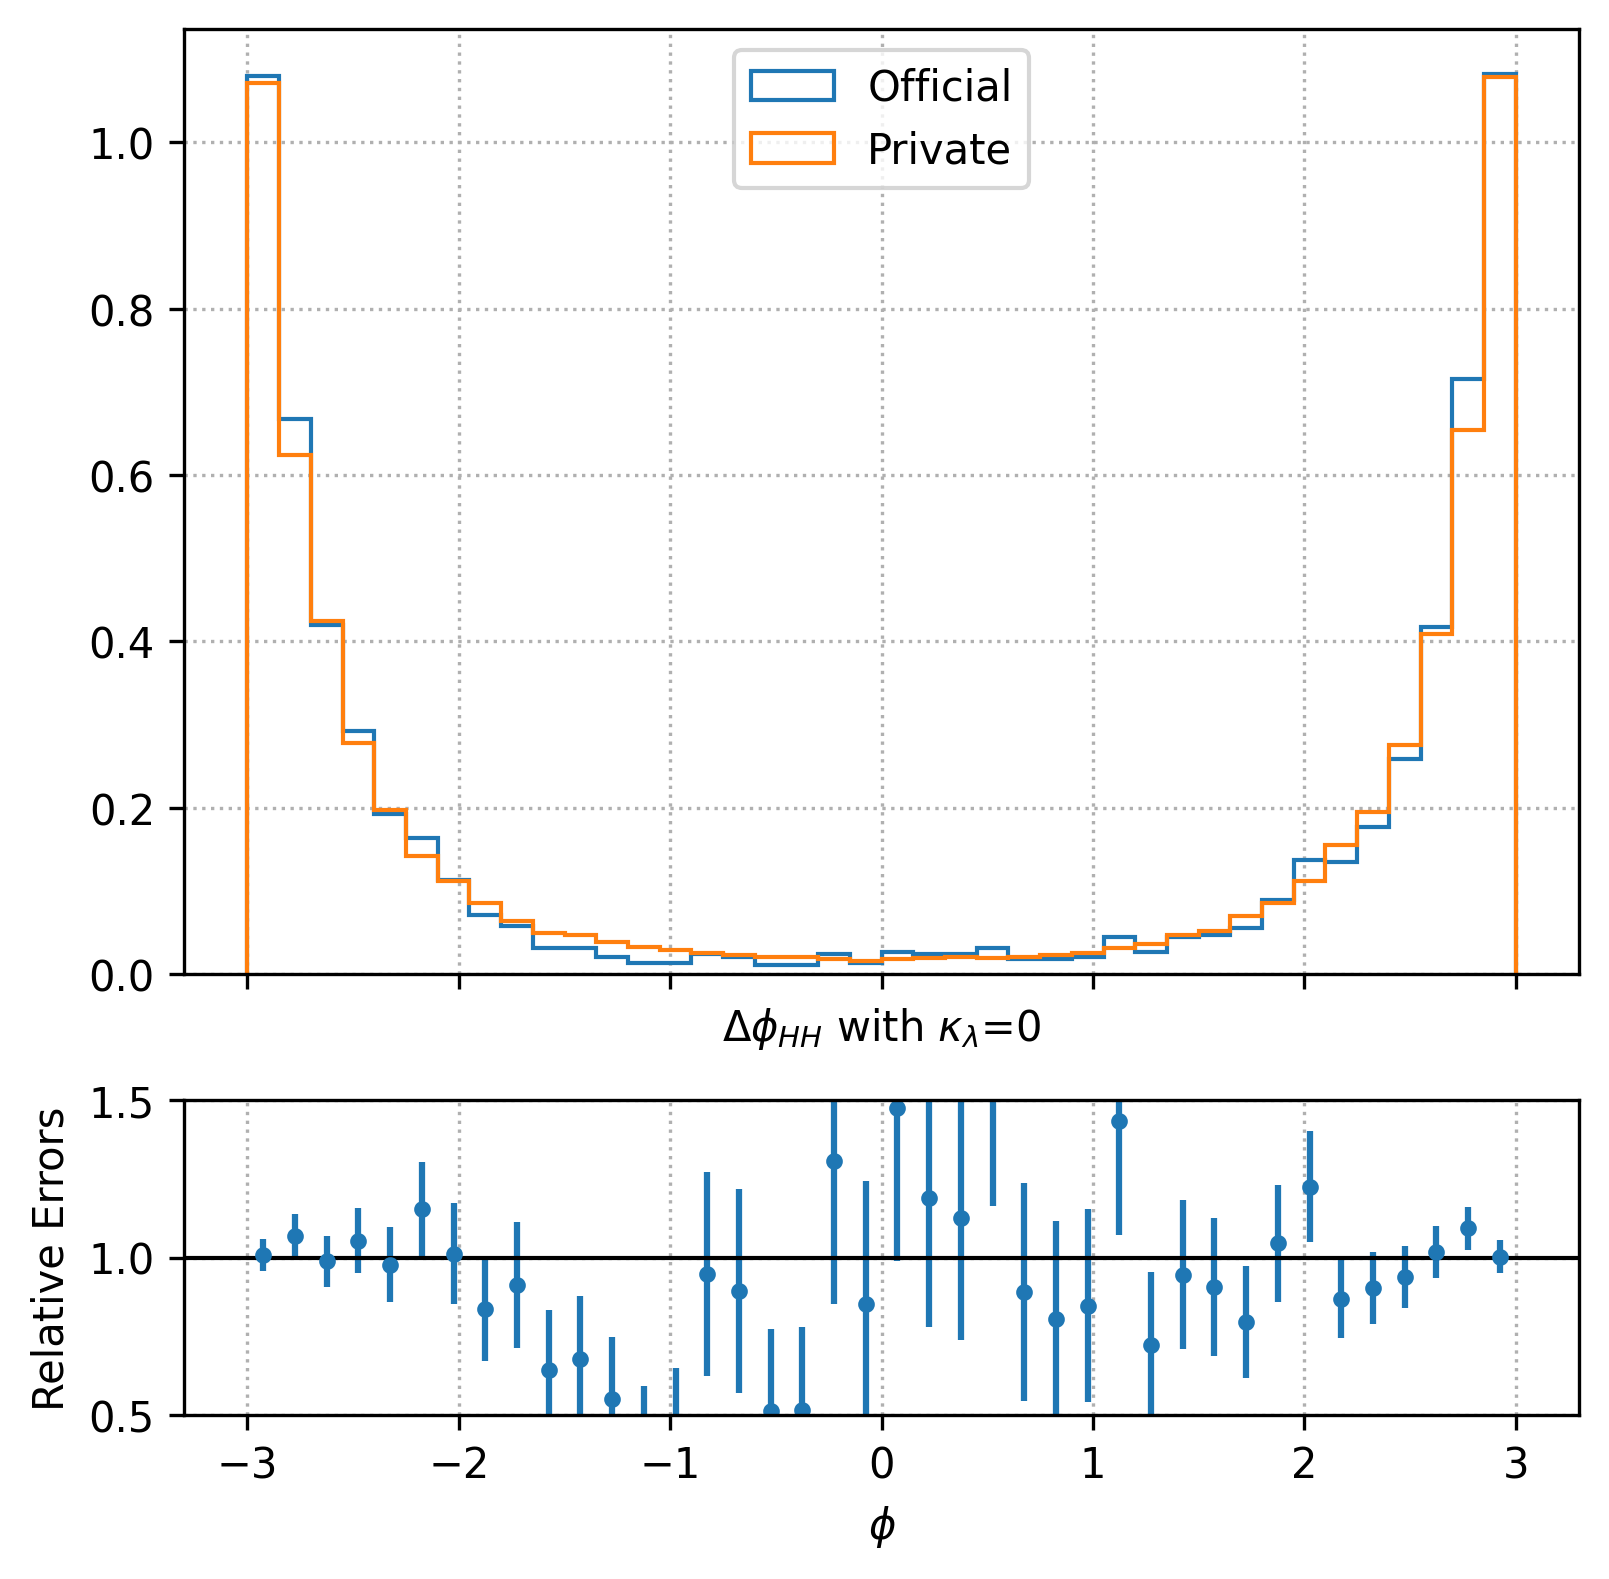

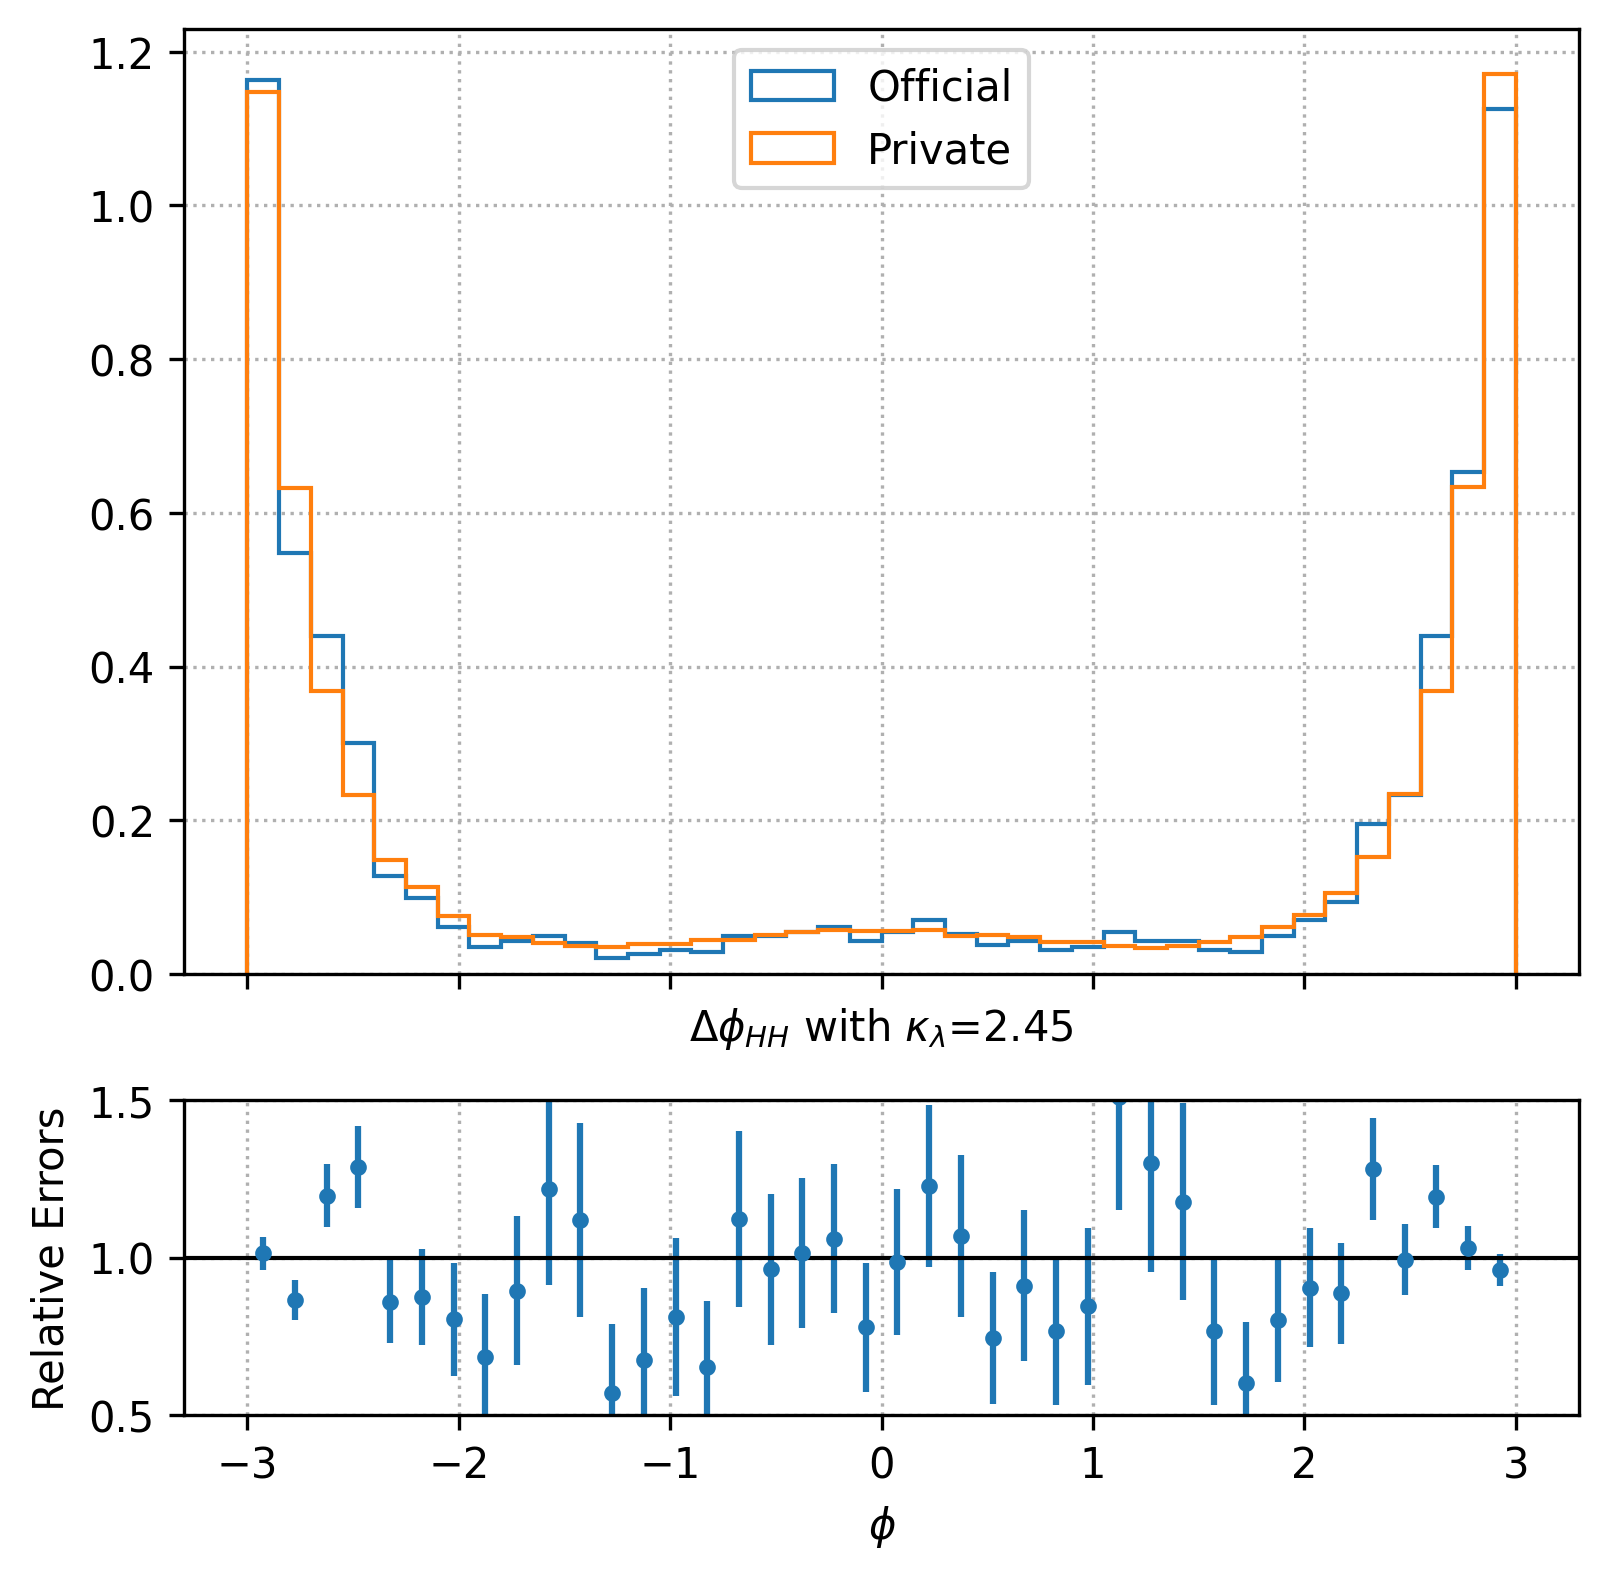

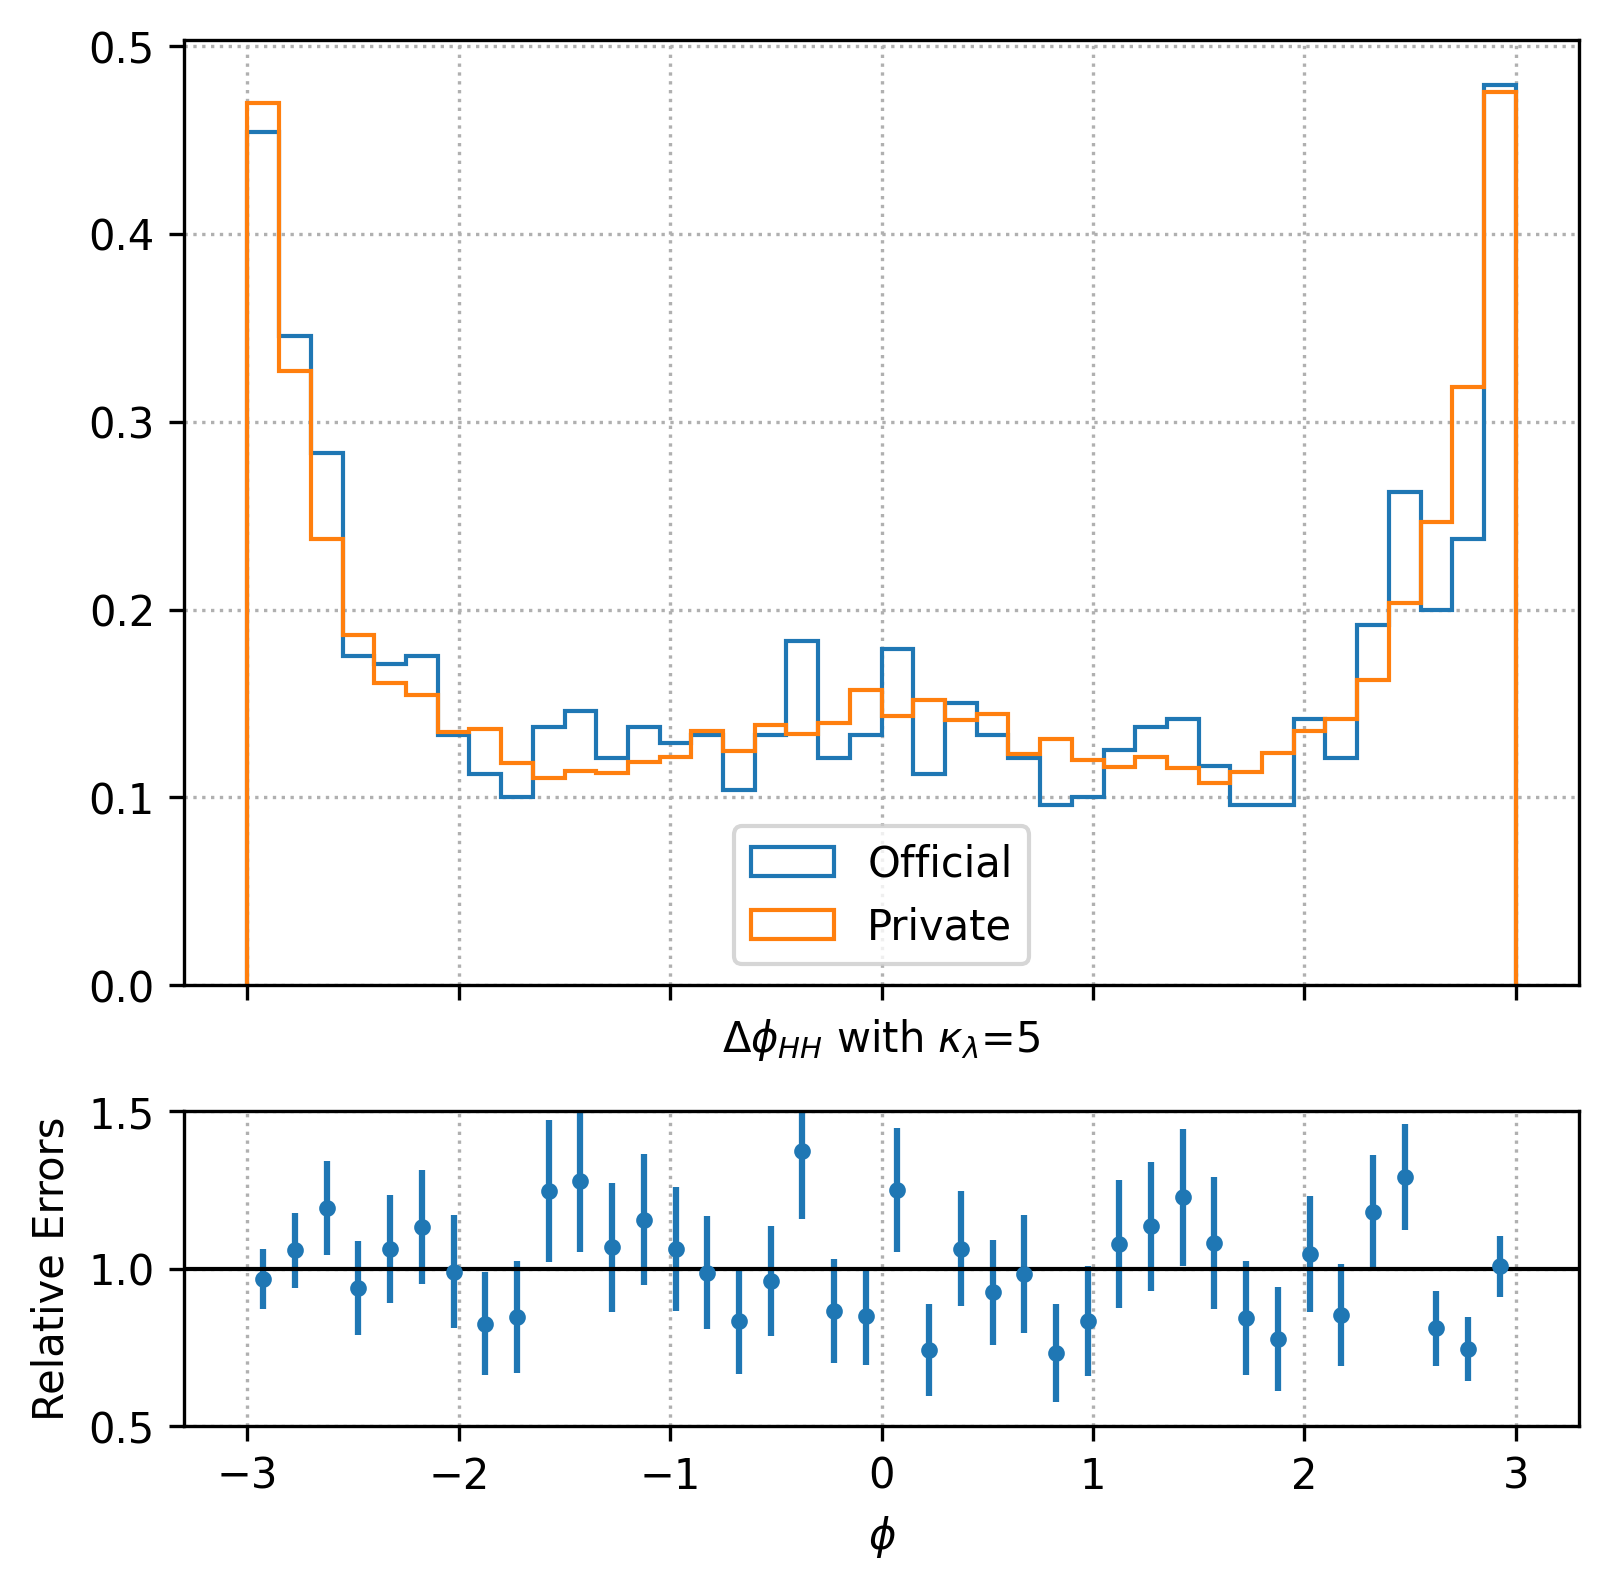

In [ ]:
def plot_higgs_diff_error(official_data_1, official_data_2 ,private_data_1, private_data_2, kinvar,bins, range, kl_value, higgs_number):
    official_kinvar_1 = ak.to_numpy(getattr(official_data_1, kinvar))
    official_kinvar_2 = ak.to_numpy(getattr(official_data_2, kinvar))
    private_kinvar_1 = ak.to_numpy(getattr(private_data_1, kinvar))
    private_kinvar_2 = ak.to_numpy(getattr(private_data_2, kinvar))
    official_data= official_kinvar_1-official_kinvar_2
    private_data= private_kinvar_1-private_kinvar_2
    counts_o, bin_edges_o = np.histogram(official_data, bins, range)
    counts_p, bin_edges_p = np.histogram(private_data, bins, range) 
    errors_o = np.sqrt(counts_o)
    errors_p = np.sqrt(counts_p)
    ratio= (counts_o/np.sum(counts_o))/(counts_p/np.sum(counts_p))
    ratio_errors = np.sqrt((errors_o/counts_p)**2 + ((errors_p * counts_o)/(counts_p)**2)**2)*(np.sum(counts_p)/np.sum(counts_o))
    #ratio_errors= errors_o/counts_p
    # print(counts_o)
    # print(counts_p)
    # print(np.sum(counts_o))
    # print(np.sum(counts_p))
    # print(ratio)
    # print(ratio_errors)
    
    
    # Setup your subplots
    fig, (ax1, ax2) = plt.subplots(figsize=(6, 6), nrows=2, sharex=True, gridspec_kw={"height_ratios": [3, 1]})
    bin_centers = 0.5 * (bin_edges_o[:-1] + bin_edges_o[1:])  
    
    
    # Plot histograms on the first axis
    ax1.hist(official_data, bins, range, histtype="step", label="Official", density=True)
    ax1.hist(private_data, bins, range, histtype="step", label="Private", density=True)
    if kinvar=="eta":
        eta_label=r"$\Delta\eta_{" + higgs_number + r"}$ with $\kappa_\lambda$=" + kl_value
        ax1.set_xlabel(eta_label)
    elif kinvar=="phi":
        phi_label=r"$\Delta\phi_{" + higgs_number + r"}$ with $\kappa_\lambda$=" + kl_value
        ax1.set_xlabel(phi_label)
    ax1.legend()
    ax1.grid(linestyle=':')

    # Plot relative errors on the second axis
    ax2.errorbar(bin_centers, ratio, yerr=ratio_errors,marker=".", linestyle='None', label='Ratio with Errors')
    ax2.axhline(1, color="black", linewidth=1)
    if kinvar=="eta":
        ax2.set_xlabel('$\eta$')
    elif kinvar=="phi":
        ax2.set_xlabel('$\phi$')
    ax2.set_ylabel('Relative Errors')
    ax2.set_ylim([0.5, 1.5])
    ax2.grid(linestyle=':')
  
    save_path=f"/t3home/ramella/HH4b_SPANet/out_plots/reco_{higgs_number}_delta{kinvar}_kl{kl_value}.png"
    fig.savefig(save_path)
    
plot_higgs_diff_error(reco_higgs_1_kl_1_official, reco_higgs_2_kl_1_official, reco_higgs_1_kl_1_private, reco_higgs_2_kl_1_private, "eta", 40, (-5,5), "1", "HH")
plot_higgs_diff_error(reco_higgs_1_kl_0_official, reco_higgs_2_kl_0_official, reco_higgs_1_kl_0_private, reco_higgs_2_kl_0_private, "eta", 40, (-5,5), "0", "HH")
plot_higgs_diff_error(reco_higgs_1_kl_2p45_official, reco_higgs_2_kl_2p45_official, reco_higgs_1_kl_2p45_private, reco_higgs_2_kl_2p45_private, "eta", 40, (-5,5), "2.45", "HH")
plot_higgs_diff_error(reco_higgs_1_kl_5_official, reco_higgs_2_kl_5_official, reco_higgs_1_kl_5_private, reco_higgs_2_kl_5_private, "eta", 40, (-5,5), "5", "HH")

plot_higgs_diff_error(reco_higgs_1_kl_1_official, reco_higgs_2_kl_1_official, reco_higgs_1_kl_1_private, reco_higgs_2_kl_1_private, "phi", 40, (-3,3), "1", "HH")
plot_higgs_diff_error(reco_higgs_1_kl_0_official, reco_higgs_2_kl_0_official, reco_higgs_1_kl_0_private, reco_higgs_2_kl_0_private, "phi", 40, (-3,3), "0", "HH")
plot_higgs_diff_error(reco_higgs_1_kl_2p45_official, reco_higgs_2_kl_2p45_official, reco_higgs_1_kl_2p45_private, reco_higgs_2_kl_2p45_private, "phi", 40, (-3,3), "2.45", "HH")
plot_higgs_diff_error(reco_higgs_1_kl_5_official, reco_higgs_2_kl_5_official, reco_higgs_1_kl_5_private, reco_higgs_2_kl_5_private, "phi", 40, (-3,3), "5", "HH")

In [ ]:
def plot_diff_higgs_phi(official_data_1,official_data_2, private_data_1, private_data_2, kl_value, higgs_number):
    official_data= official_data_1.phi-official_data_2.phi
    private_data= private_data_1.phi-private_data_2.phi
    plt.figure(figsize=(8, 4))
    plt.hist(official_data, bins=np.linspace(-4, 4, 120), histtype="step", label="official", density=True)
    plt.hist(private_data, bins=np.linspace(-4, 4, 120), histtype="step", label="private", density=True)
    
    plt.xlabel("Phi value of the leading Higgs")
    plt.title(f"Phi value of the leading Higgs with $\\kappa_\\lambda$ {kl_value} for the {higgs_number} Higgs (private vs. official)")
    plt.legend()
    plt.show()
    
# plot_diff_higgs_phi(reco_higgs_1_kl_1_official, reco_higgs_2_kl_1_official,reco_higgs_1_kl_1_private, reco_higgs_2_kl_1_private, 1, "phi diff")
# plot_diff_higgs_phi(reco_higgs_1_kl_0_official,reco_higgs_2_kl_0_official, reco_higgs_1_kl_0_private, reco_higgs_2_kl_0_private, 0, "phi diff")
# plot_diff_higgs_phi(reco_higgs_1_kl_2p45_official, reco_higgs_2_kl_2p45_official, reco_higgs_1_kl_2p45_private, reco_higgs_2_kl_2p45_private, 2.45, "phi diff")
# plot_diff_higgs_phi(reco_higgs_1_kl_5_official, reco_higgs_2_kl_5_official, reco_higgs_1_kl_5_private, reco_higgs_2_kl_5_private, 5, "phi diff")

In [ ]:
def plot_higgs_eta(official_data, private_data, kl_value, higgs_number):
    plt.figure(figsize=(8, 4))
    plt.hist(official_data.eta, bins=np.linspace(-6, 6, 120), histtype="step", label="official", density=True)
    plt.hist(private_data.eta, bins=np.linspace(-6, 6, 120), histtype="step", label="private", density=True)
    
    plt.xlabel(f"$\eta$ of the {higgs_number} of the leading Higgs")
    plt.title(f"$\eta$ of the {higgs_number} Higgs with $\\kappa_\\lambda$ {kl_value} (private vs. official)")
    plt.legend()
    plt.show()

In [ ]:
type(reco_higgs_1_kl_0_official)

vector.backends.awkward.MomentumArray4D

In [ ]:
def plot_higgs_error(official_data,private_data, kinvar,bins, range, kl_value, higgs_number):
    official_kinvar = ak.to_numpy(getattr(official_data, kinvar))
    private_kinvar = ak.to_numpy(getattr(private_data, kinvar))
    counts_o, bin_edges_o = np.histogram(official_kinvar, bins, range)
    counts_p, bin_edges_p = np.histogram(private_kinvar, bins, range) 
    errors_o = np.sqrt(counts_o)
    errors_p = np.sqrt(counts_p)
    ratio= (counts_o/np.sum(counts_o))/(counts_p/np.sum(counts_p))
    ratio_errors = np.sqrt((errors_o/counts_p)**2 + ((errors_p * counts_o)/(counts_p)**2)**2)*(np.sum(counts_p)/np.sum(counts_o))
    #ratio_errors= errors_o/counts_p
    # print(counts_o)
    # print(counts_p)
    # print(np.sum(counts_o))
    # print(np.sum(counts_p))
    # print(ratio)
    # print(ratio_errors)
    
    
    # Setup your subplots
    fig, (ax1, ax2) = plt.subplots(figsize=(6, 6), nrows=2, sharex=True, gridspec_kw={"height_ratios": [3, 1]})
    bin_centers = 0.5 * (bin_edges_o[:-1] + bin_edges_o[1:])  
    
    
    # Plot histograms on the first axis
    ax1.hist(official_kinvar, bins, range, histtype="step", label="Official", density=True)
    ax1.hist(private_kinvar, bins, range, histtype="step", label="Private", density=True)
    if kinvar=="eta":
        eta_label=r"$\eta_{" + higgs_number + r"}$ with $\kappa_\lambda$=" + kl_value
        ax1.set_xlabel(eta_label)
    elif kinvar=="pt":
        pt_label=r"$p_T^{" + higgs_number + r"}$ with $\kappa_\lambda$=" + kl_value
        ax1.set_xlabel(pt_label)
    elif kinvar=="mass":
        m_label=r"$m_{" + higgs_number + r"}$ with $\kappa_\lambda$=" + kl_value
        ax1.set_xlabel(m_label)
    ax1.legend()
    ax1.grid(linestyle=':')

    # Plot relative errors on the second axis
    ax2.errorbar(bin_centers, ratio, yerr=ratio_errors,marker=".", linestyle='None', label='Ratio with Errors')
    ax2.axhline(1, color="black", linewidth=1)
    if kinvar=="eta":
        ax2.set_xlabel('$\eta$')
    elif kinvar=="pt":
        ax2.set_xlabel('$p_T$')
    elif kinvar=="mass":
        ax2.set_xlabel(r"$m_{"+higgs_number+"}$")
    ax2.set_ylabel('Relative Errors')
    ax2.set_ylim([0.5, 1.5])
    ax2.grid(linestyle=':')
  
    save_path=f"/t3home/ramella/HH4b_SPANet/out_plots/reco_{higgs_number}_{kinvar}_kl{kl_value}.png"
    fig.savefig(save_path)
    


/tmp/ipykernel_2401/85063785.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(figsize=(6, 6), nrows=2, sharex=True, gridspec_kw={"height_ratios": [3, 1]})
/tmp/ipykernel_2401/85063785.py:8: RuntimeWarning: invalid value encountered in divide
  ratio= (counts_o/np.sum(counts_o))/(counts_p/np.sum(counts_p))
/tmp/ipykernel_2401/85063785.py:9: RuntimeWarning: invalid value encountered in divide
  ratio_errors = np.sqrt((errors_o/counts_p)**2 + ((errors_p * counts_o)/(counts_p)**2)**2)*(np.sum(counts_p)/np.sum(counts_o))


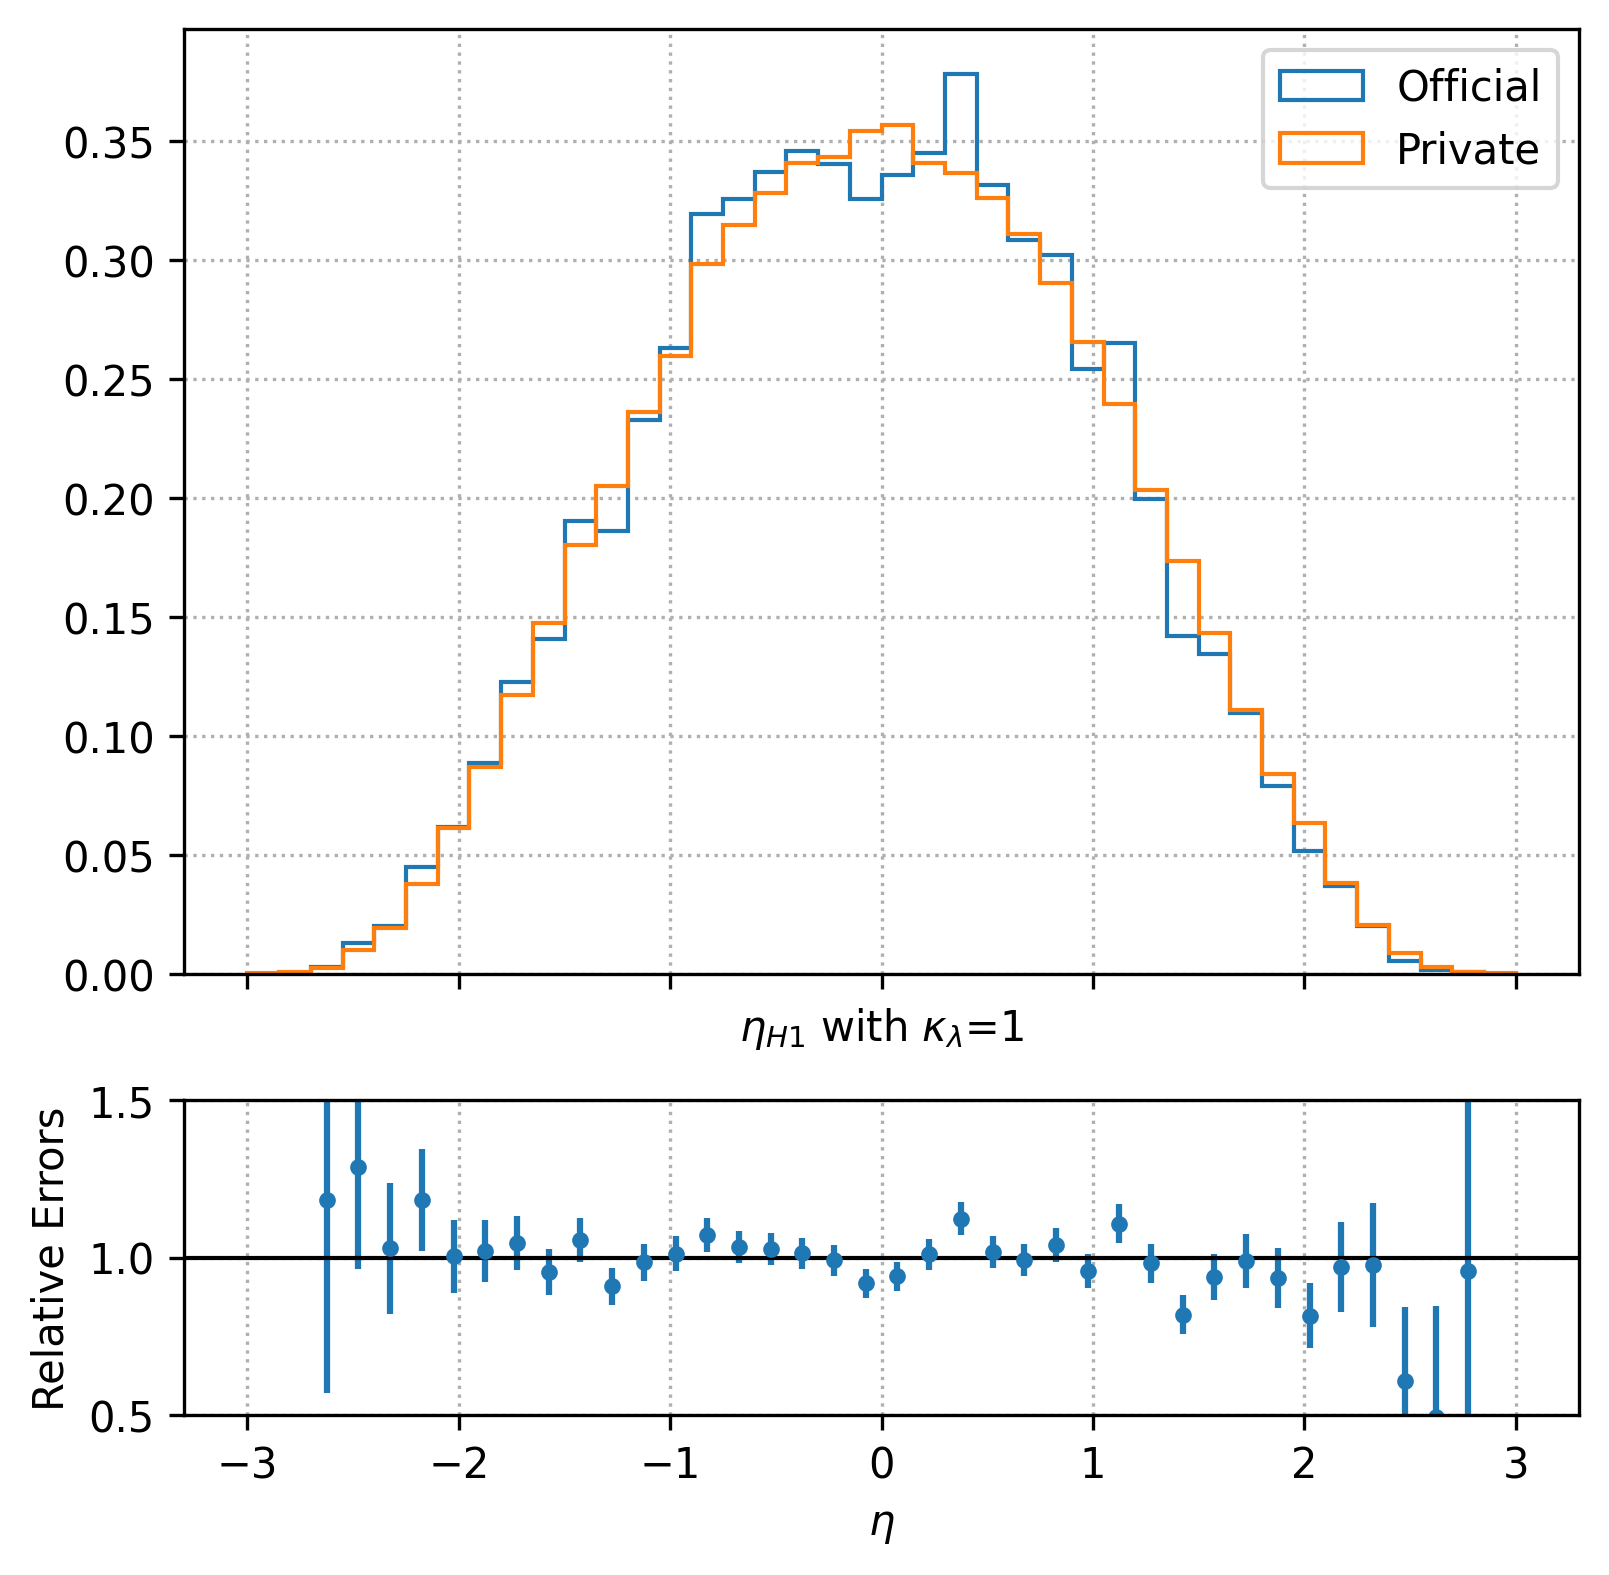

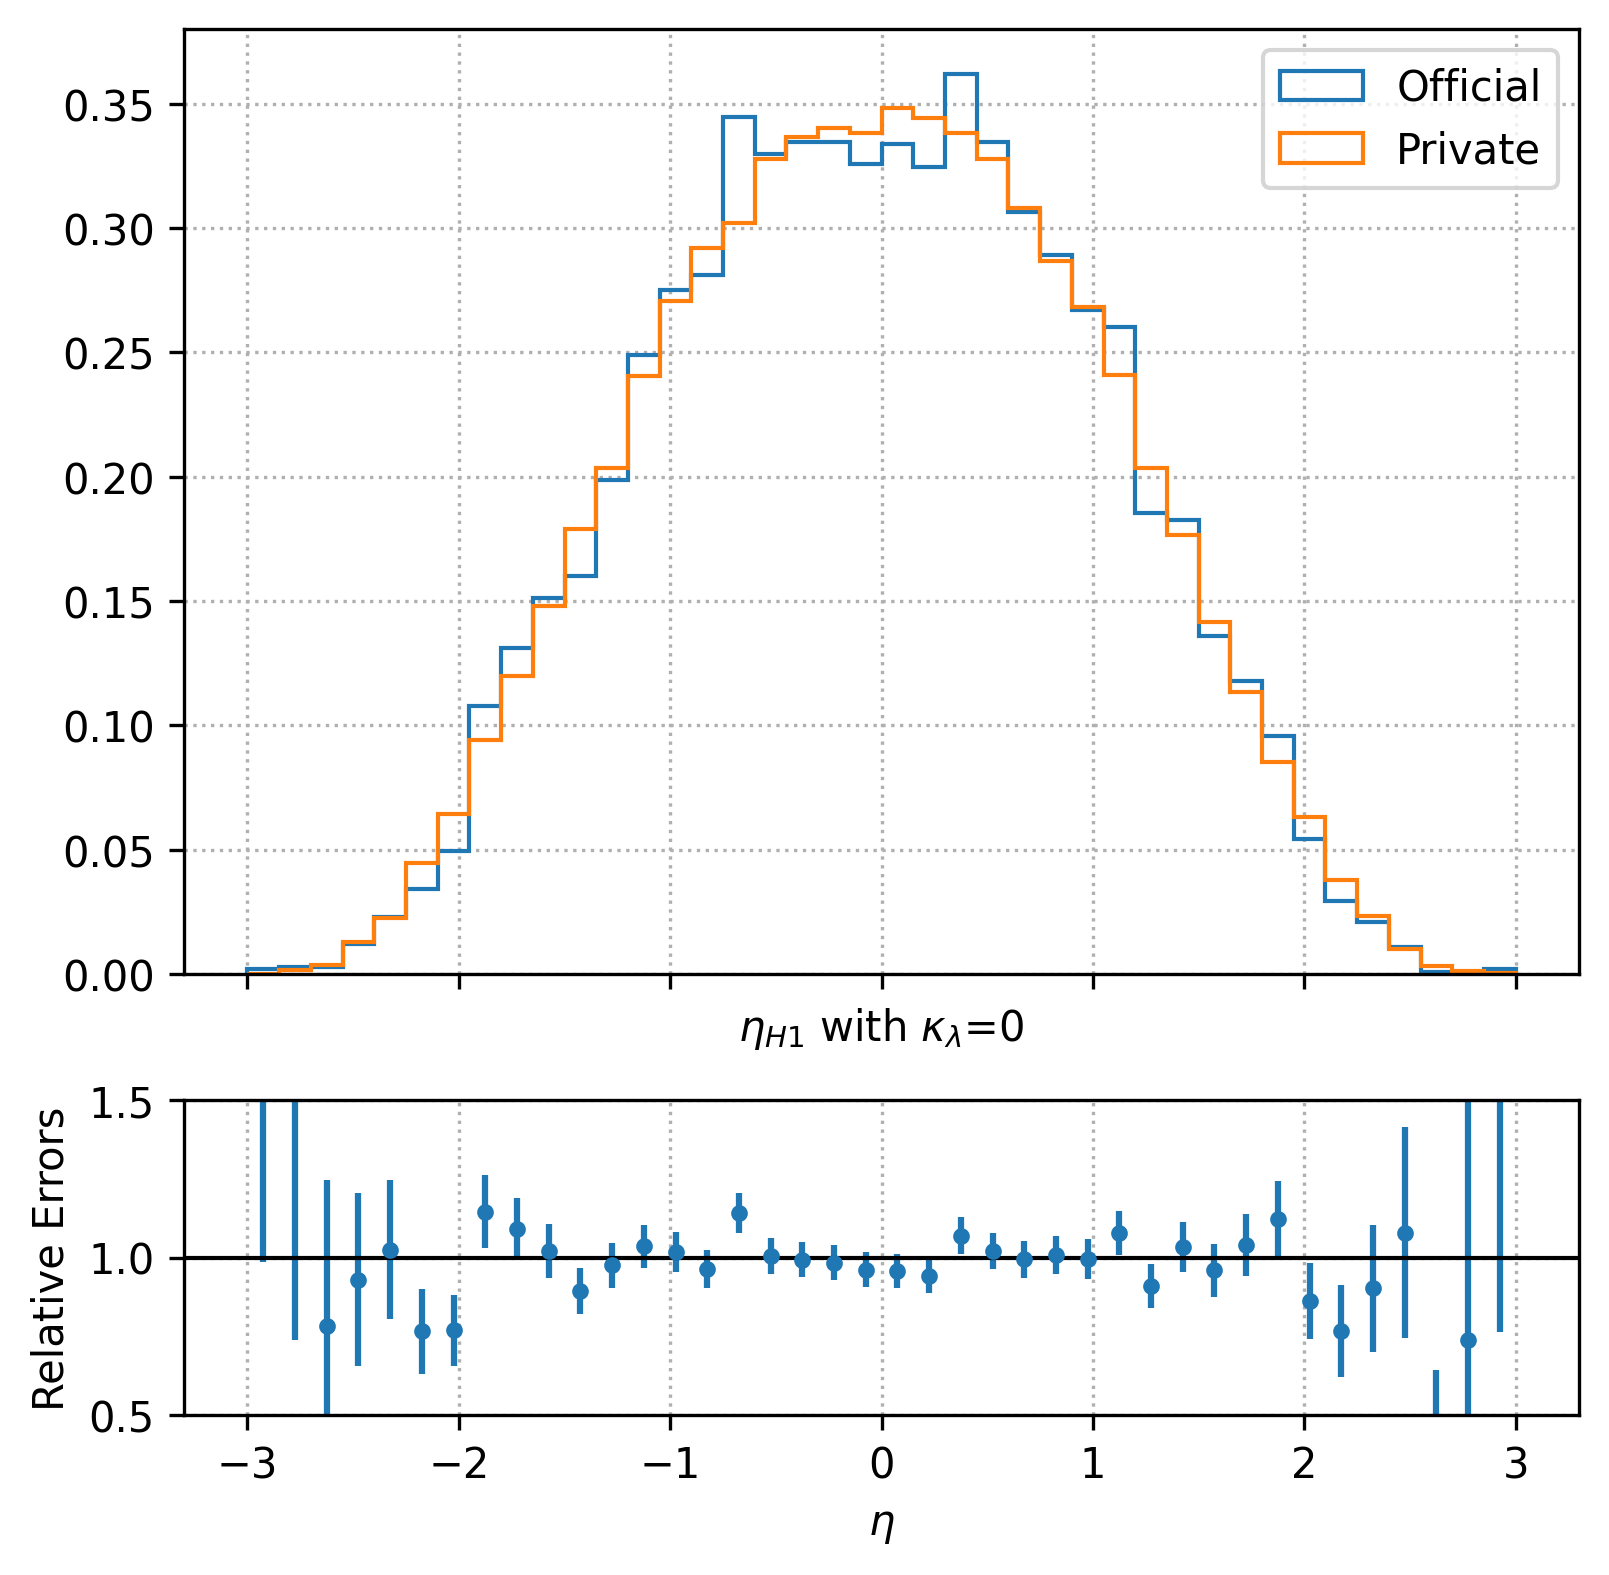

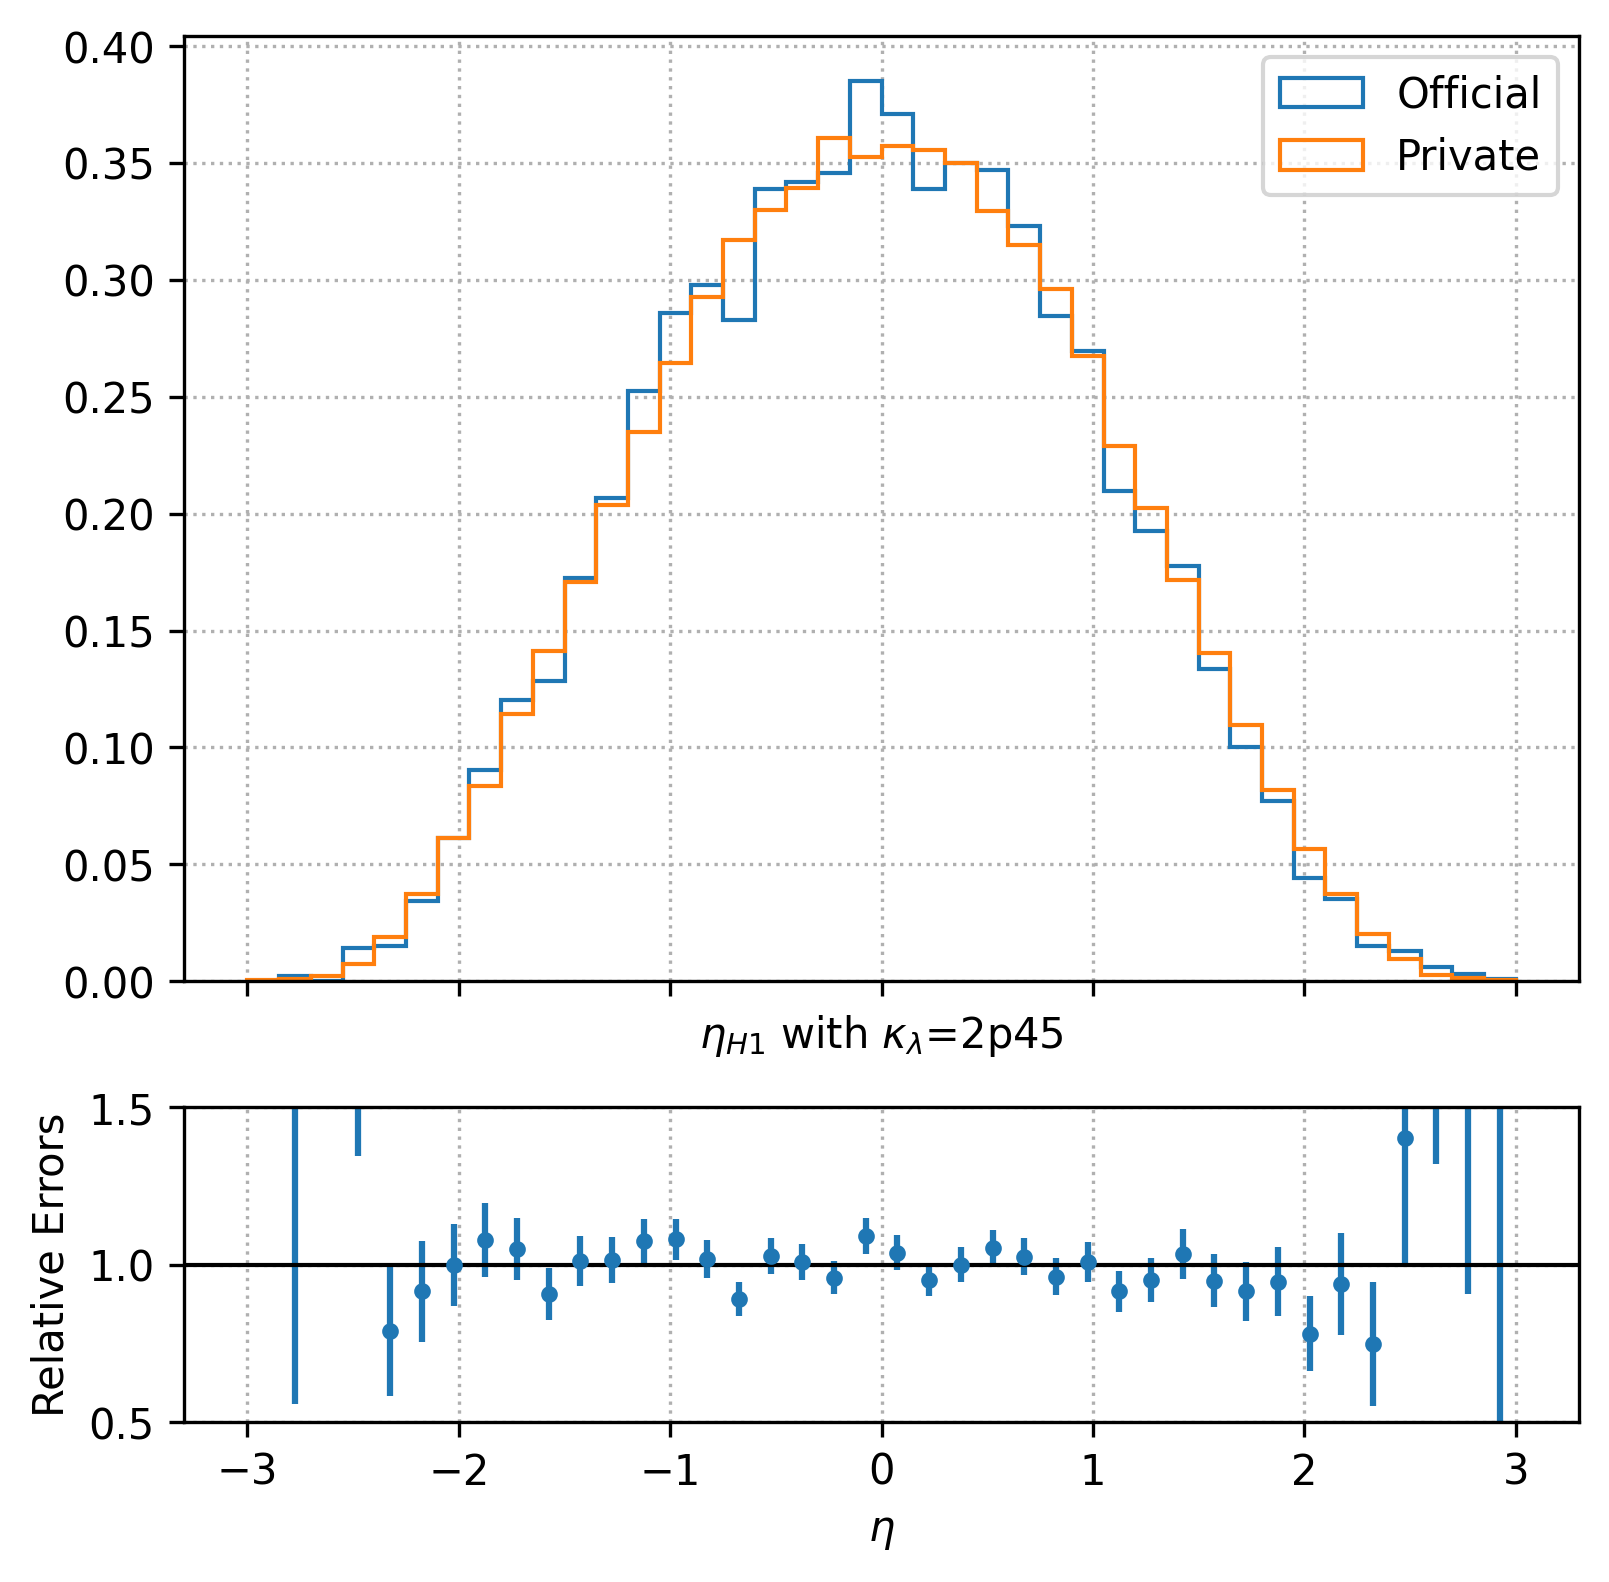

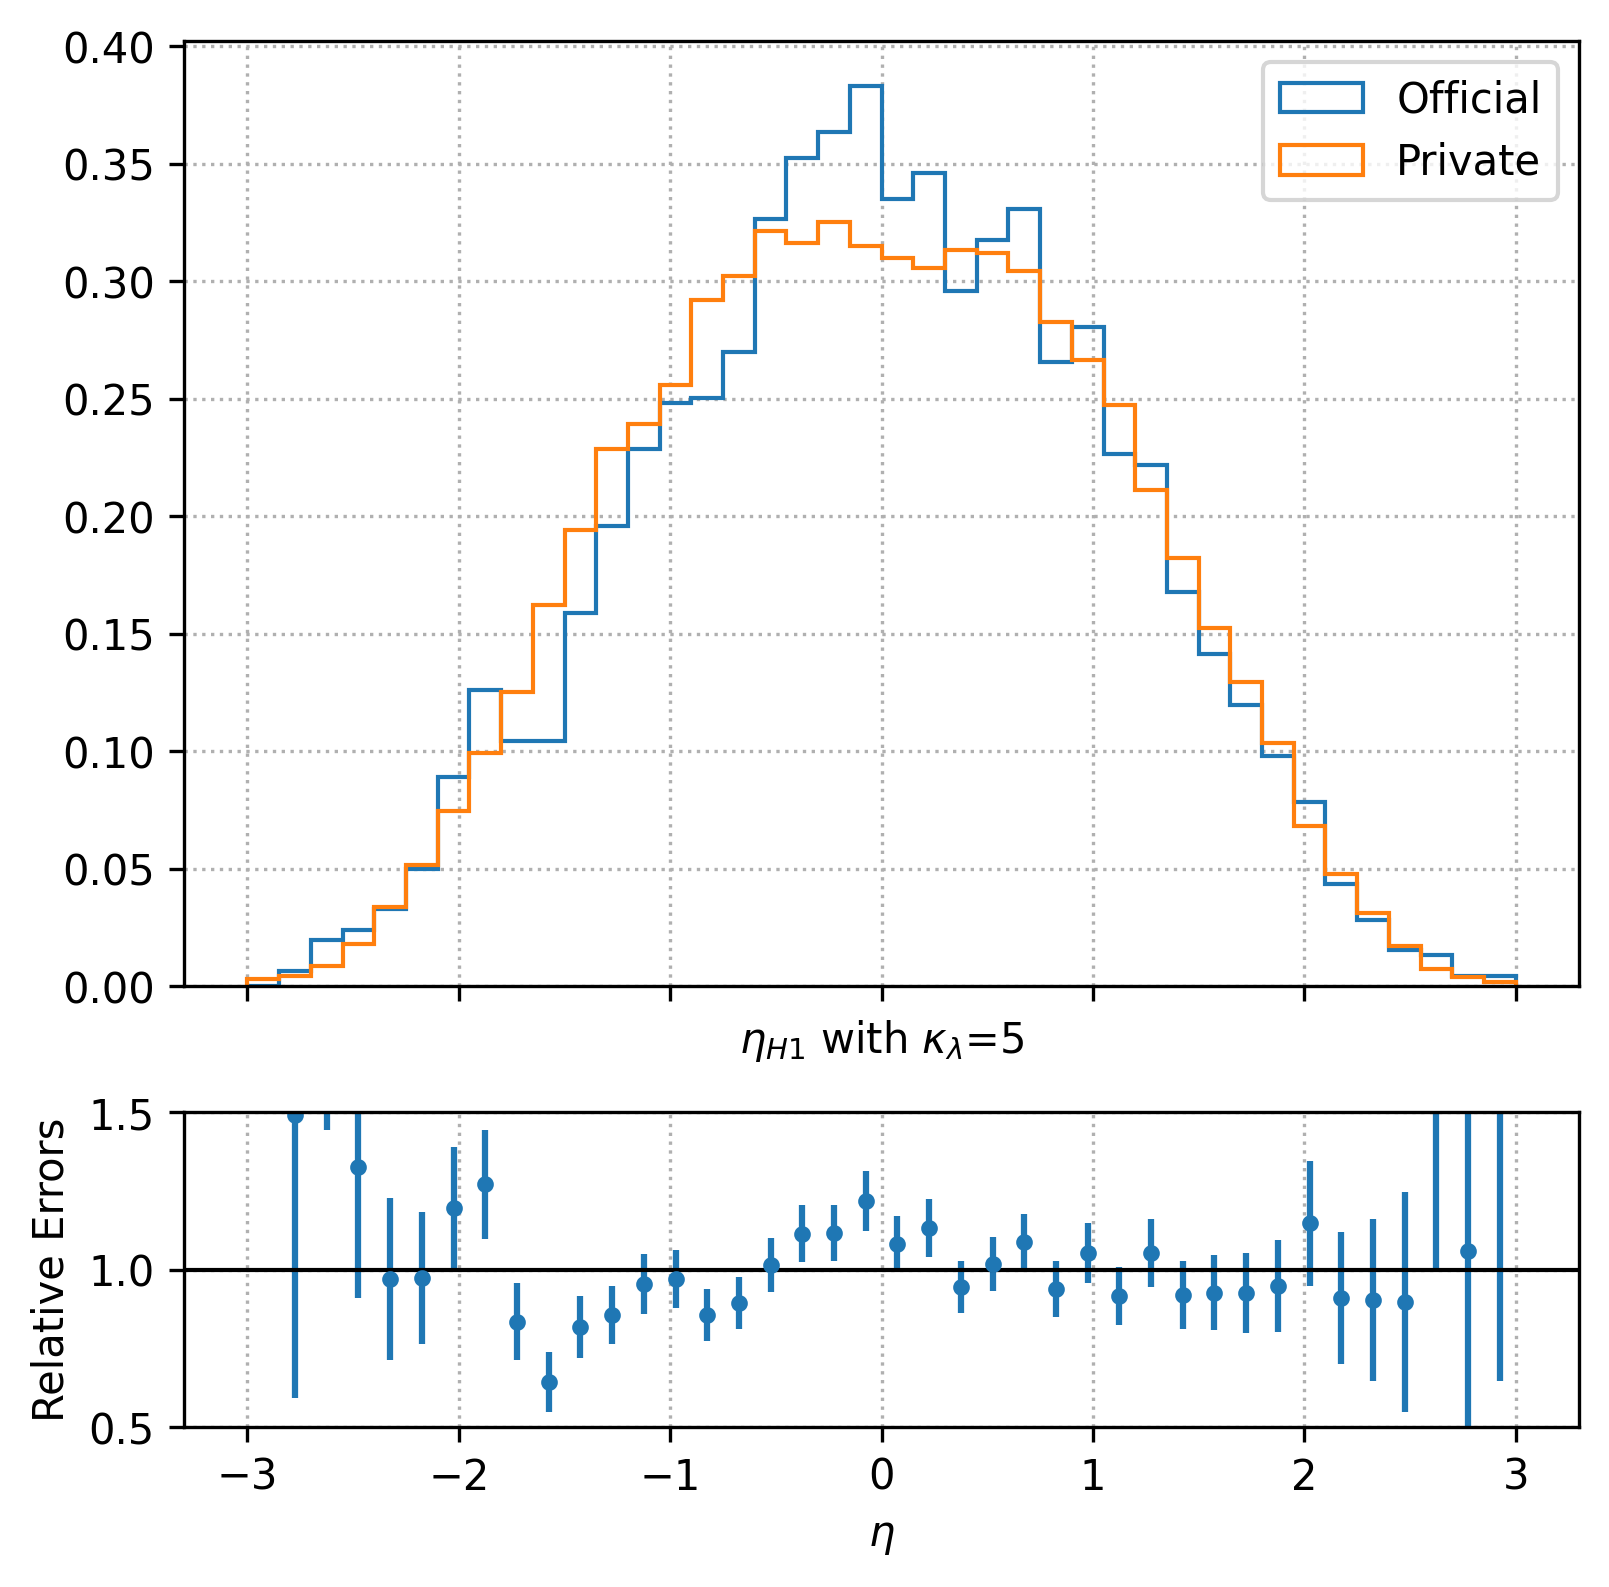

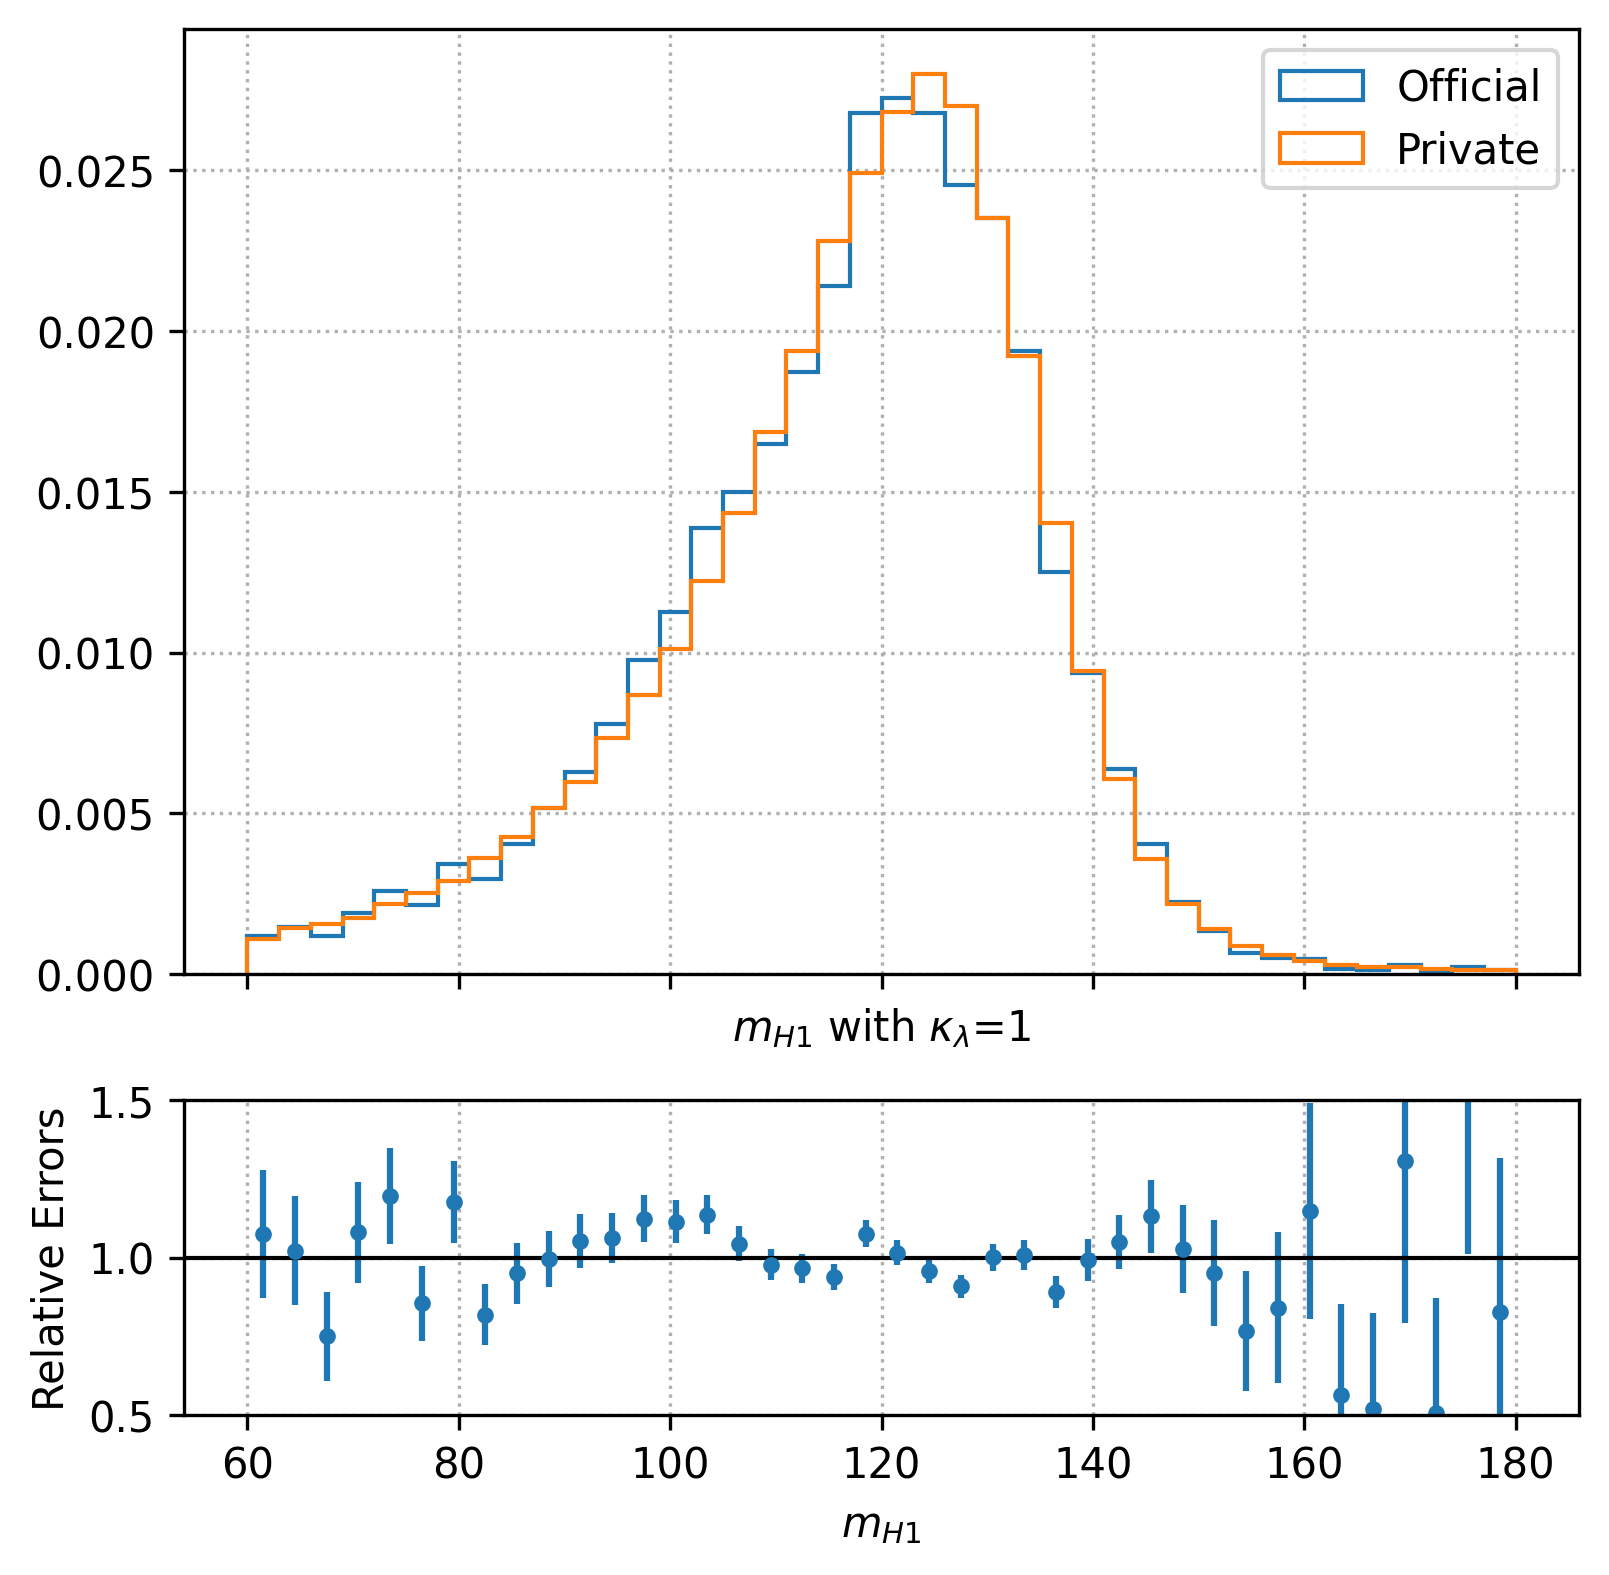

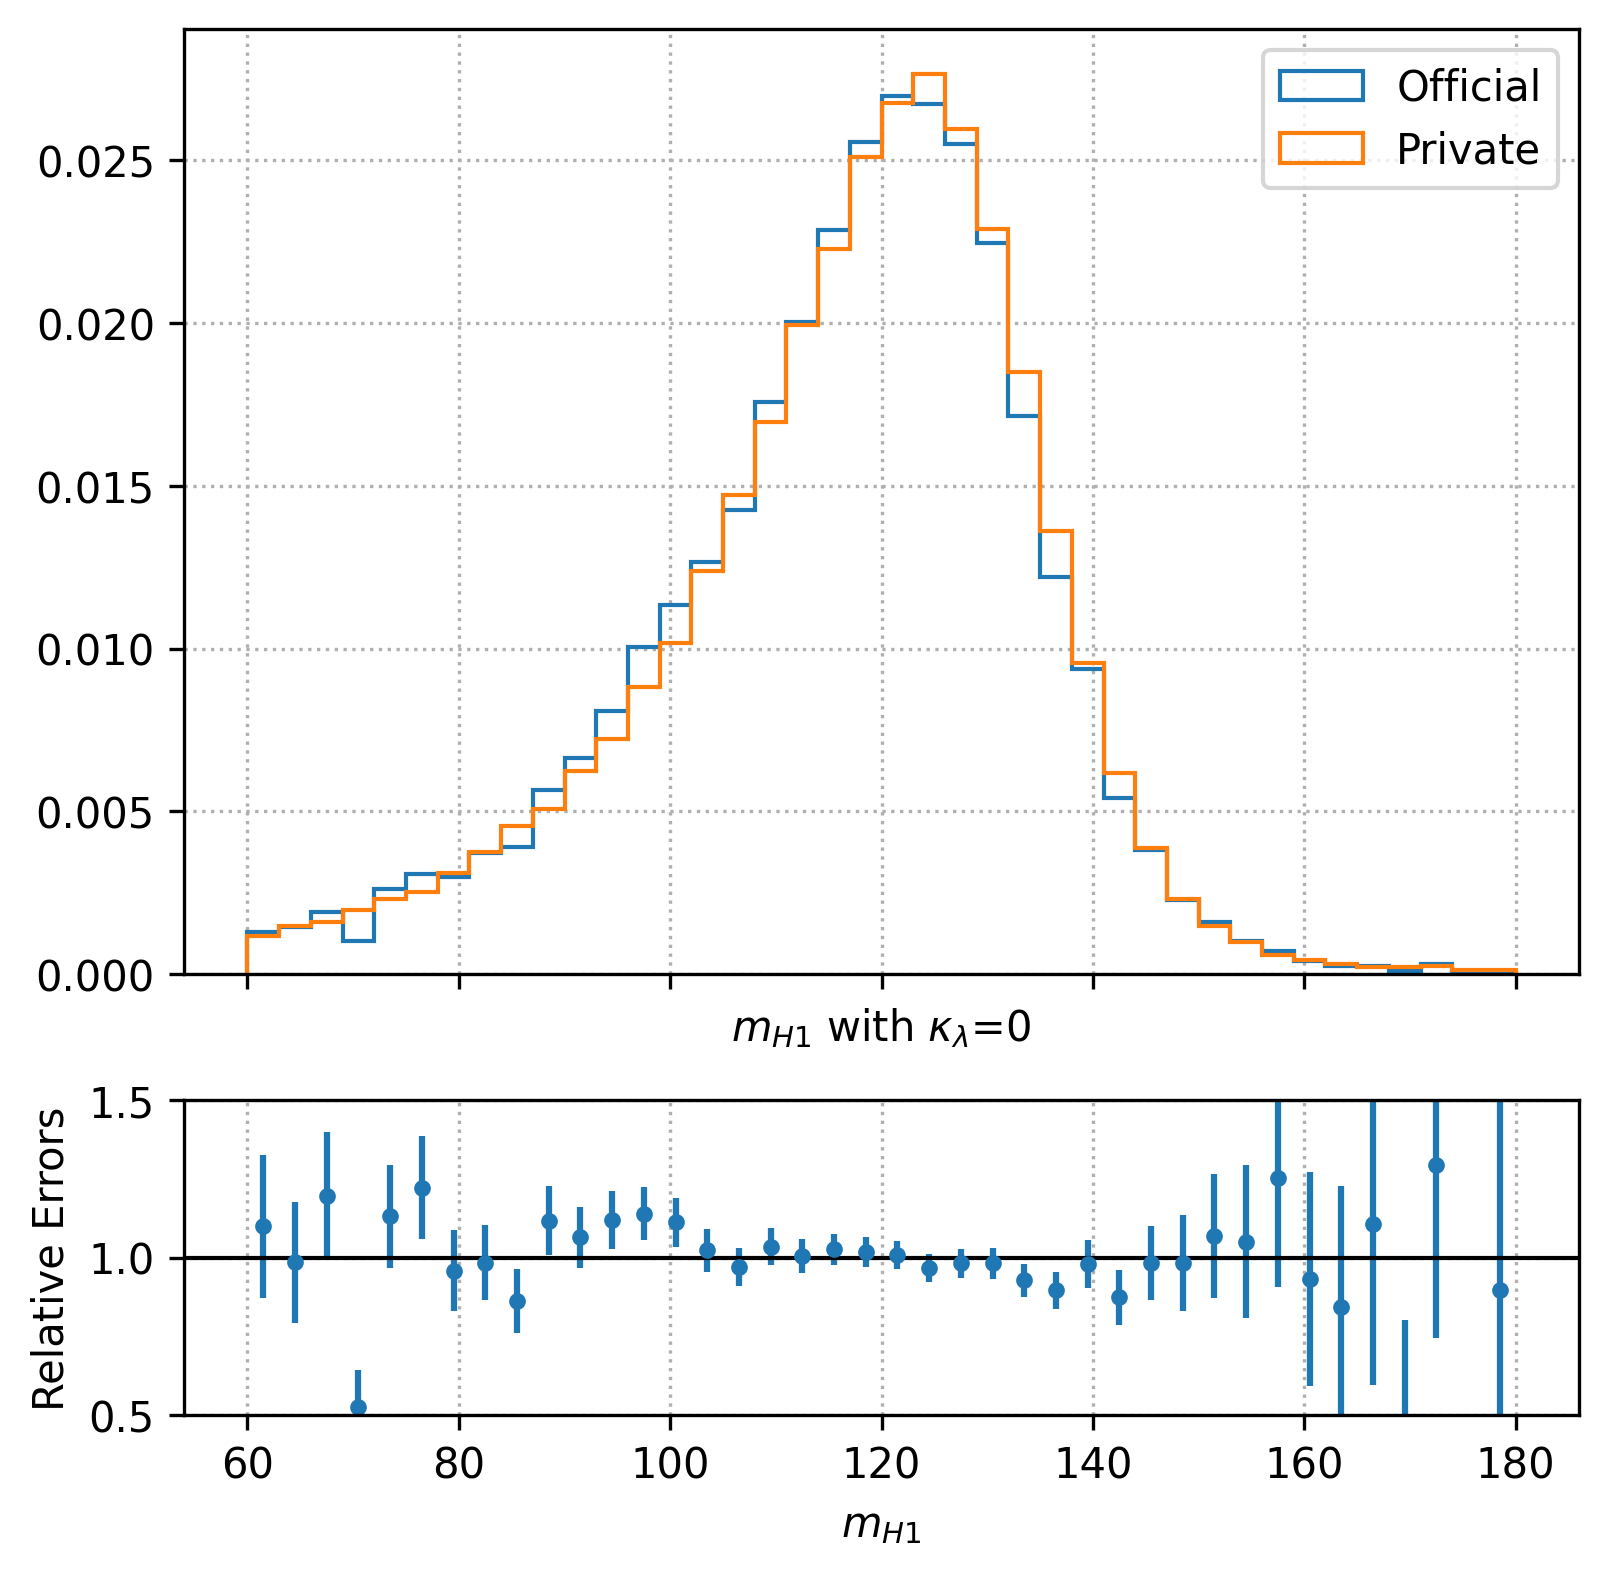

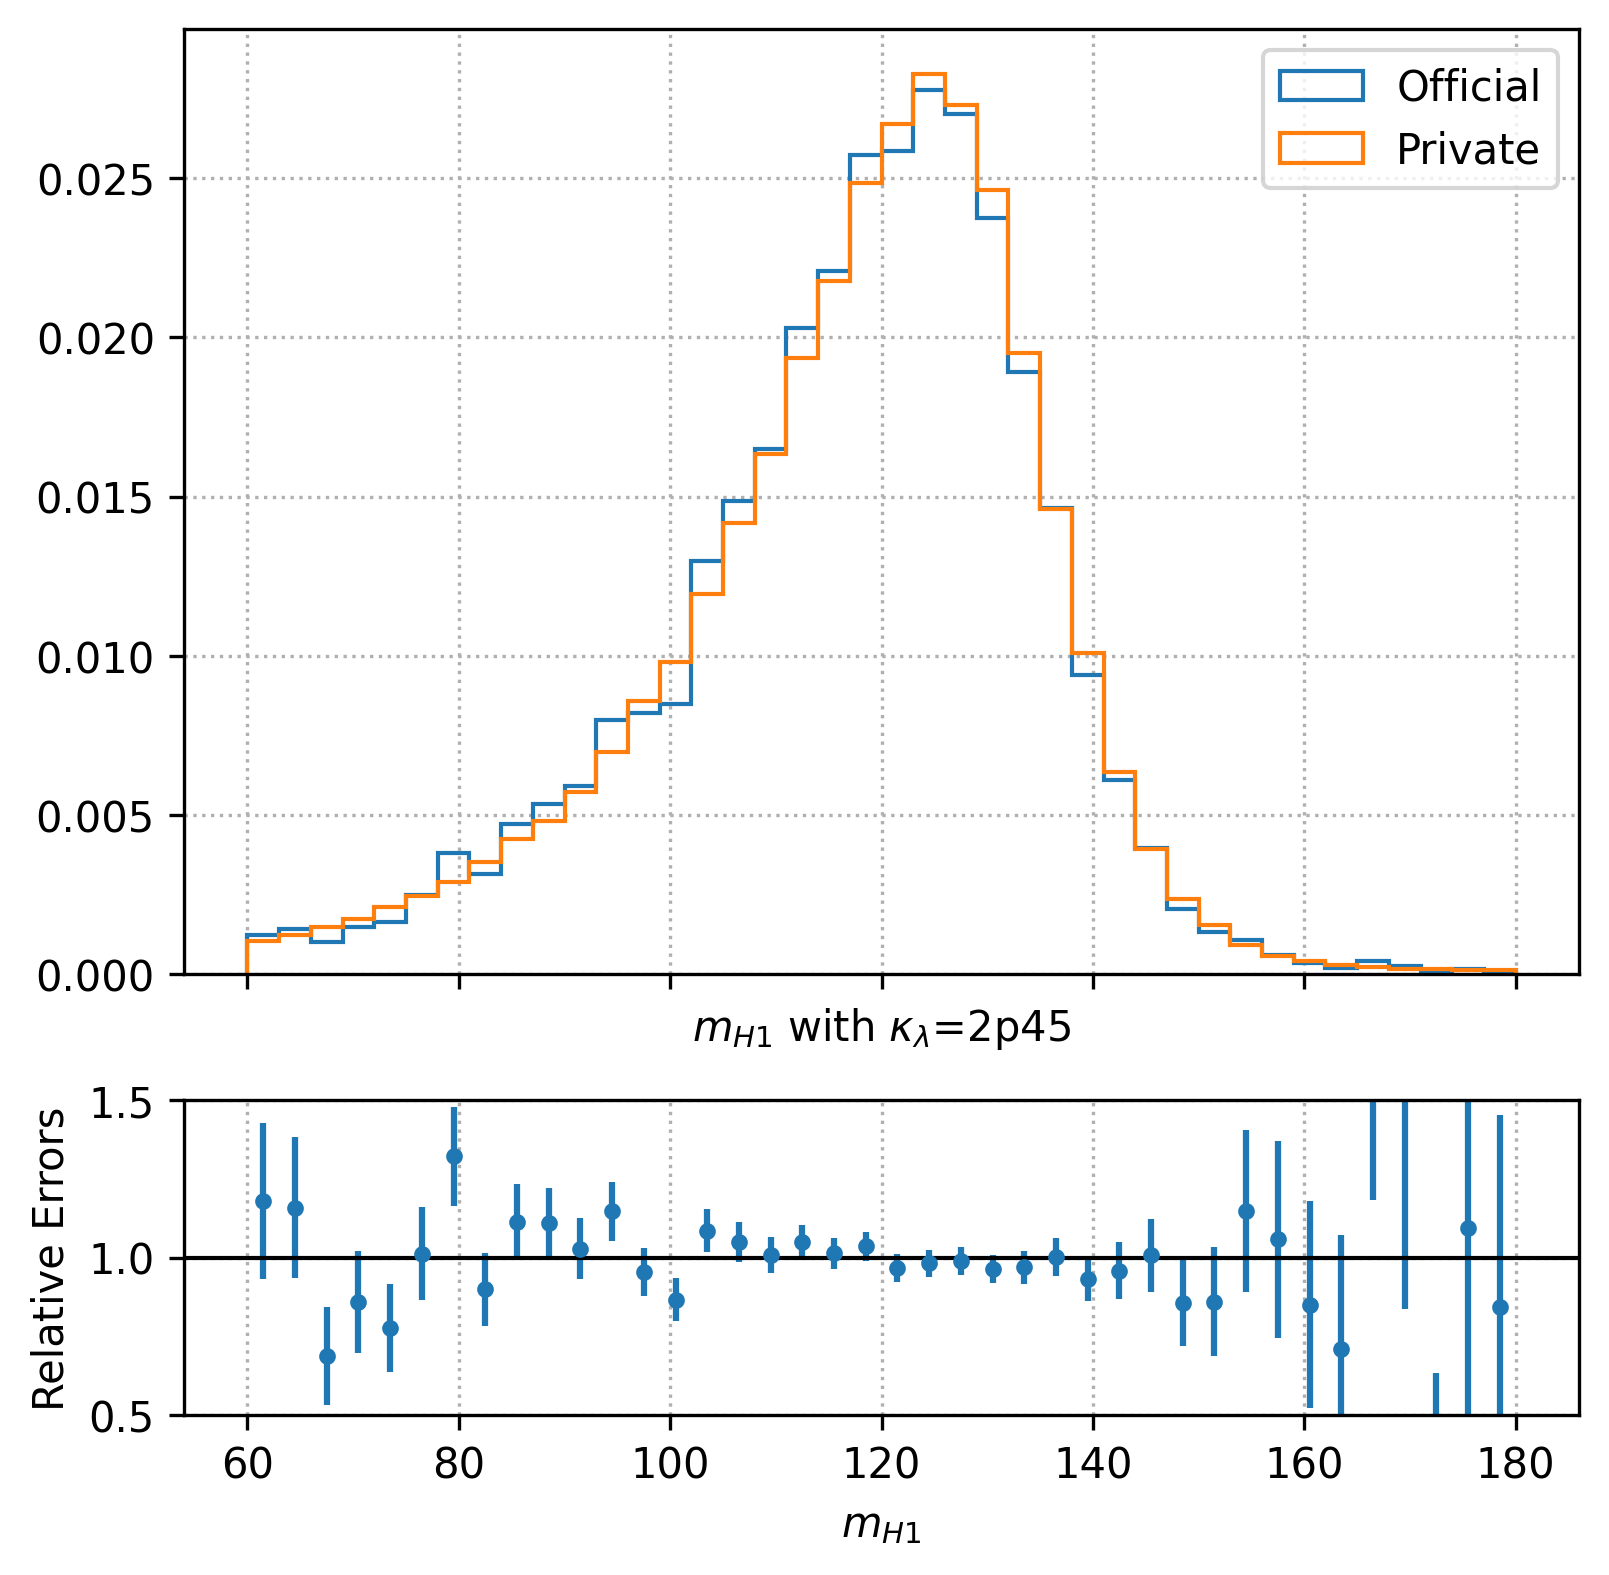

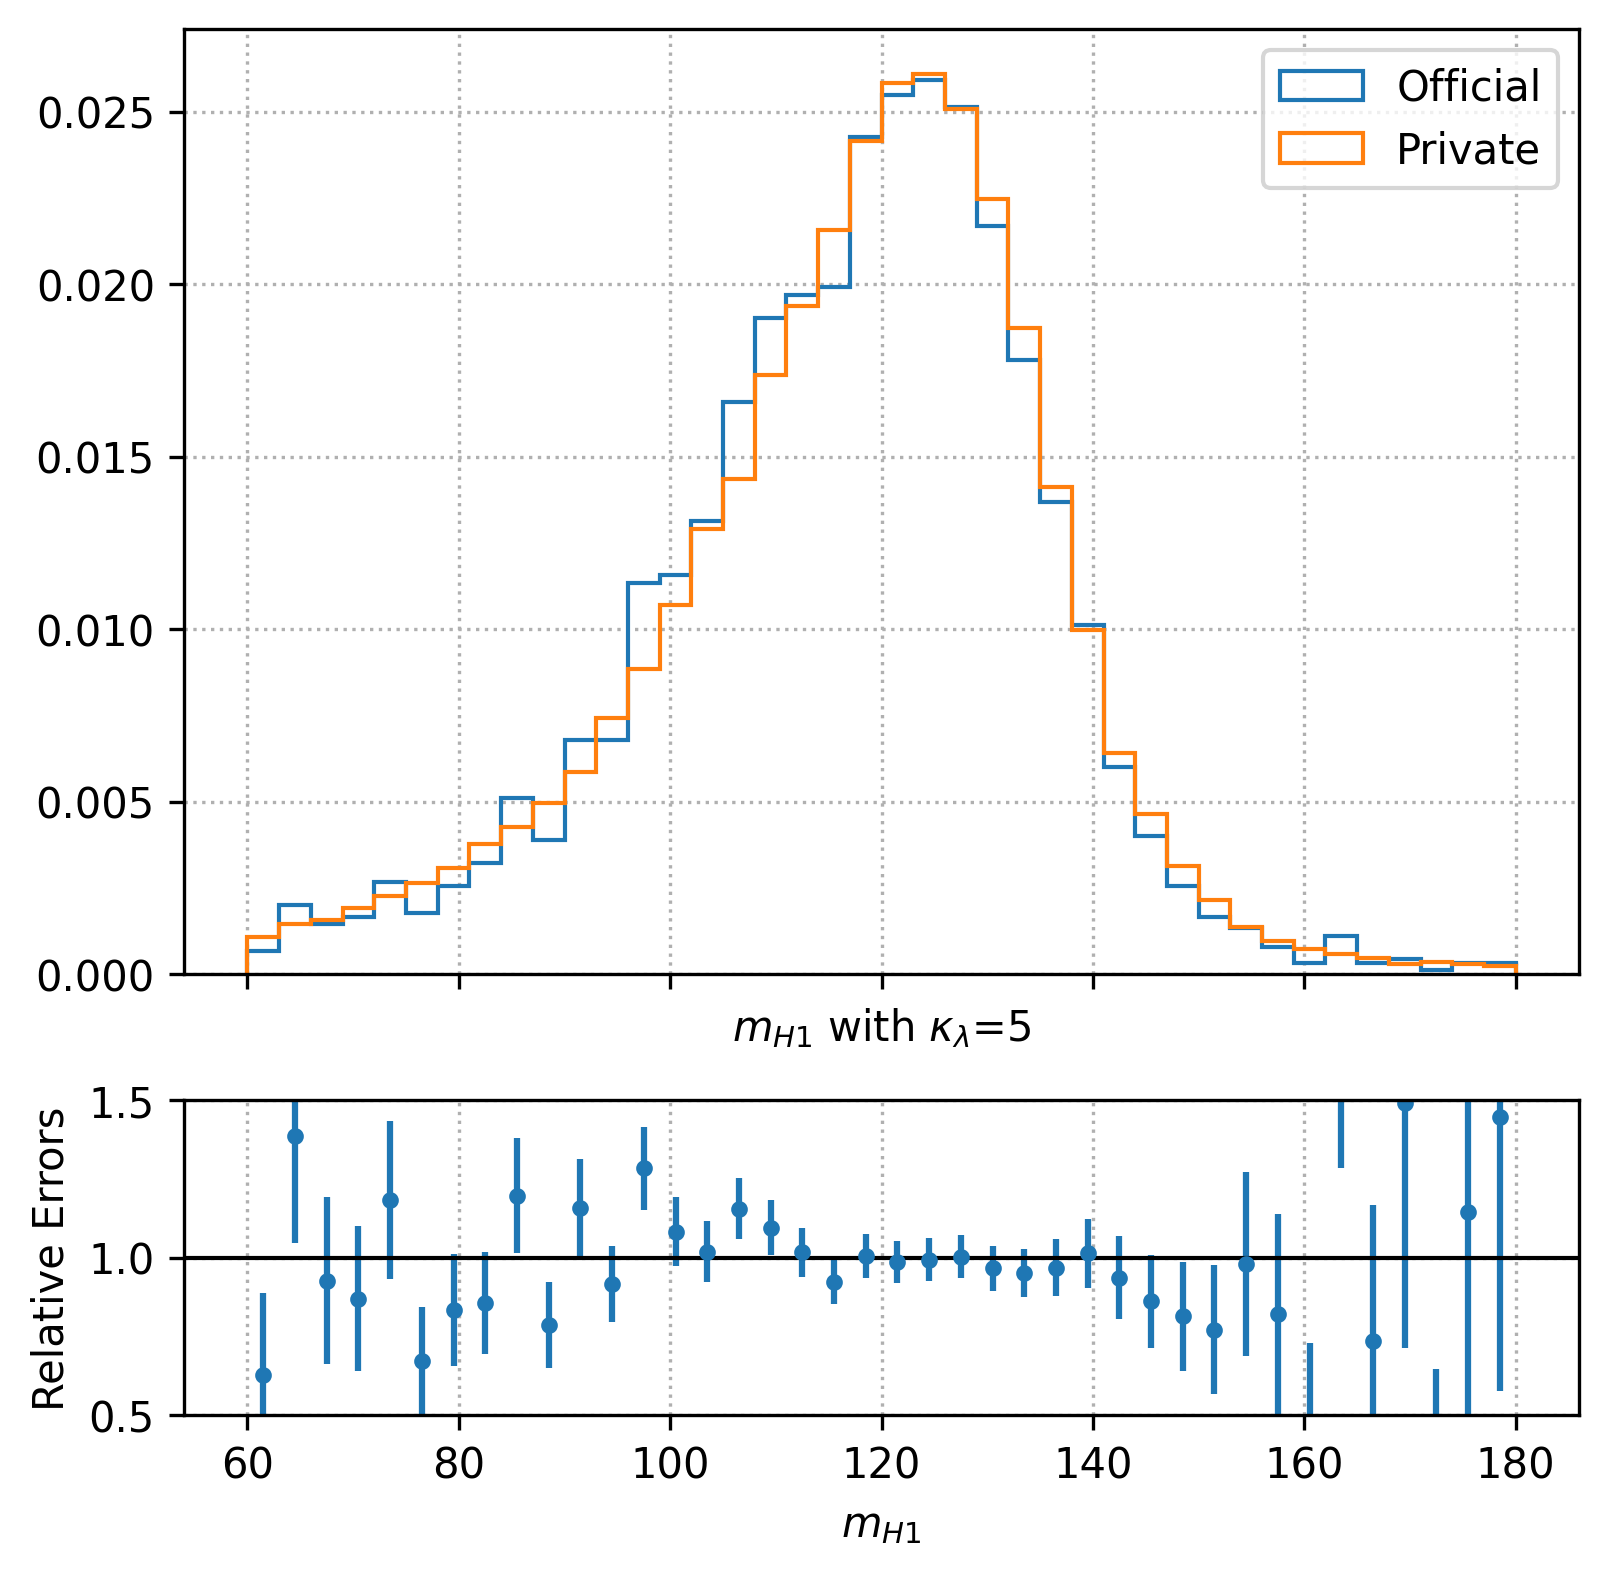

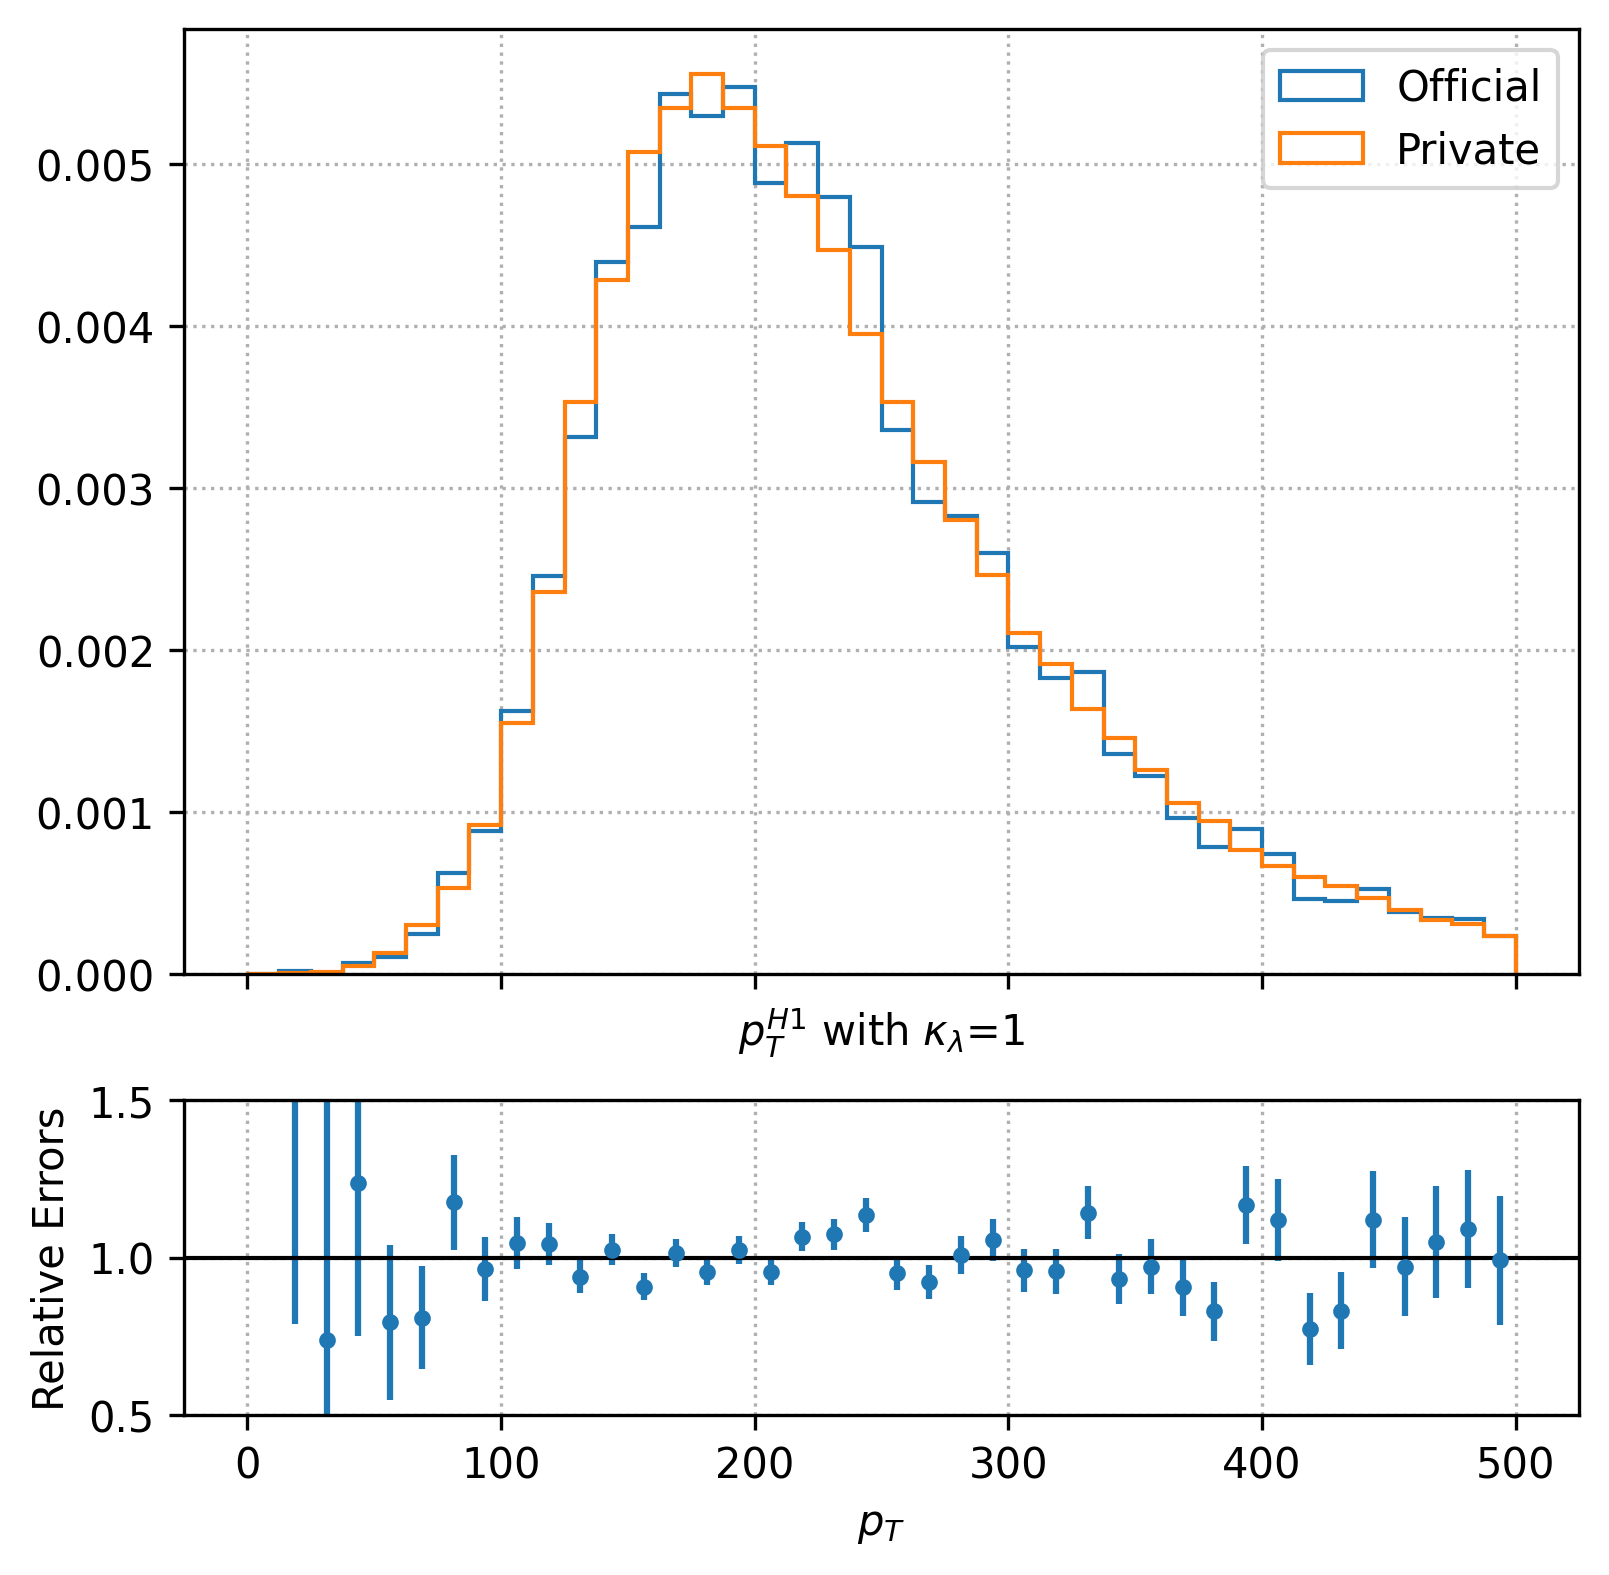

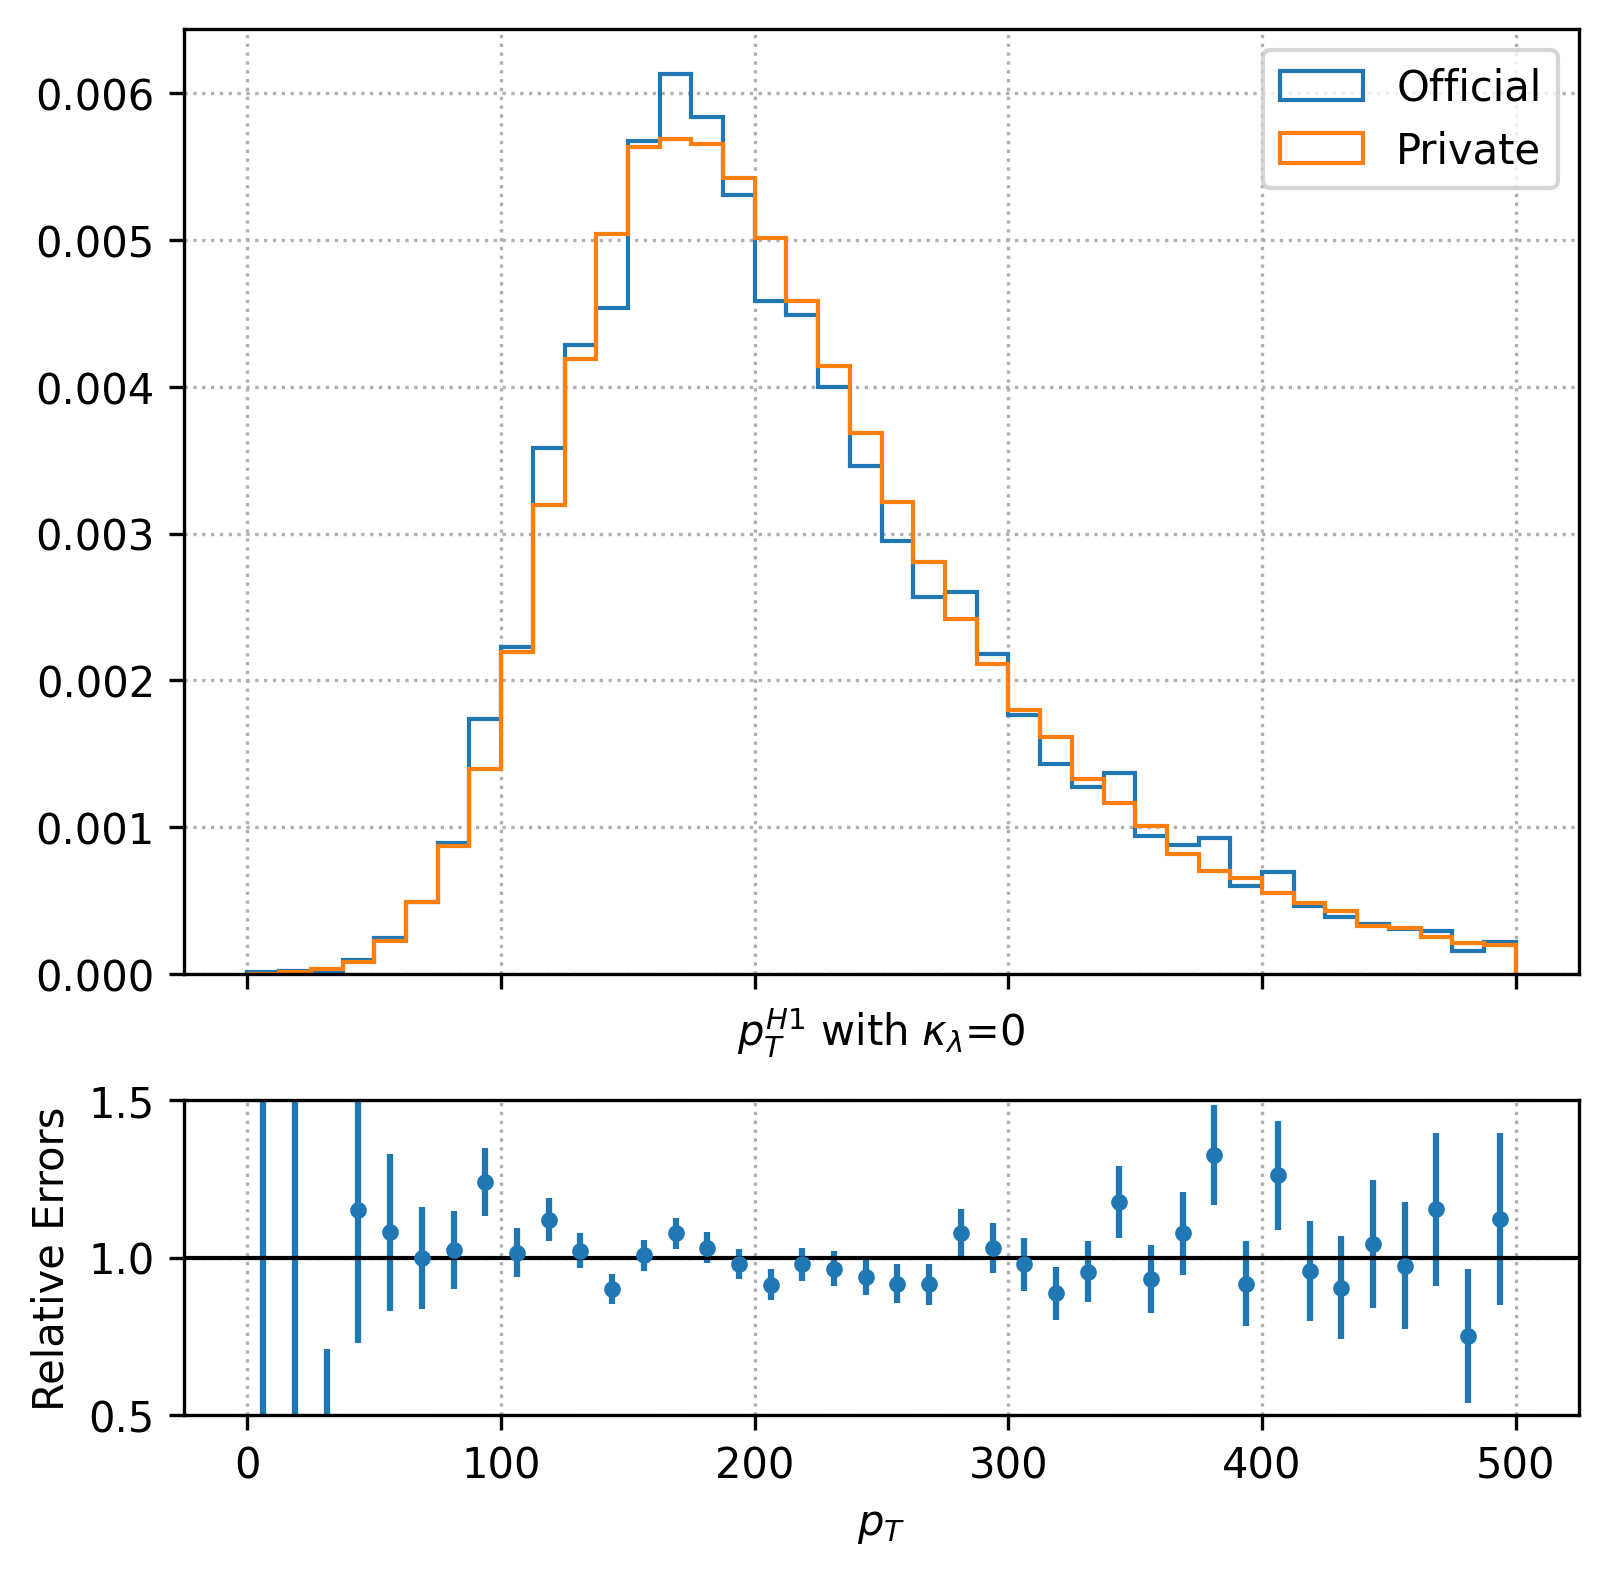

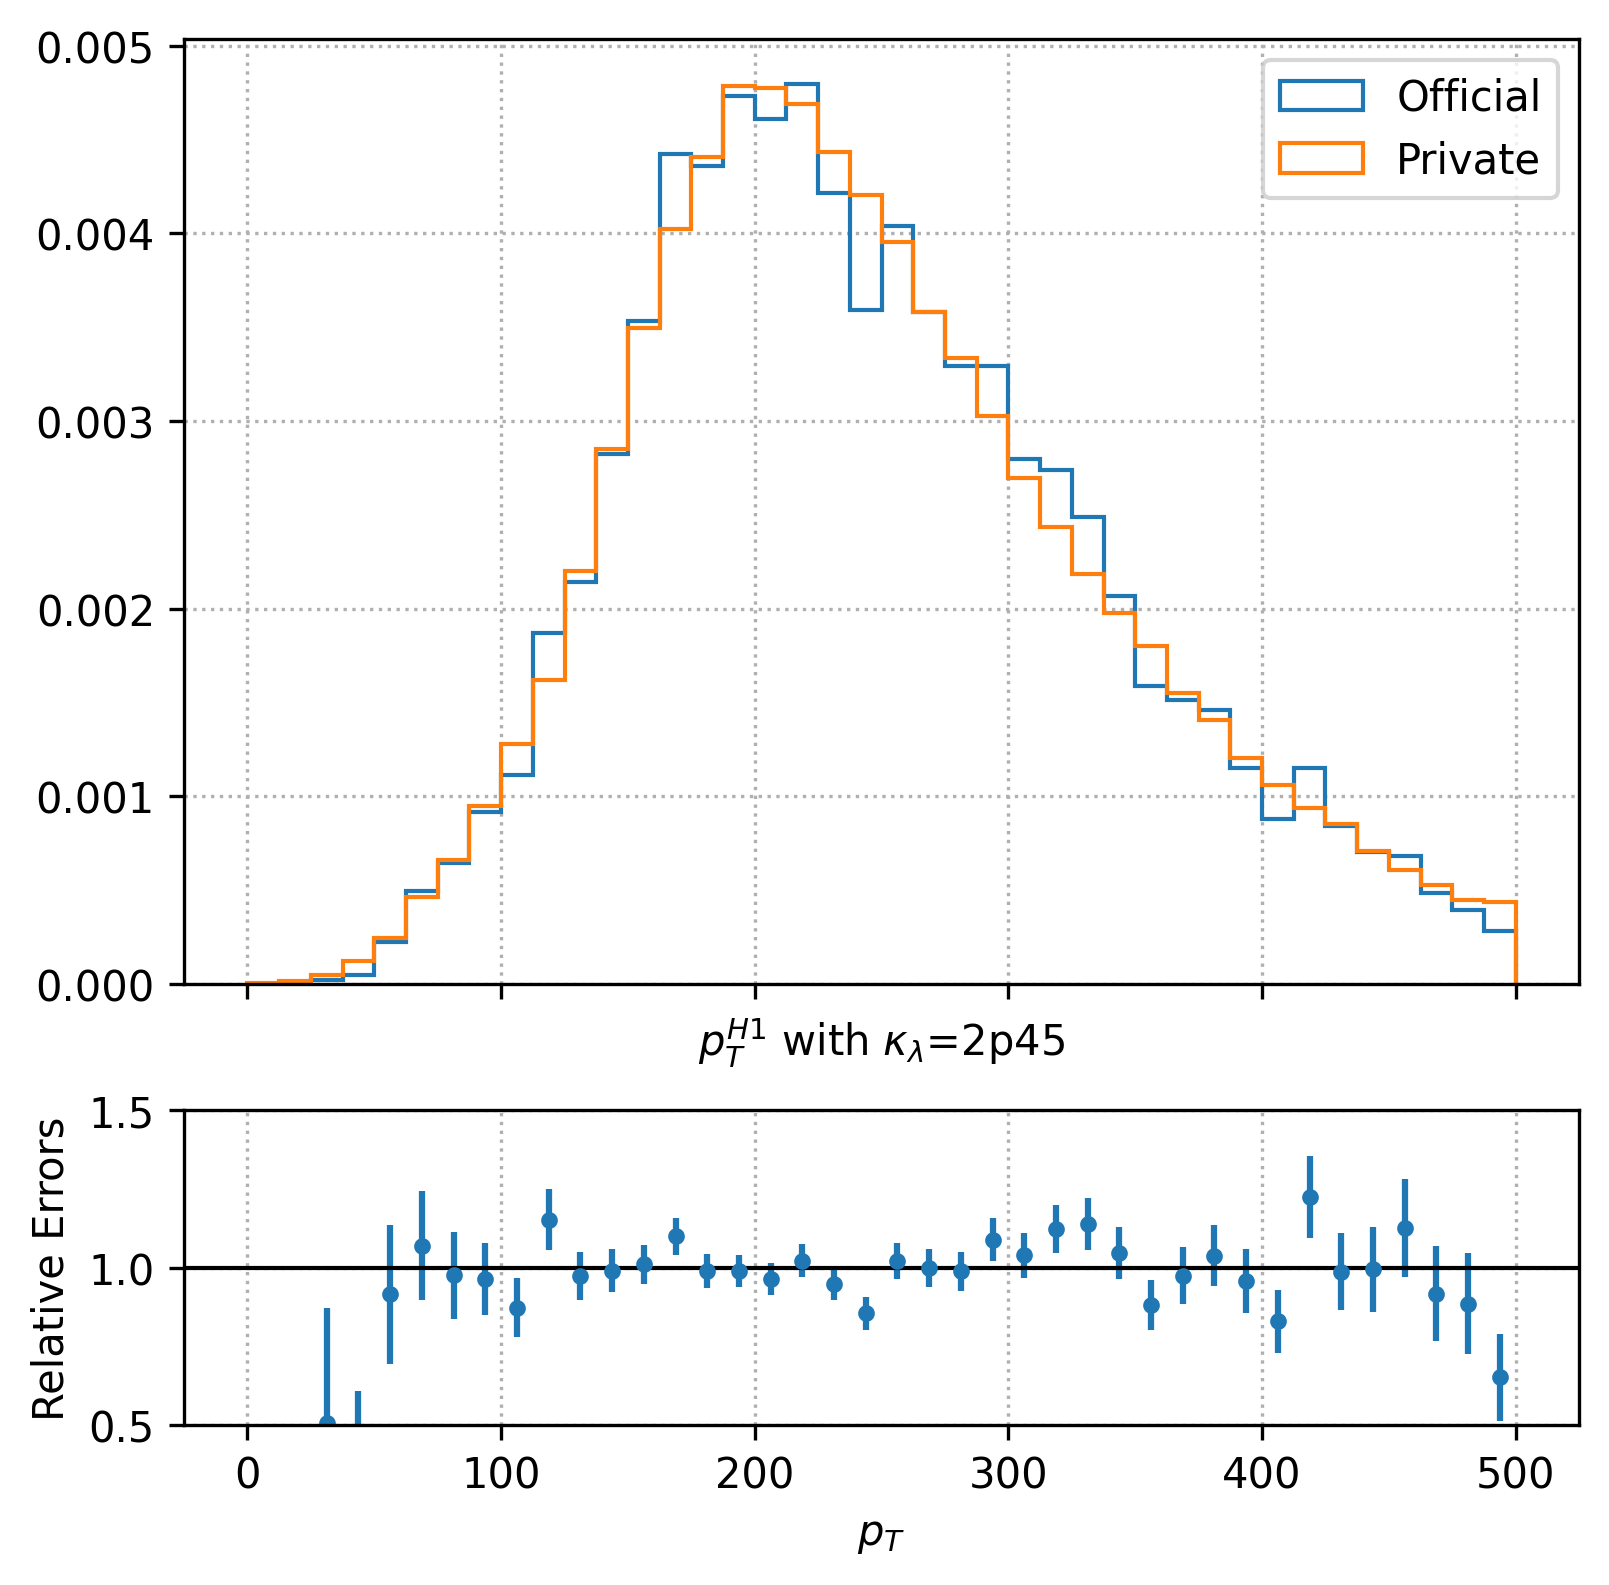

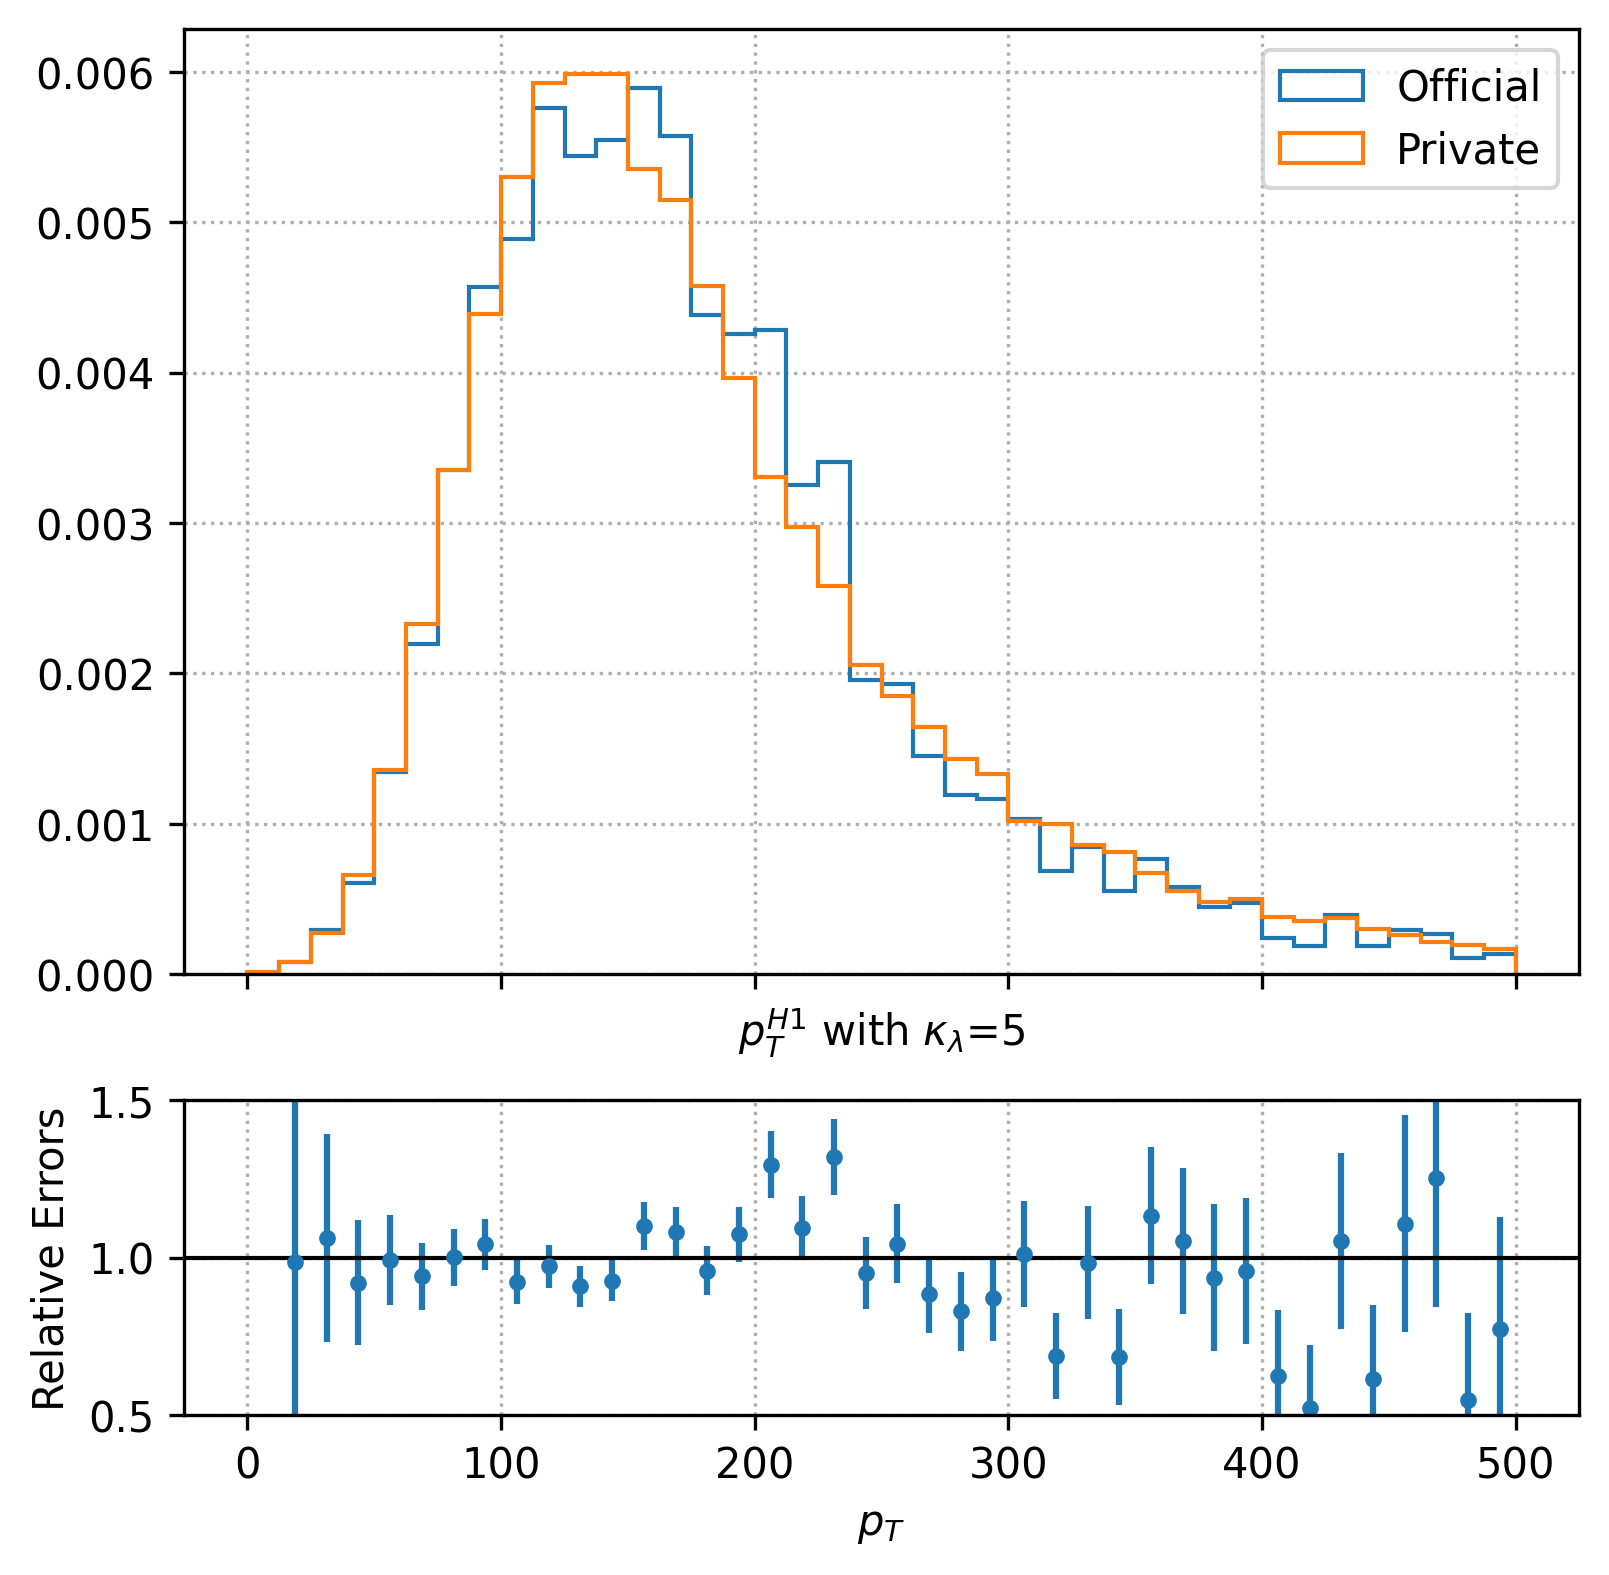

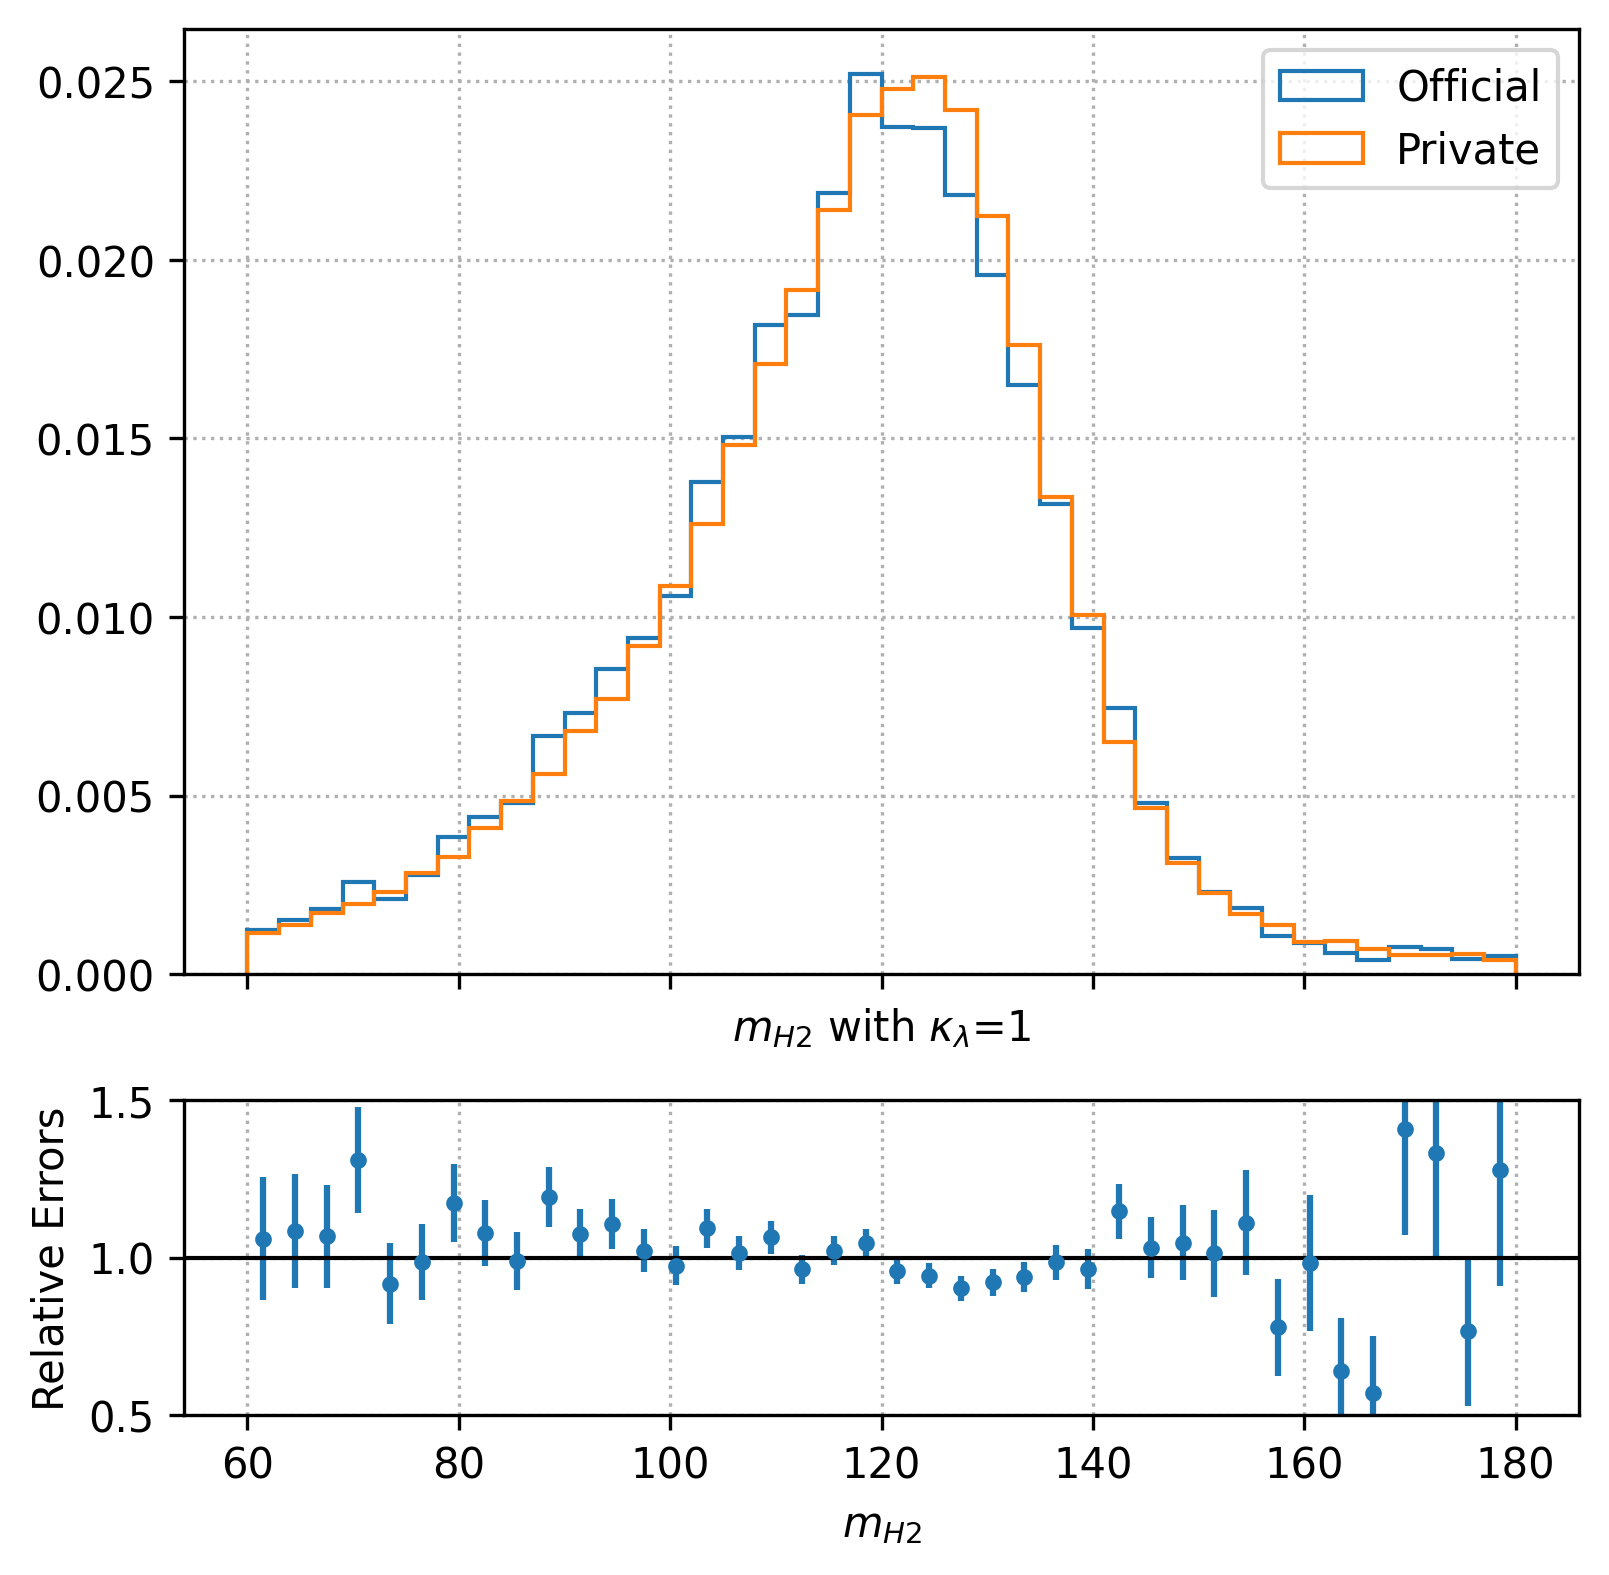

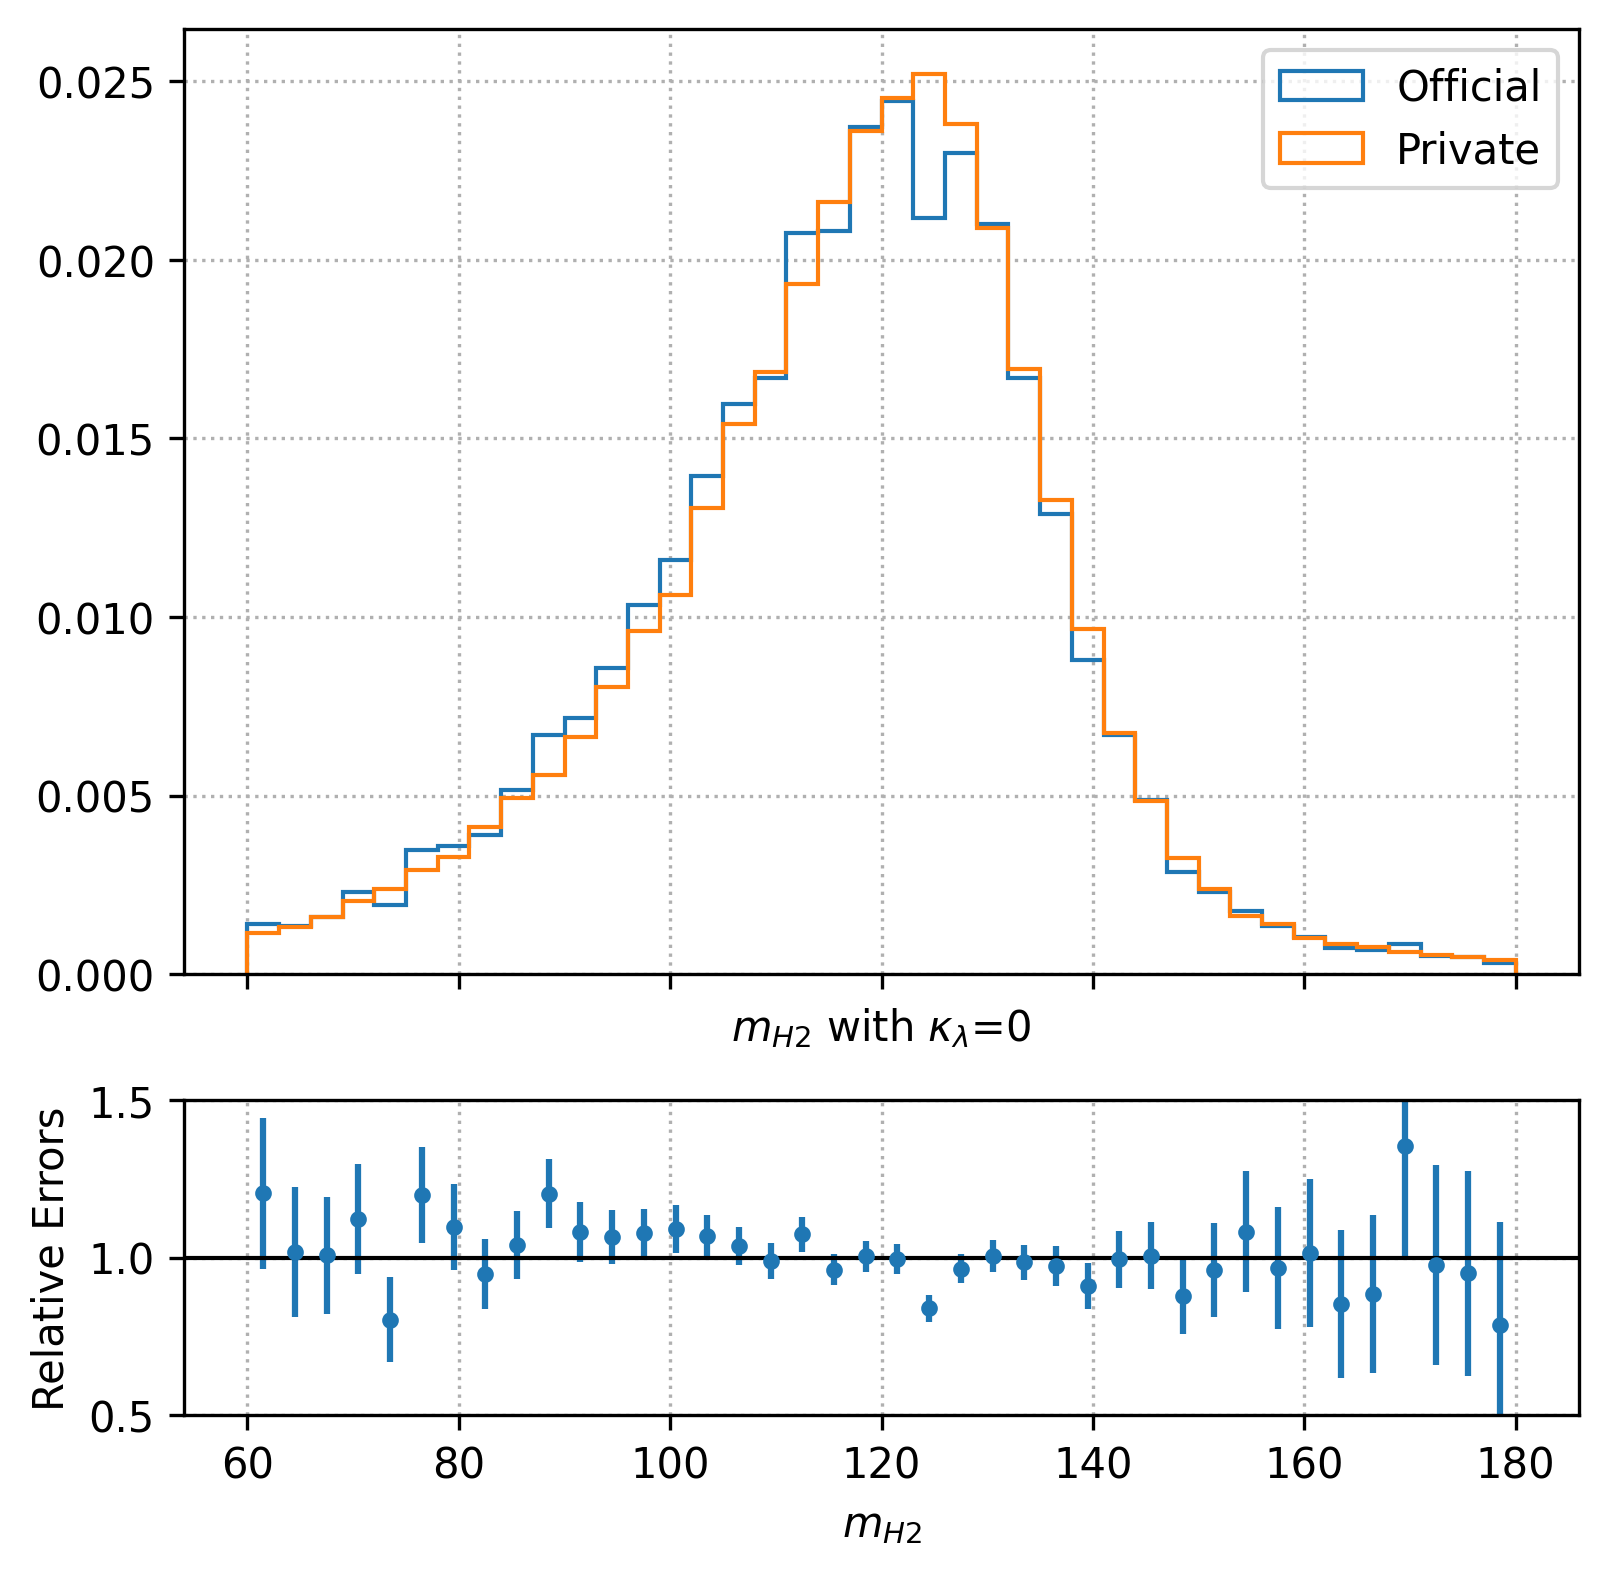

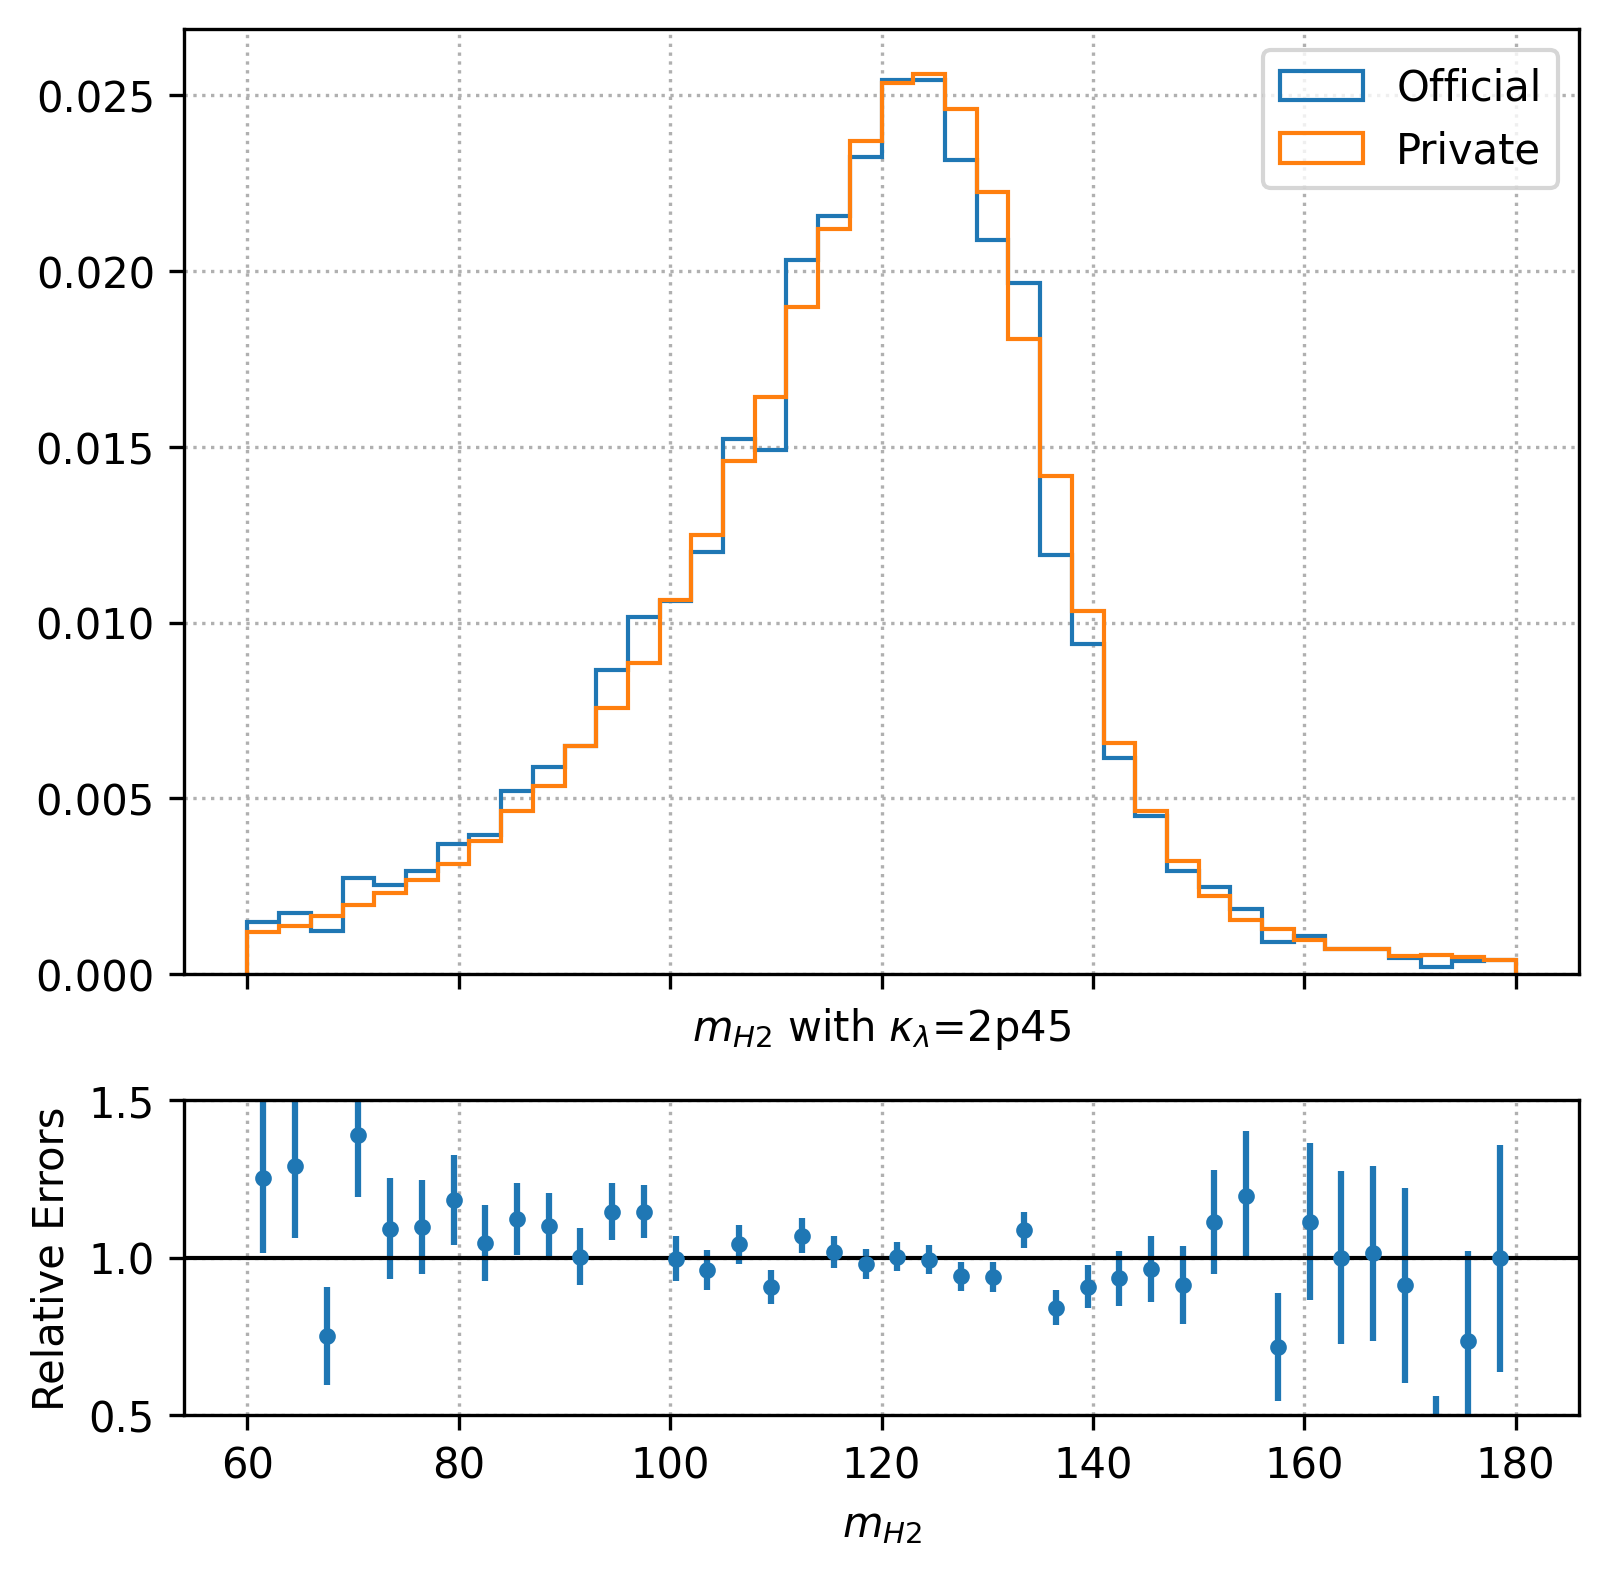

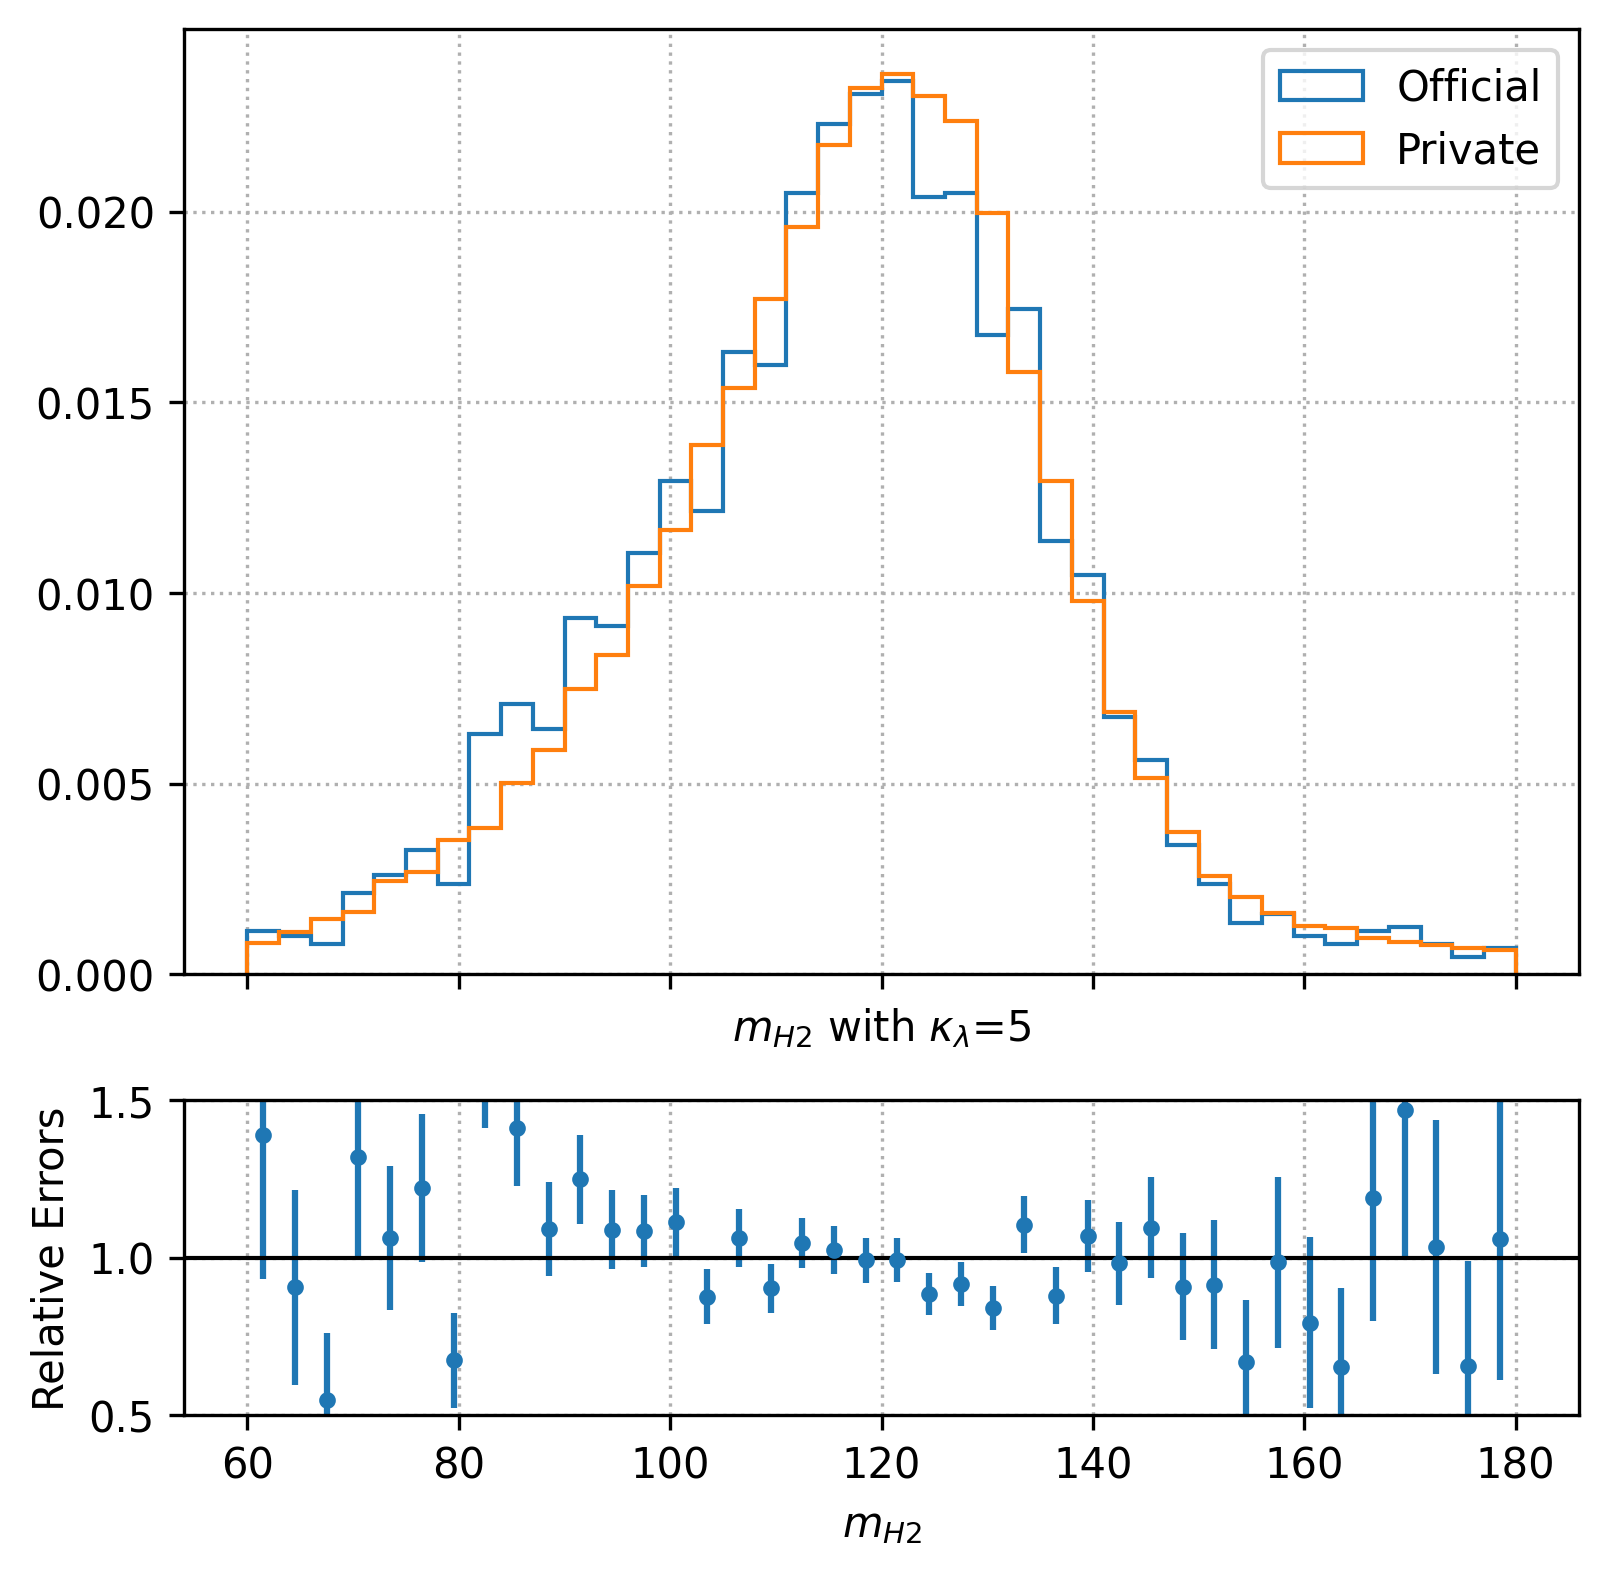

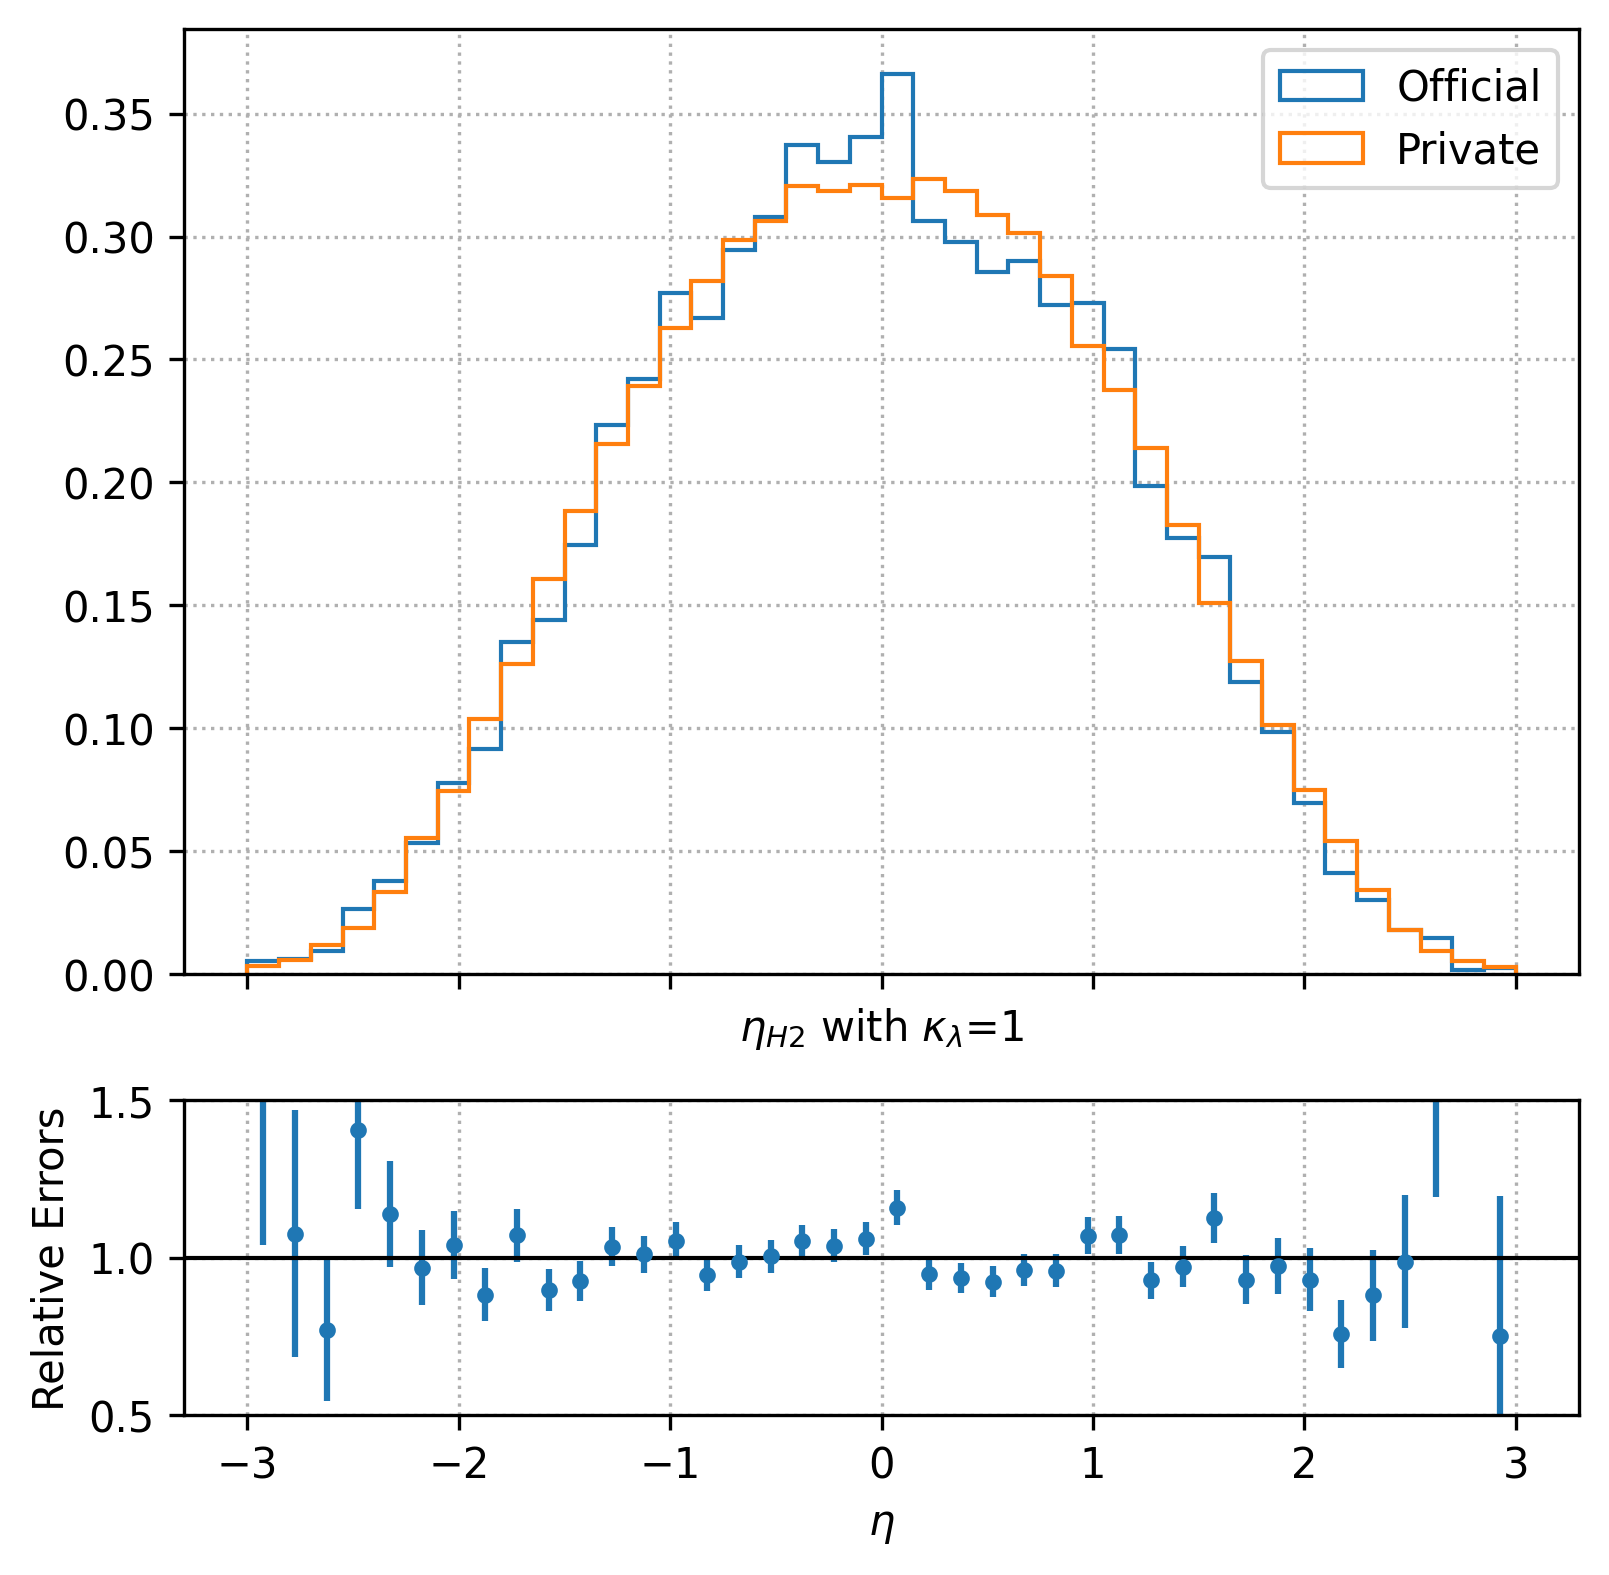

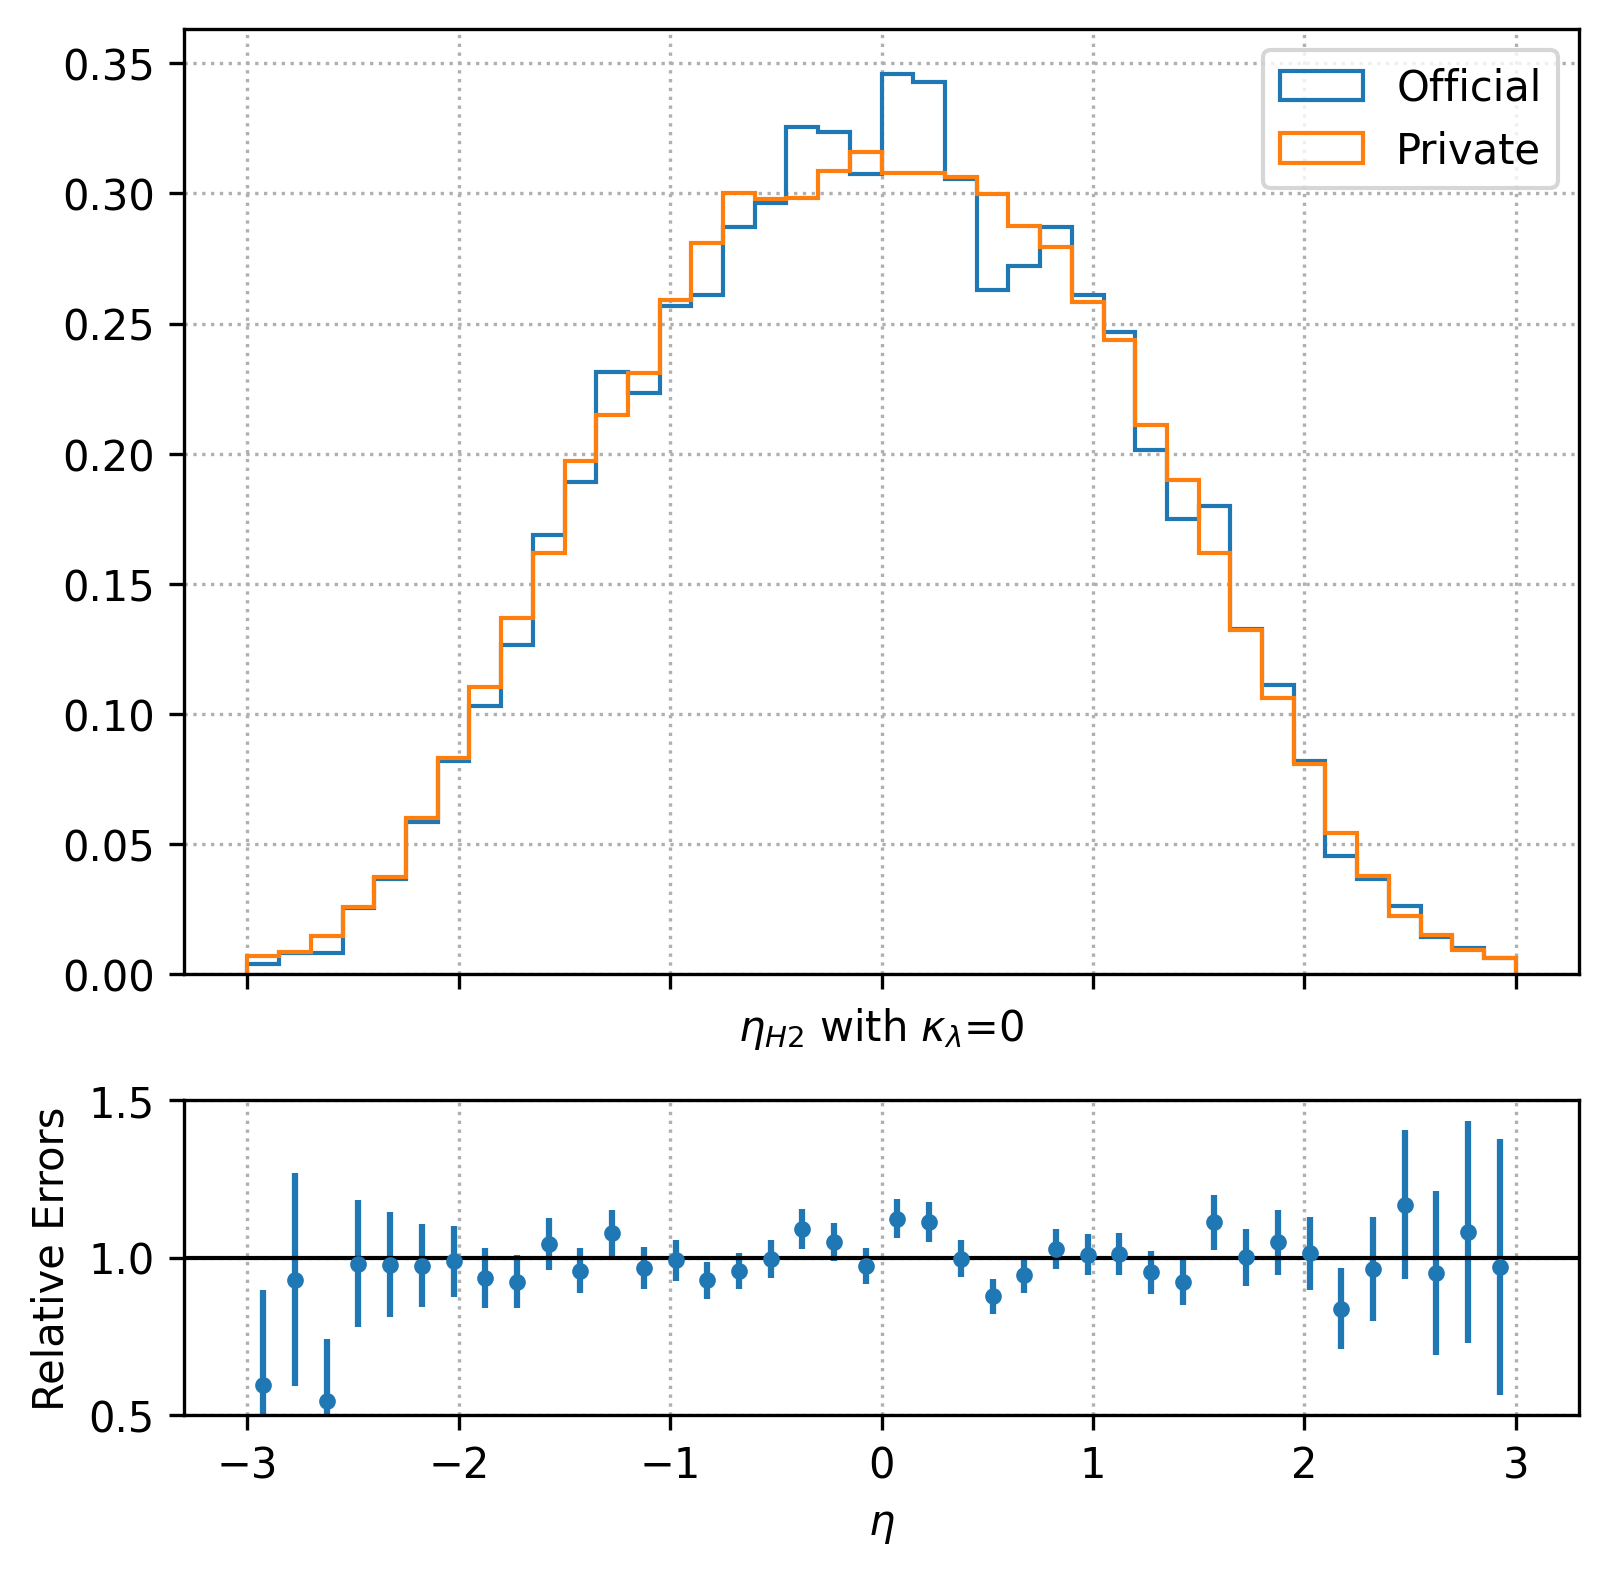

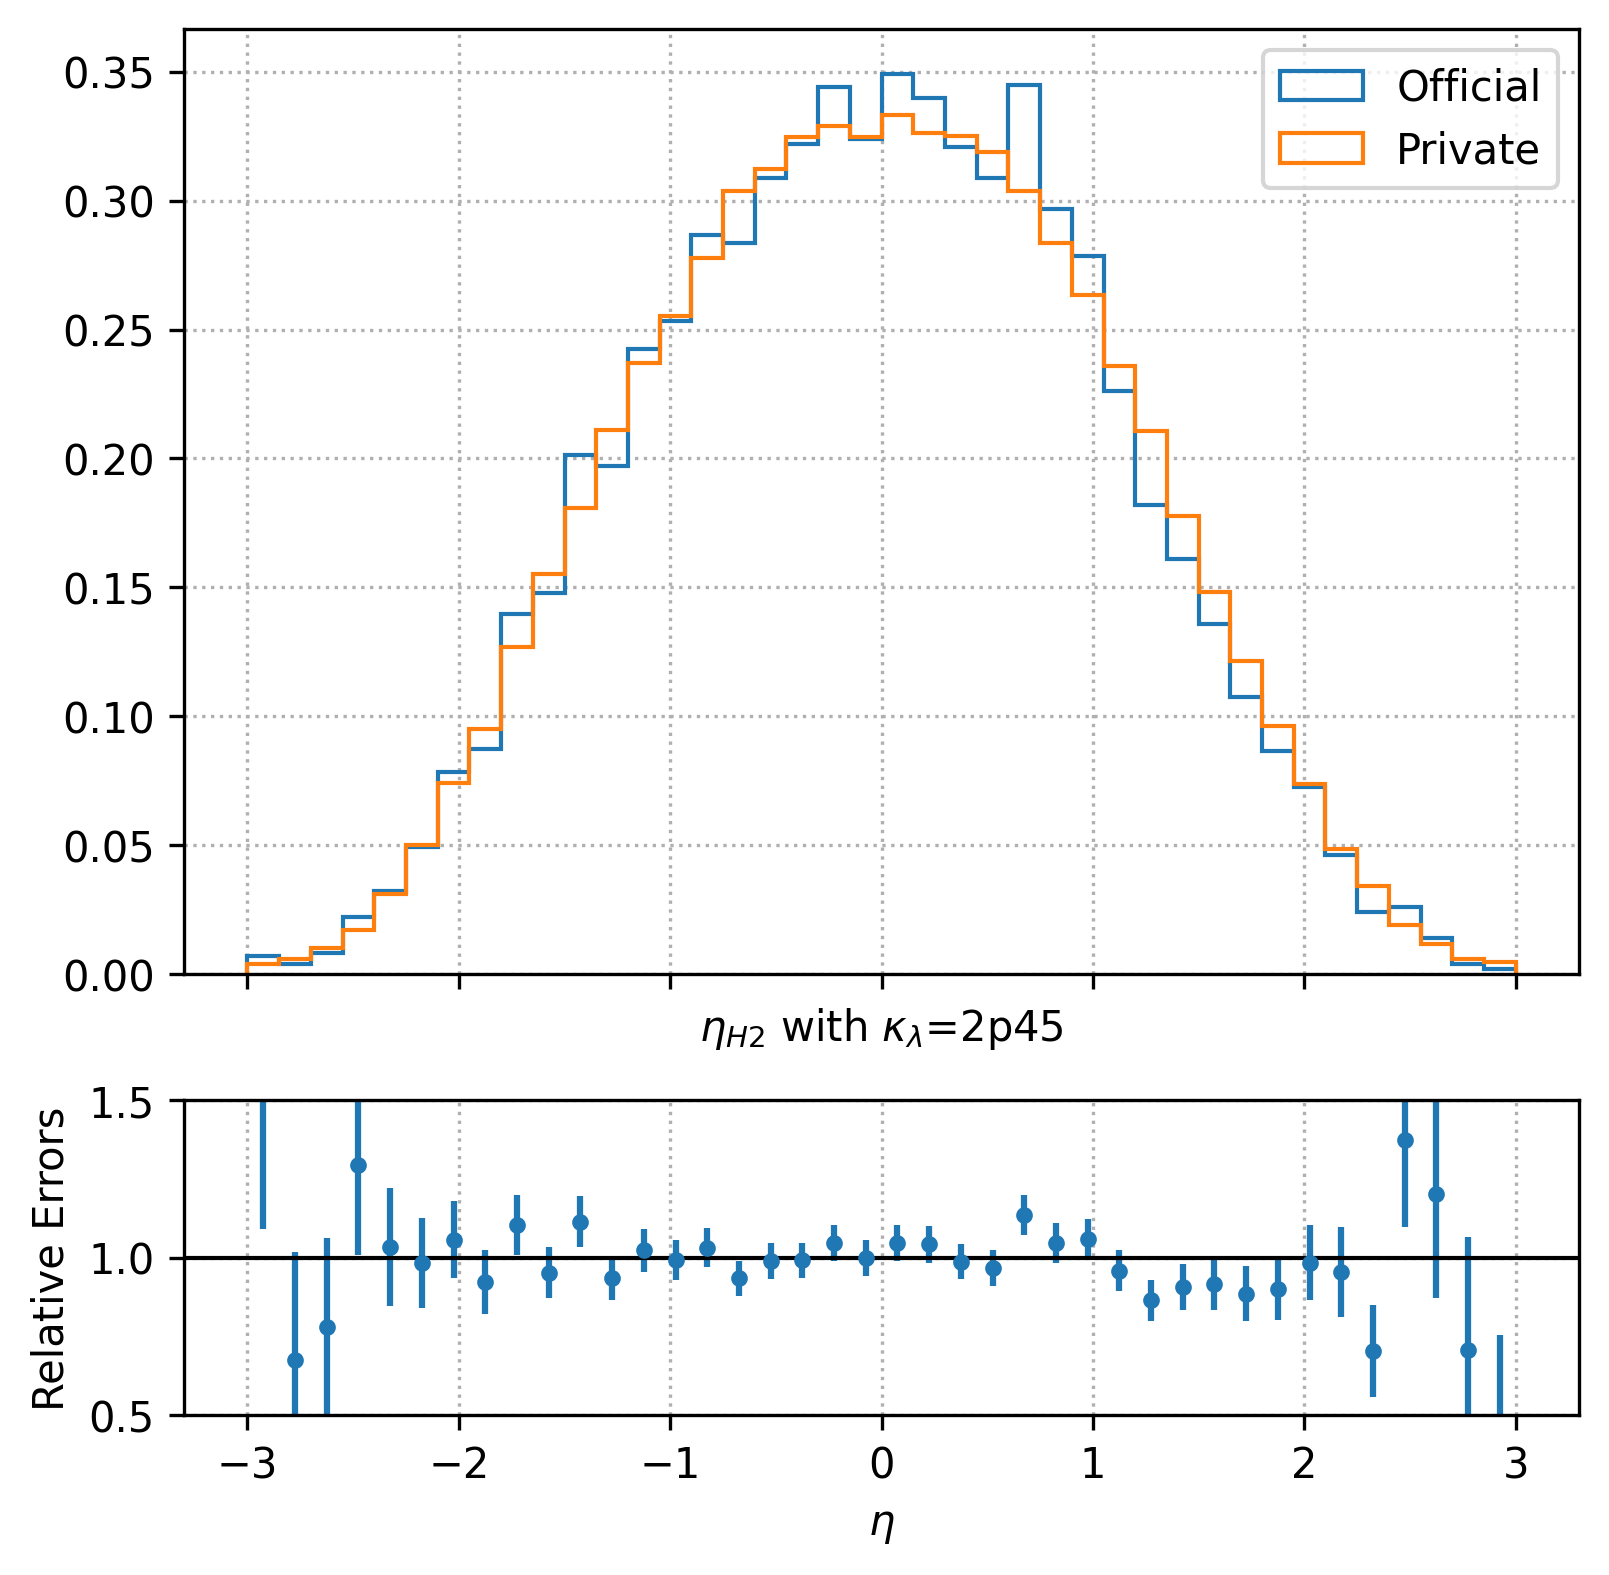

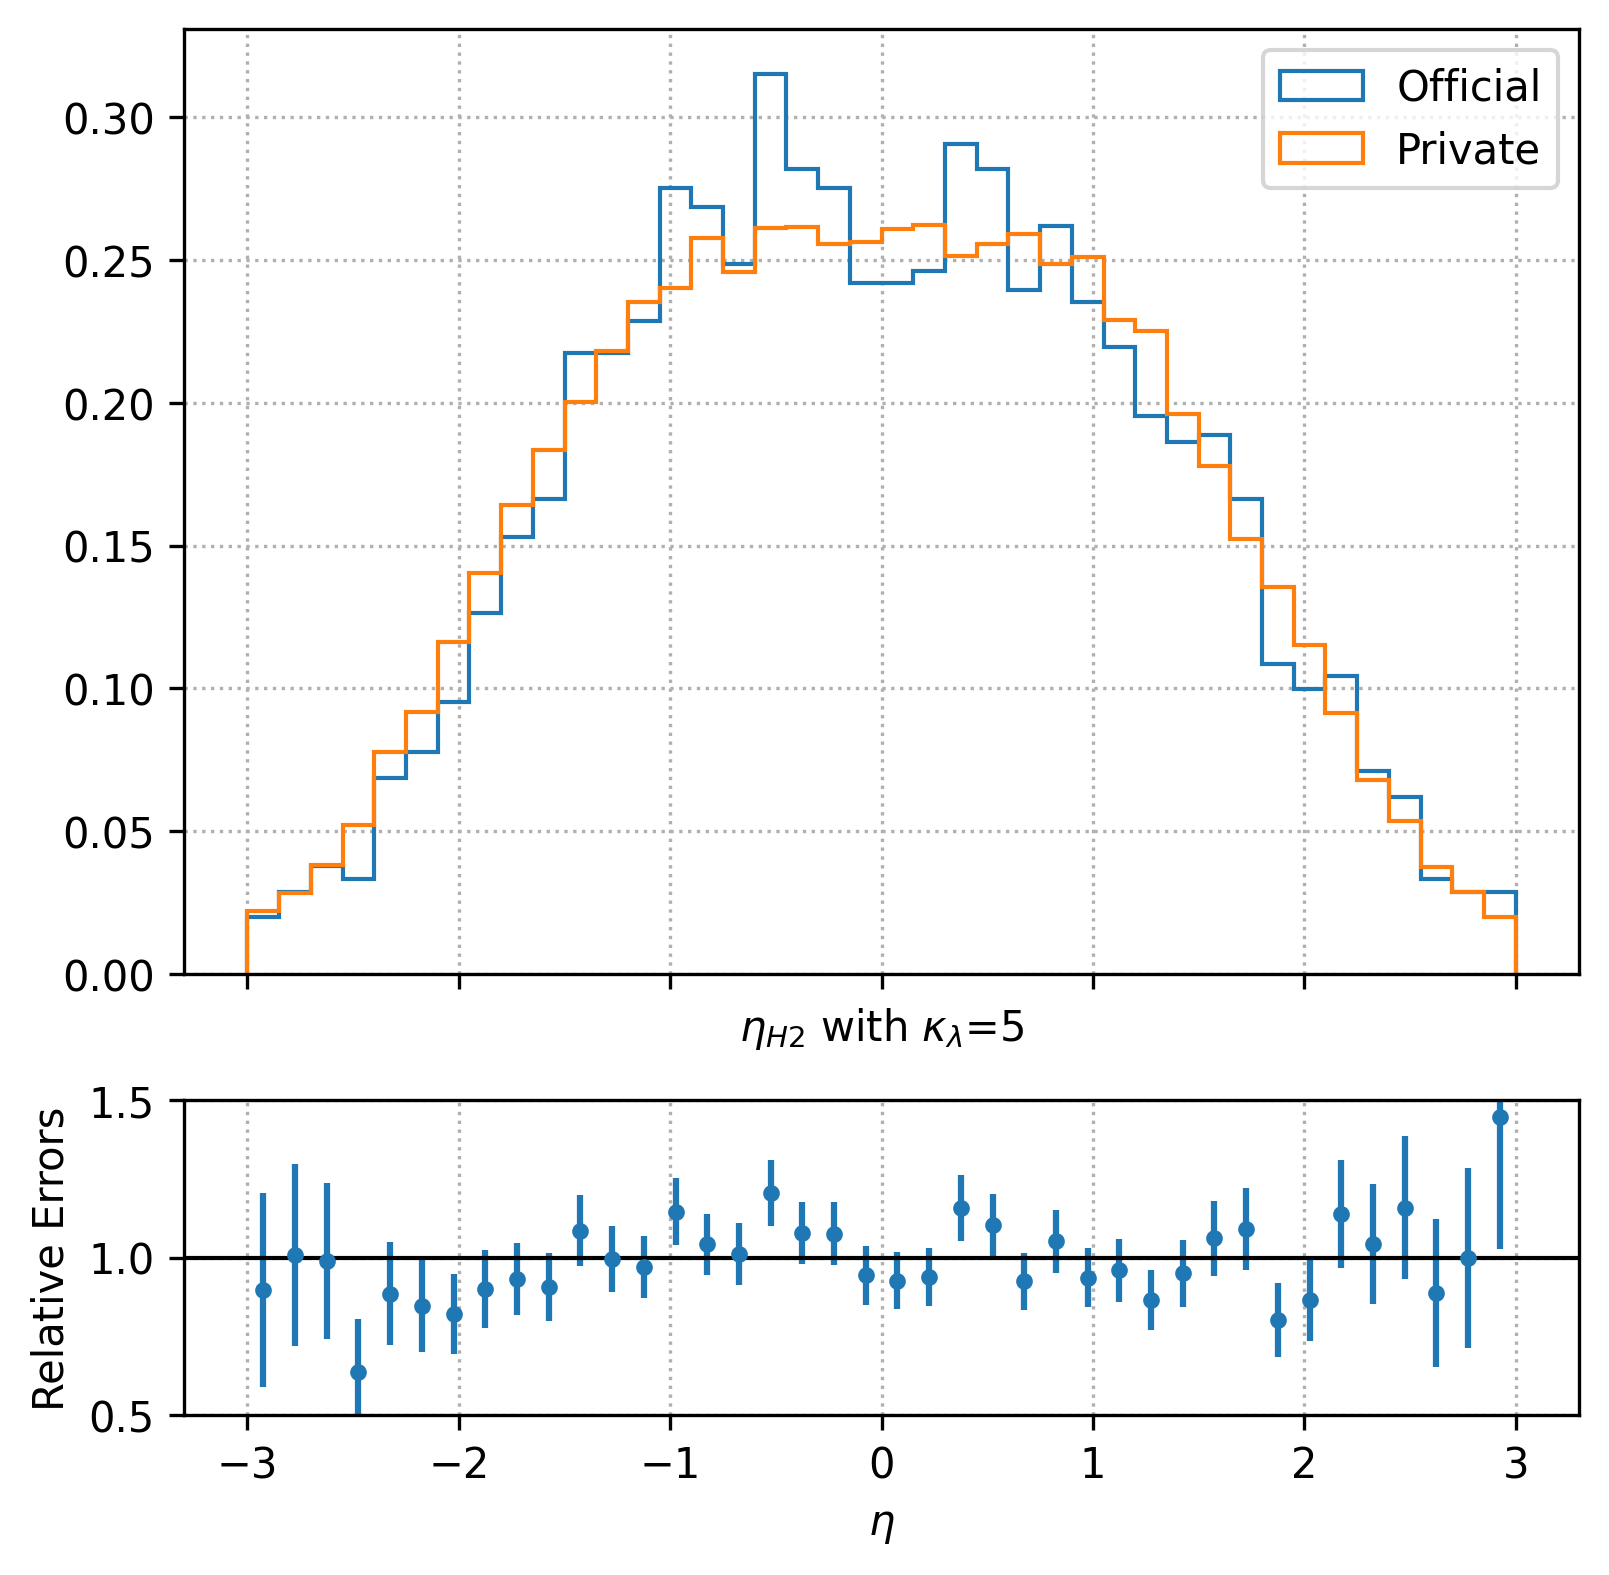

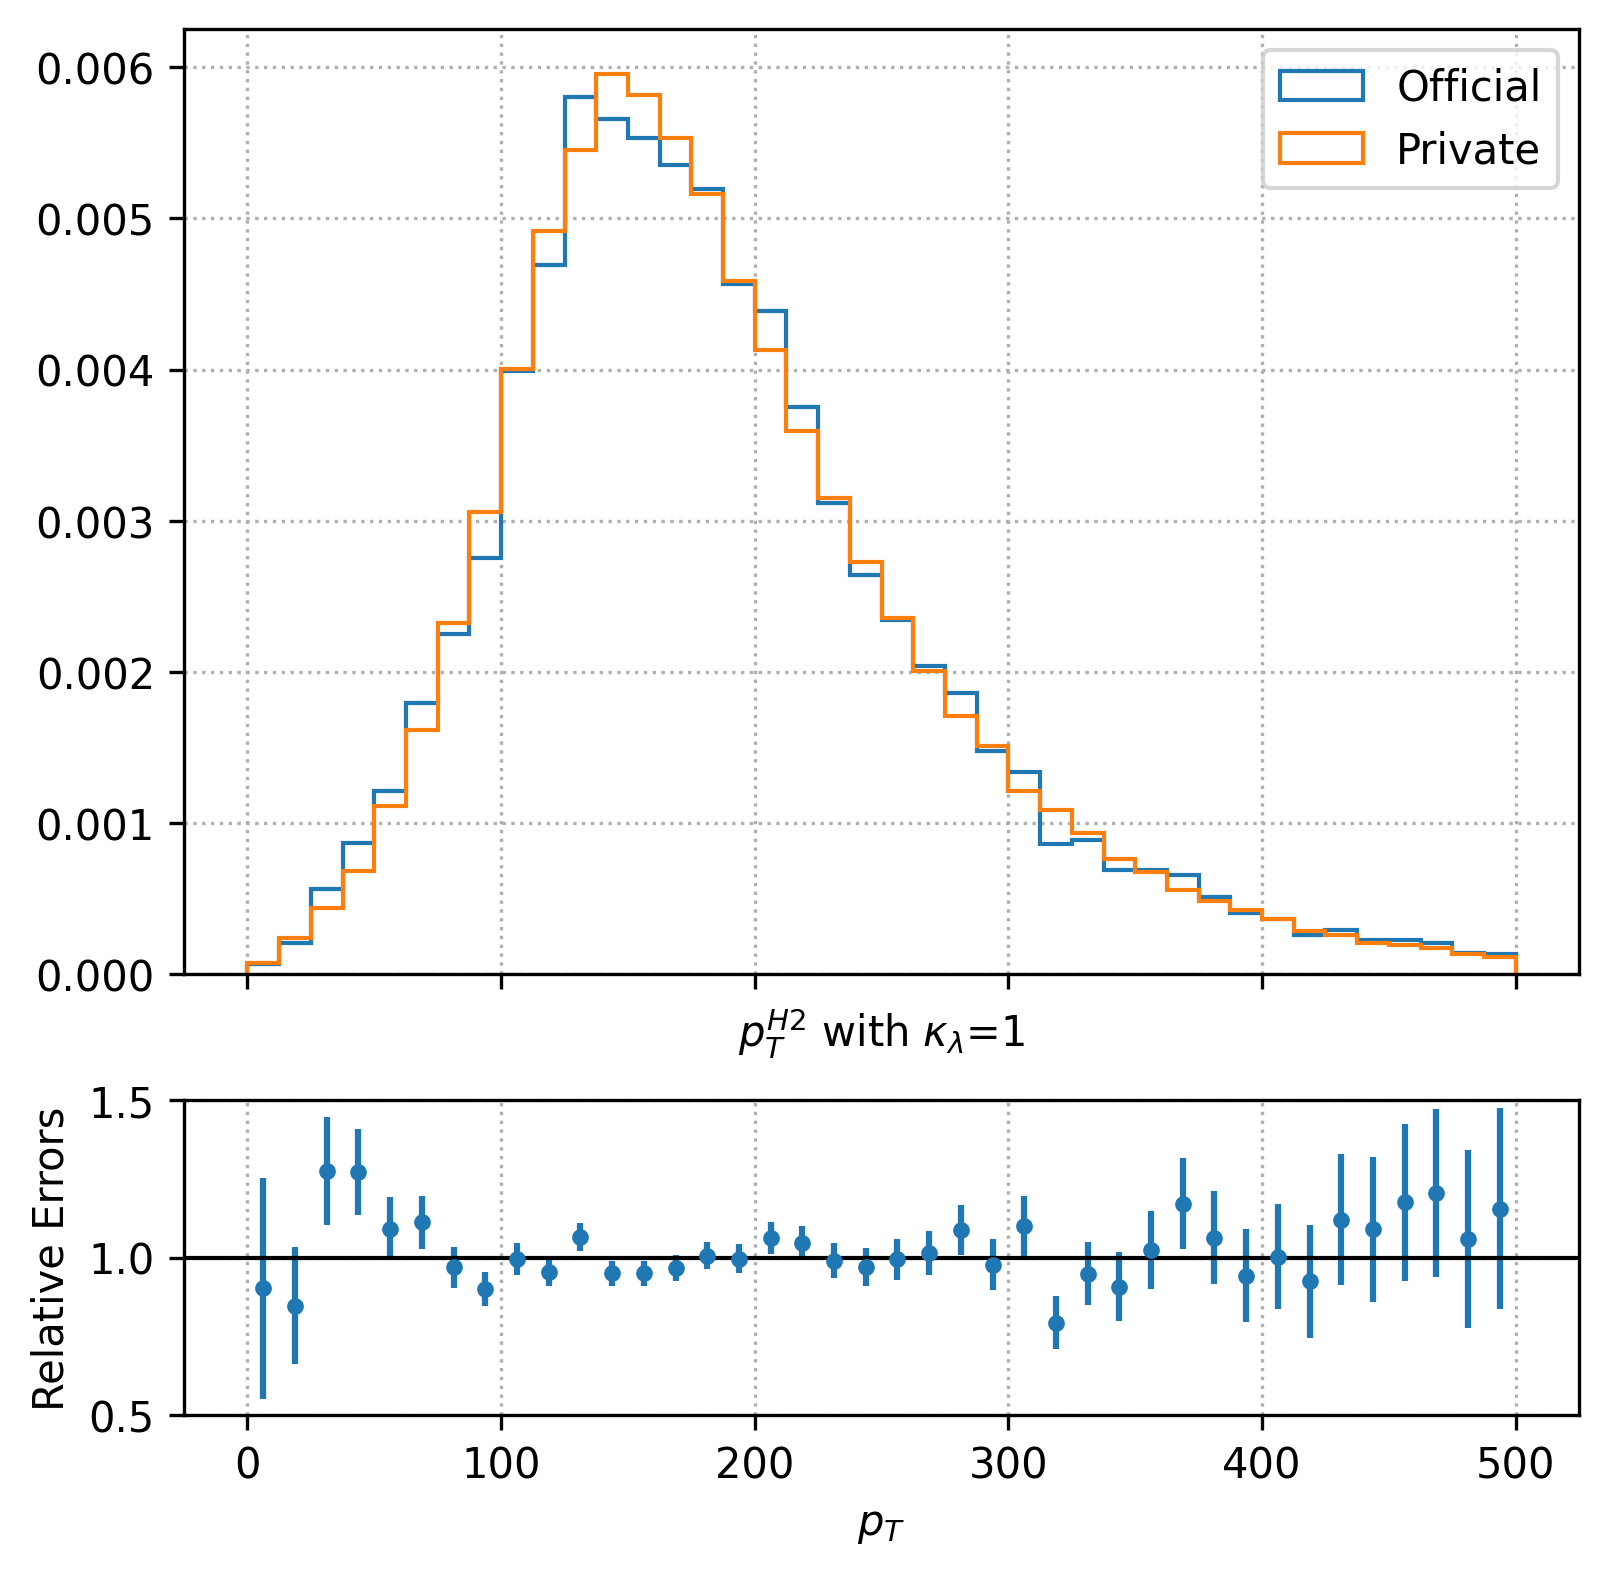

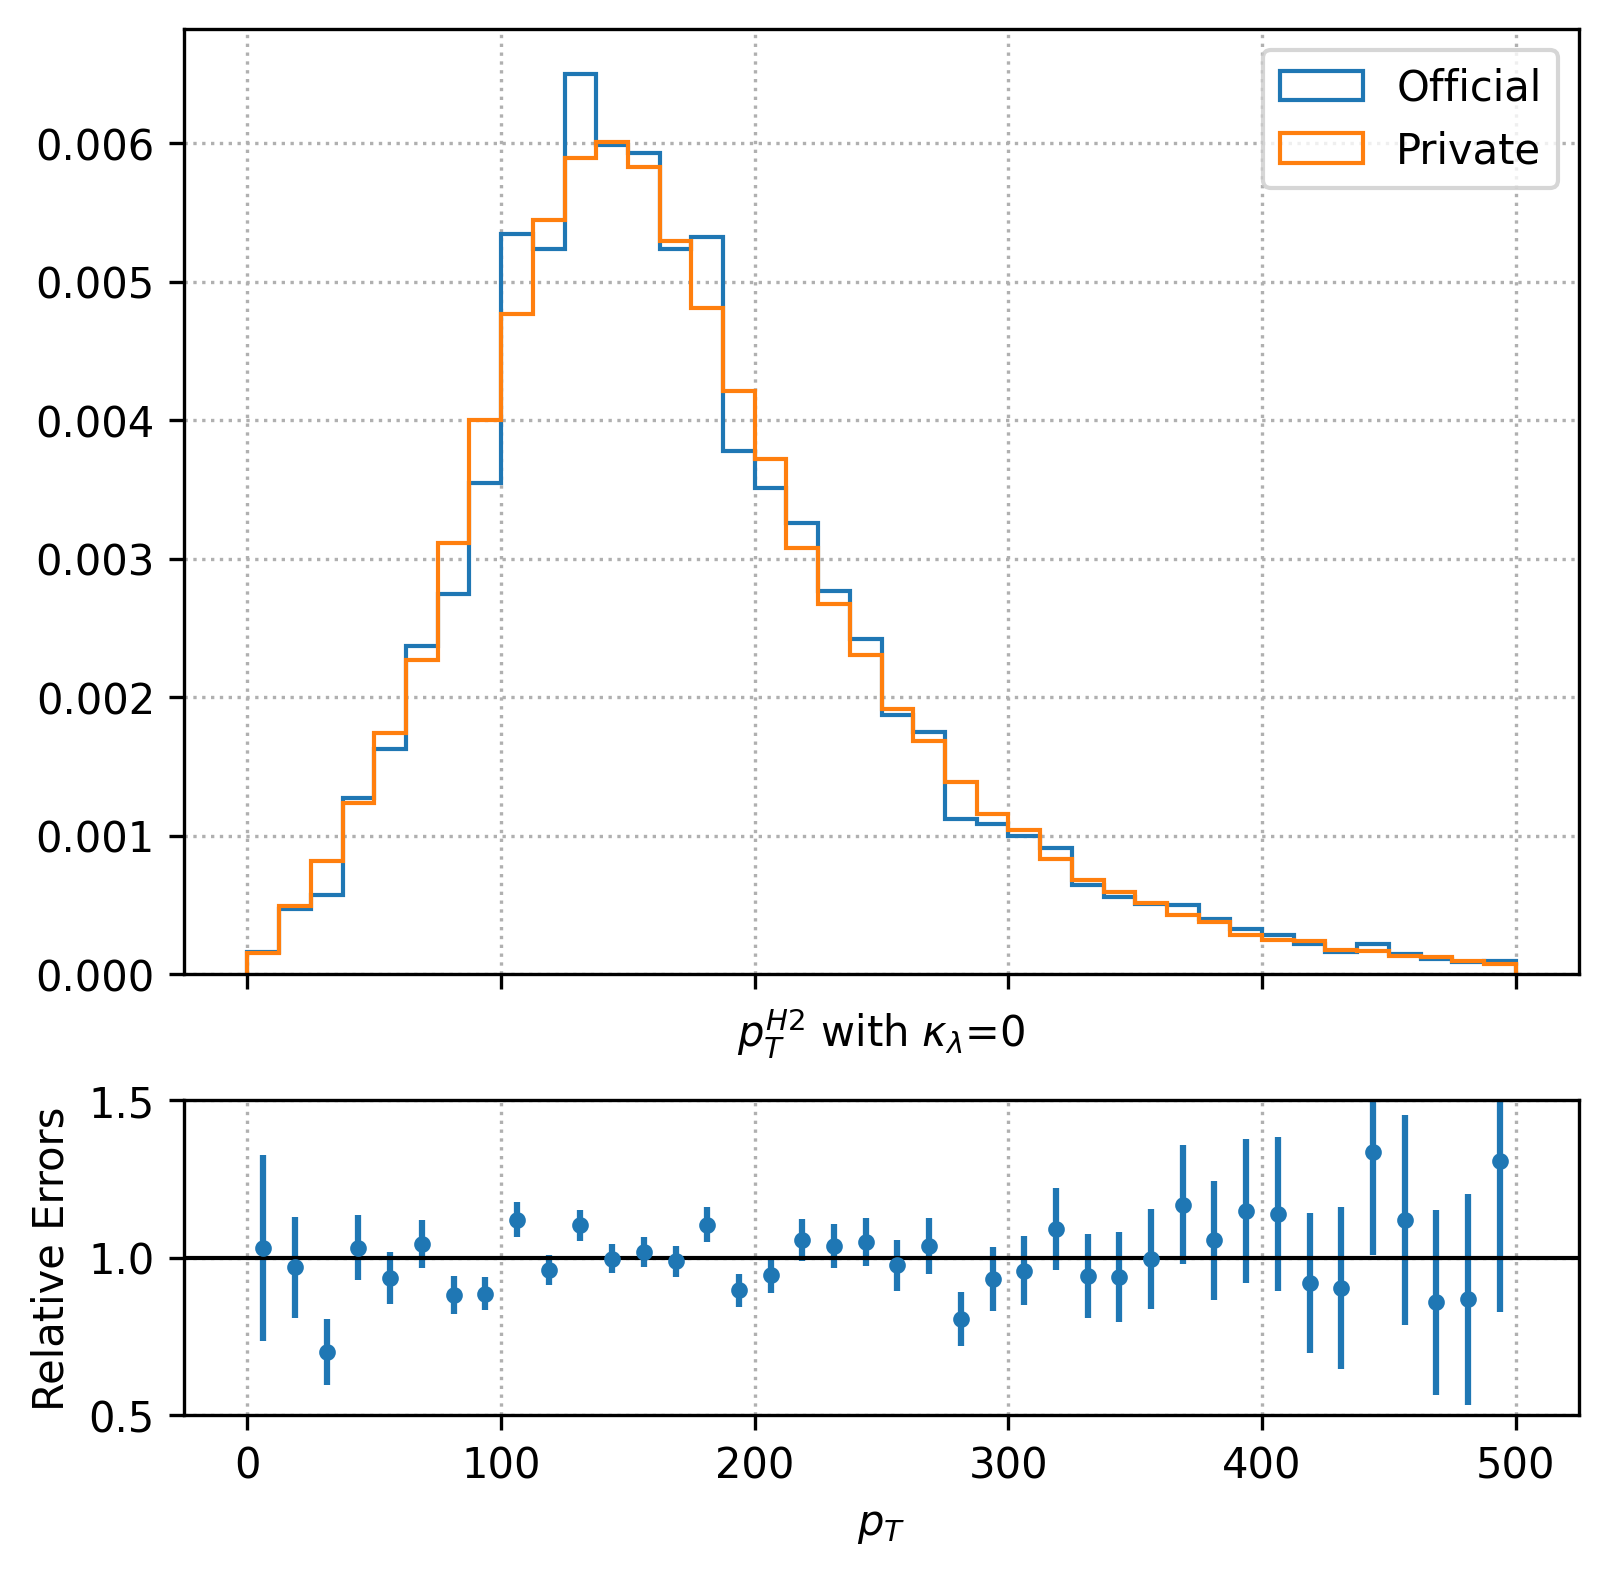

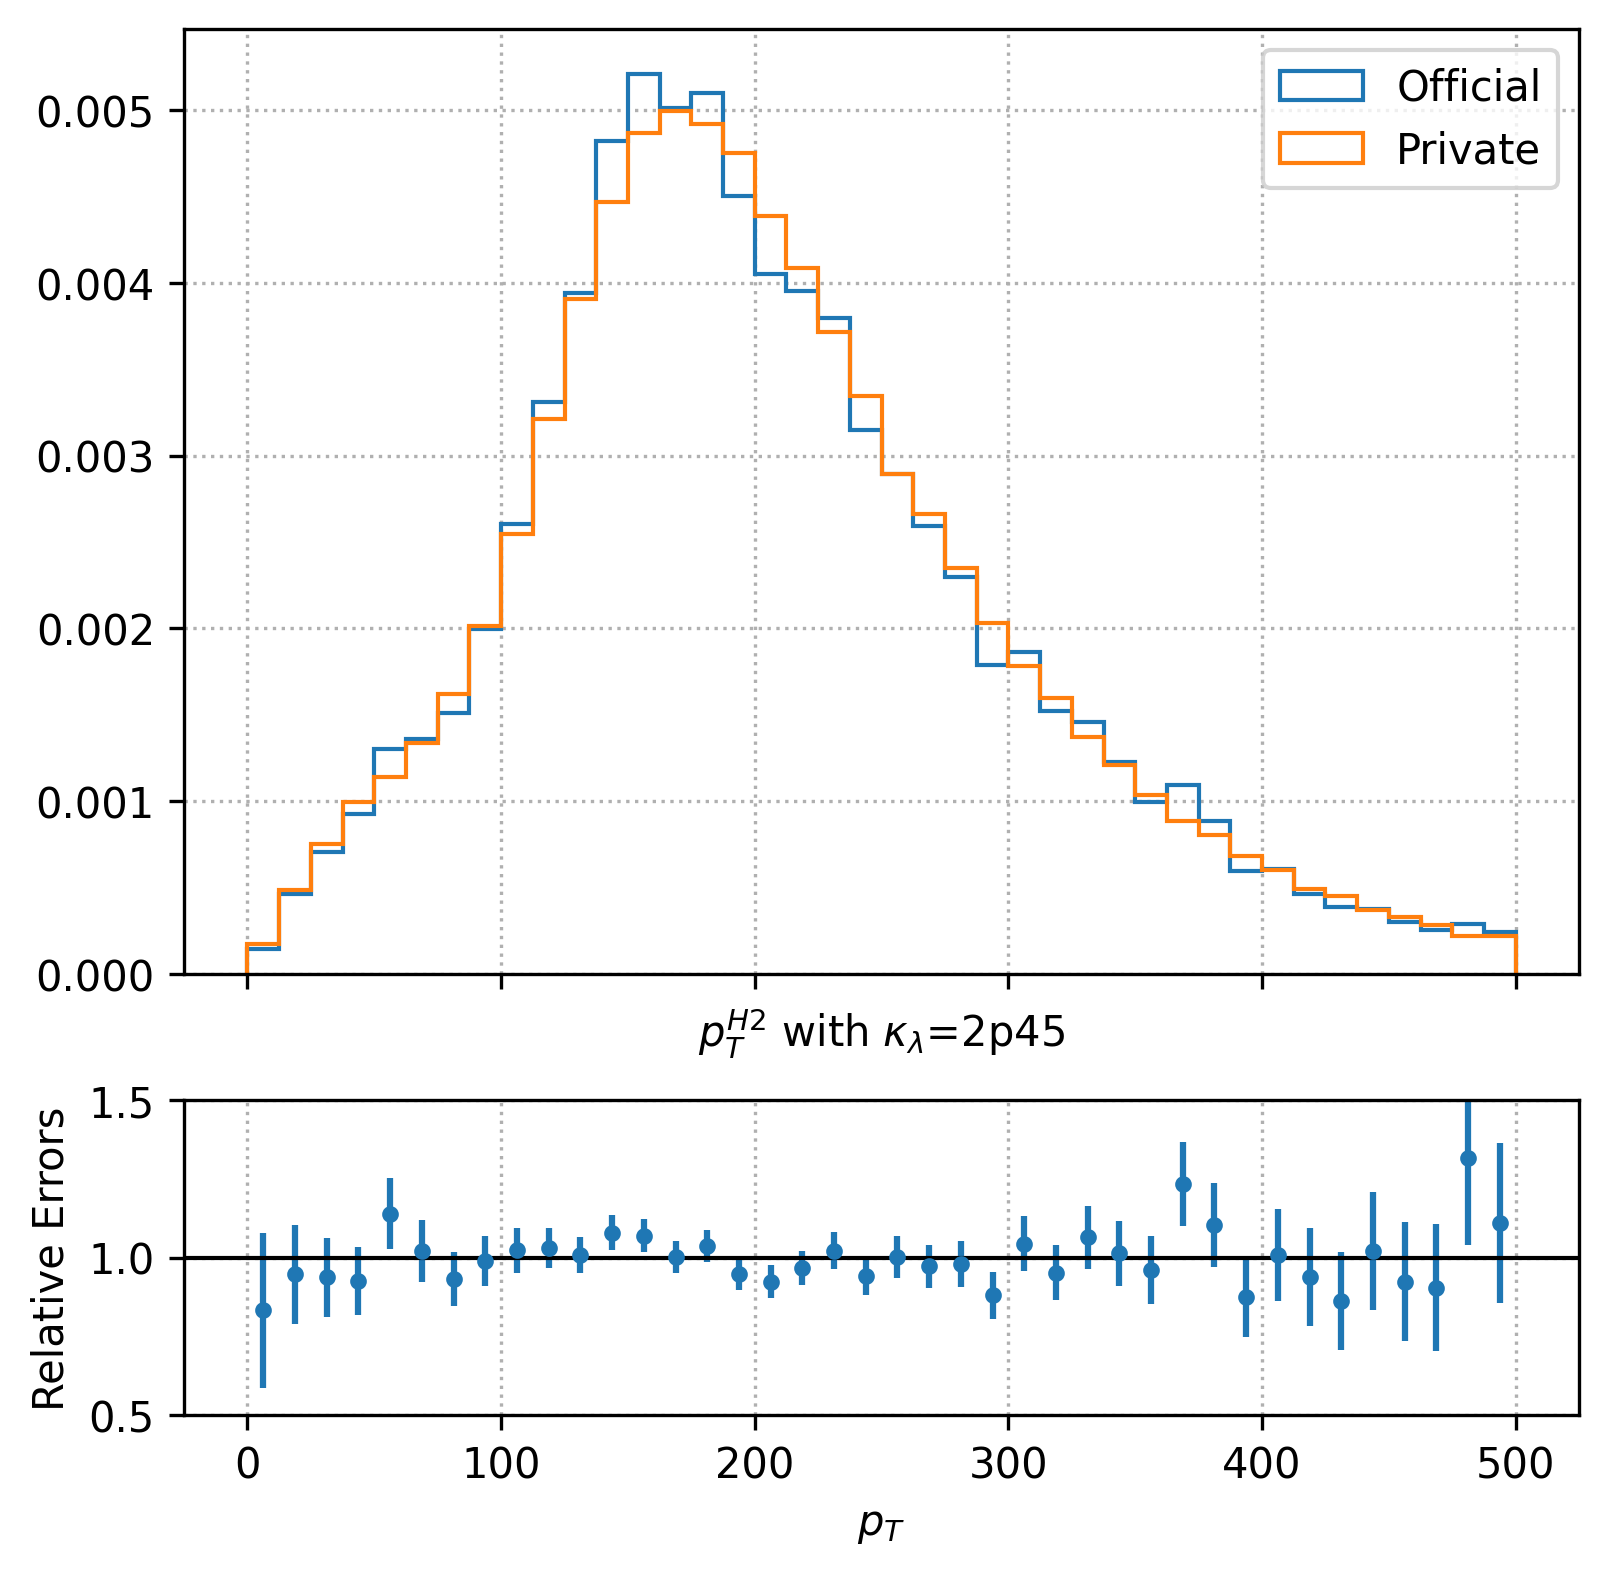

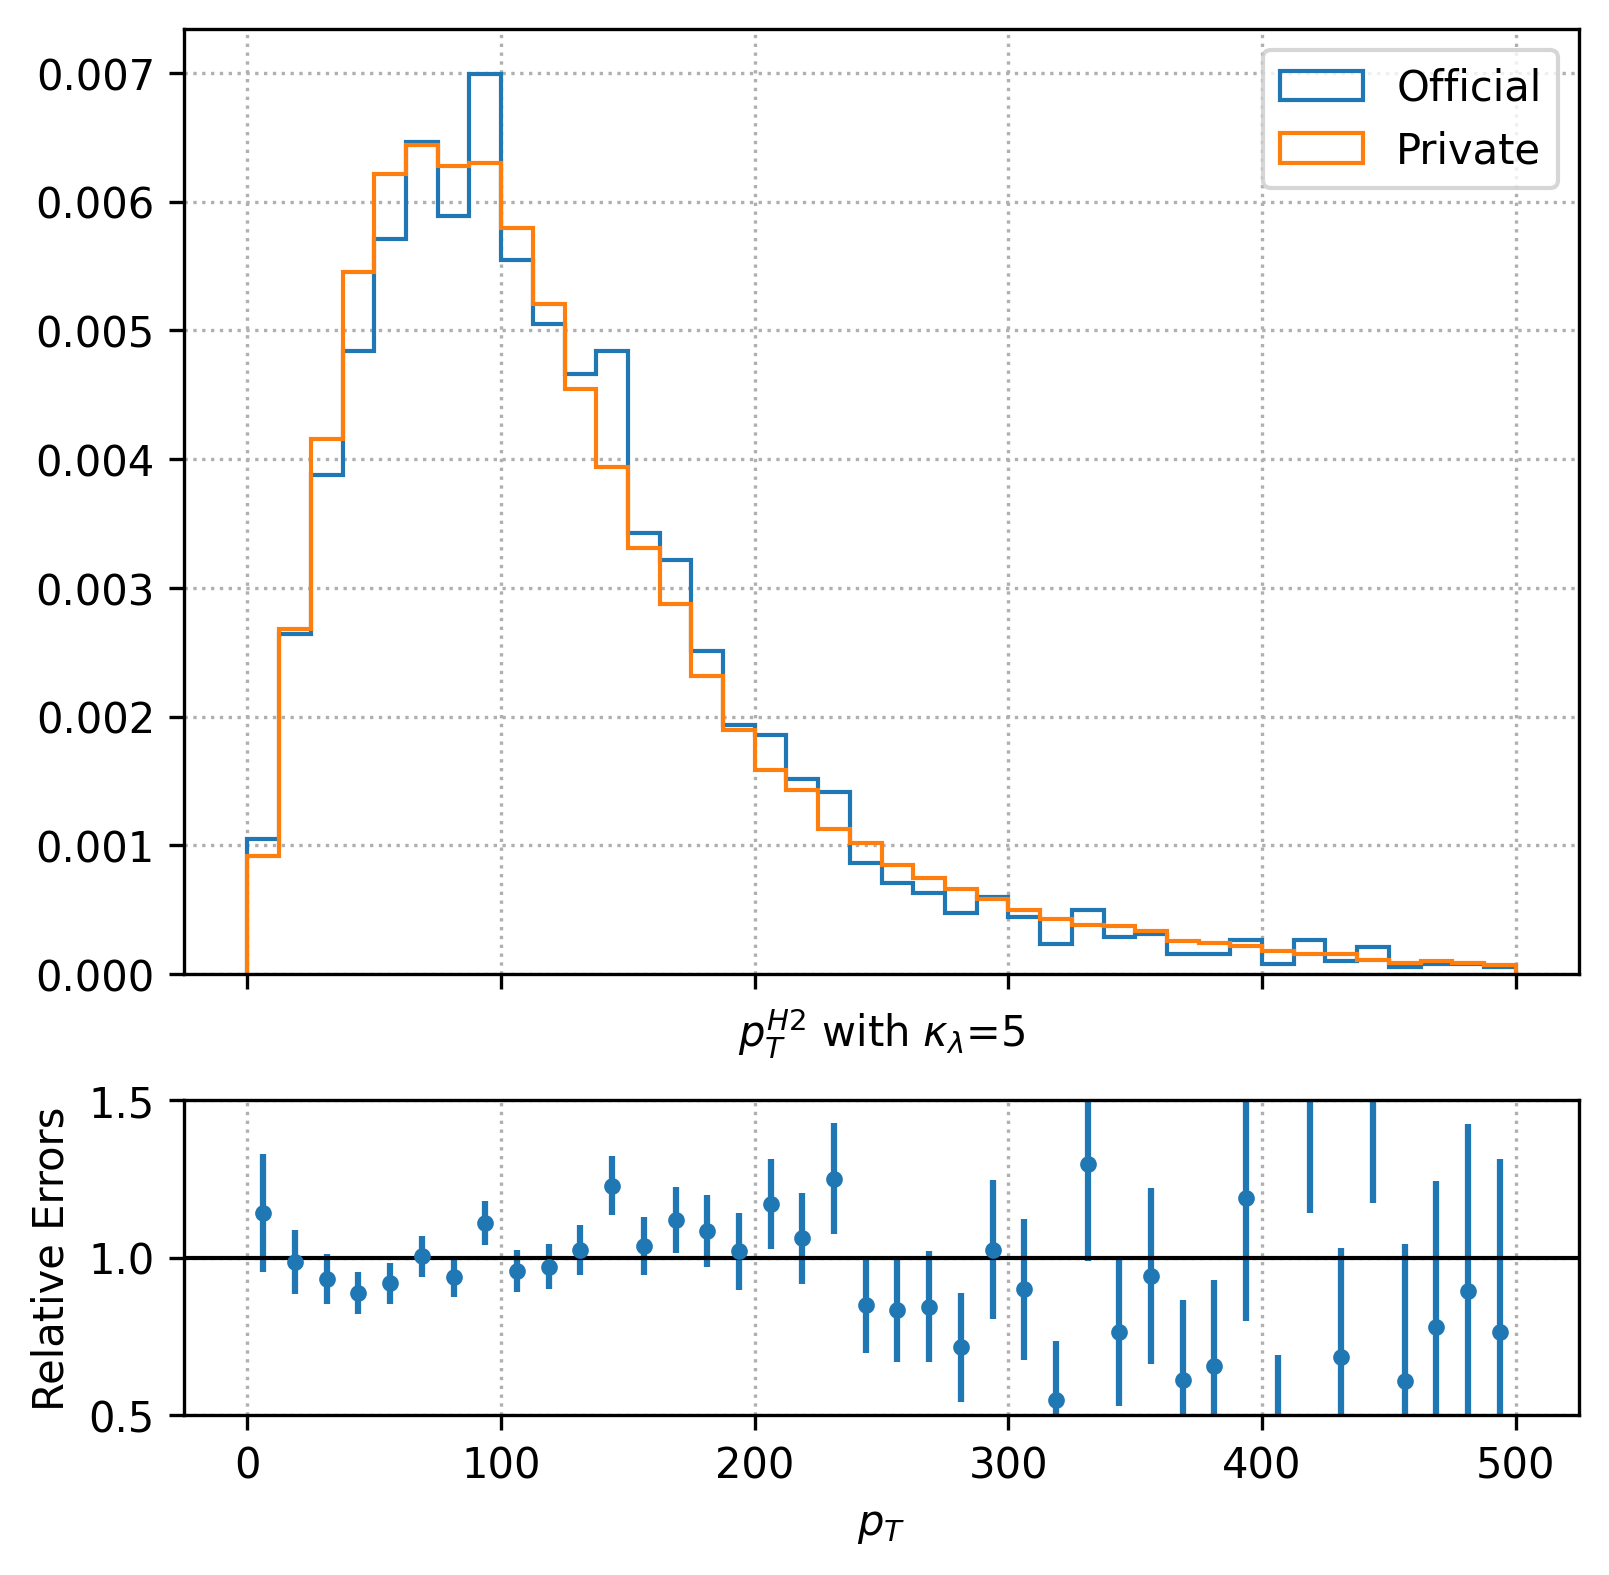

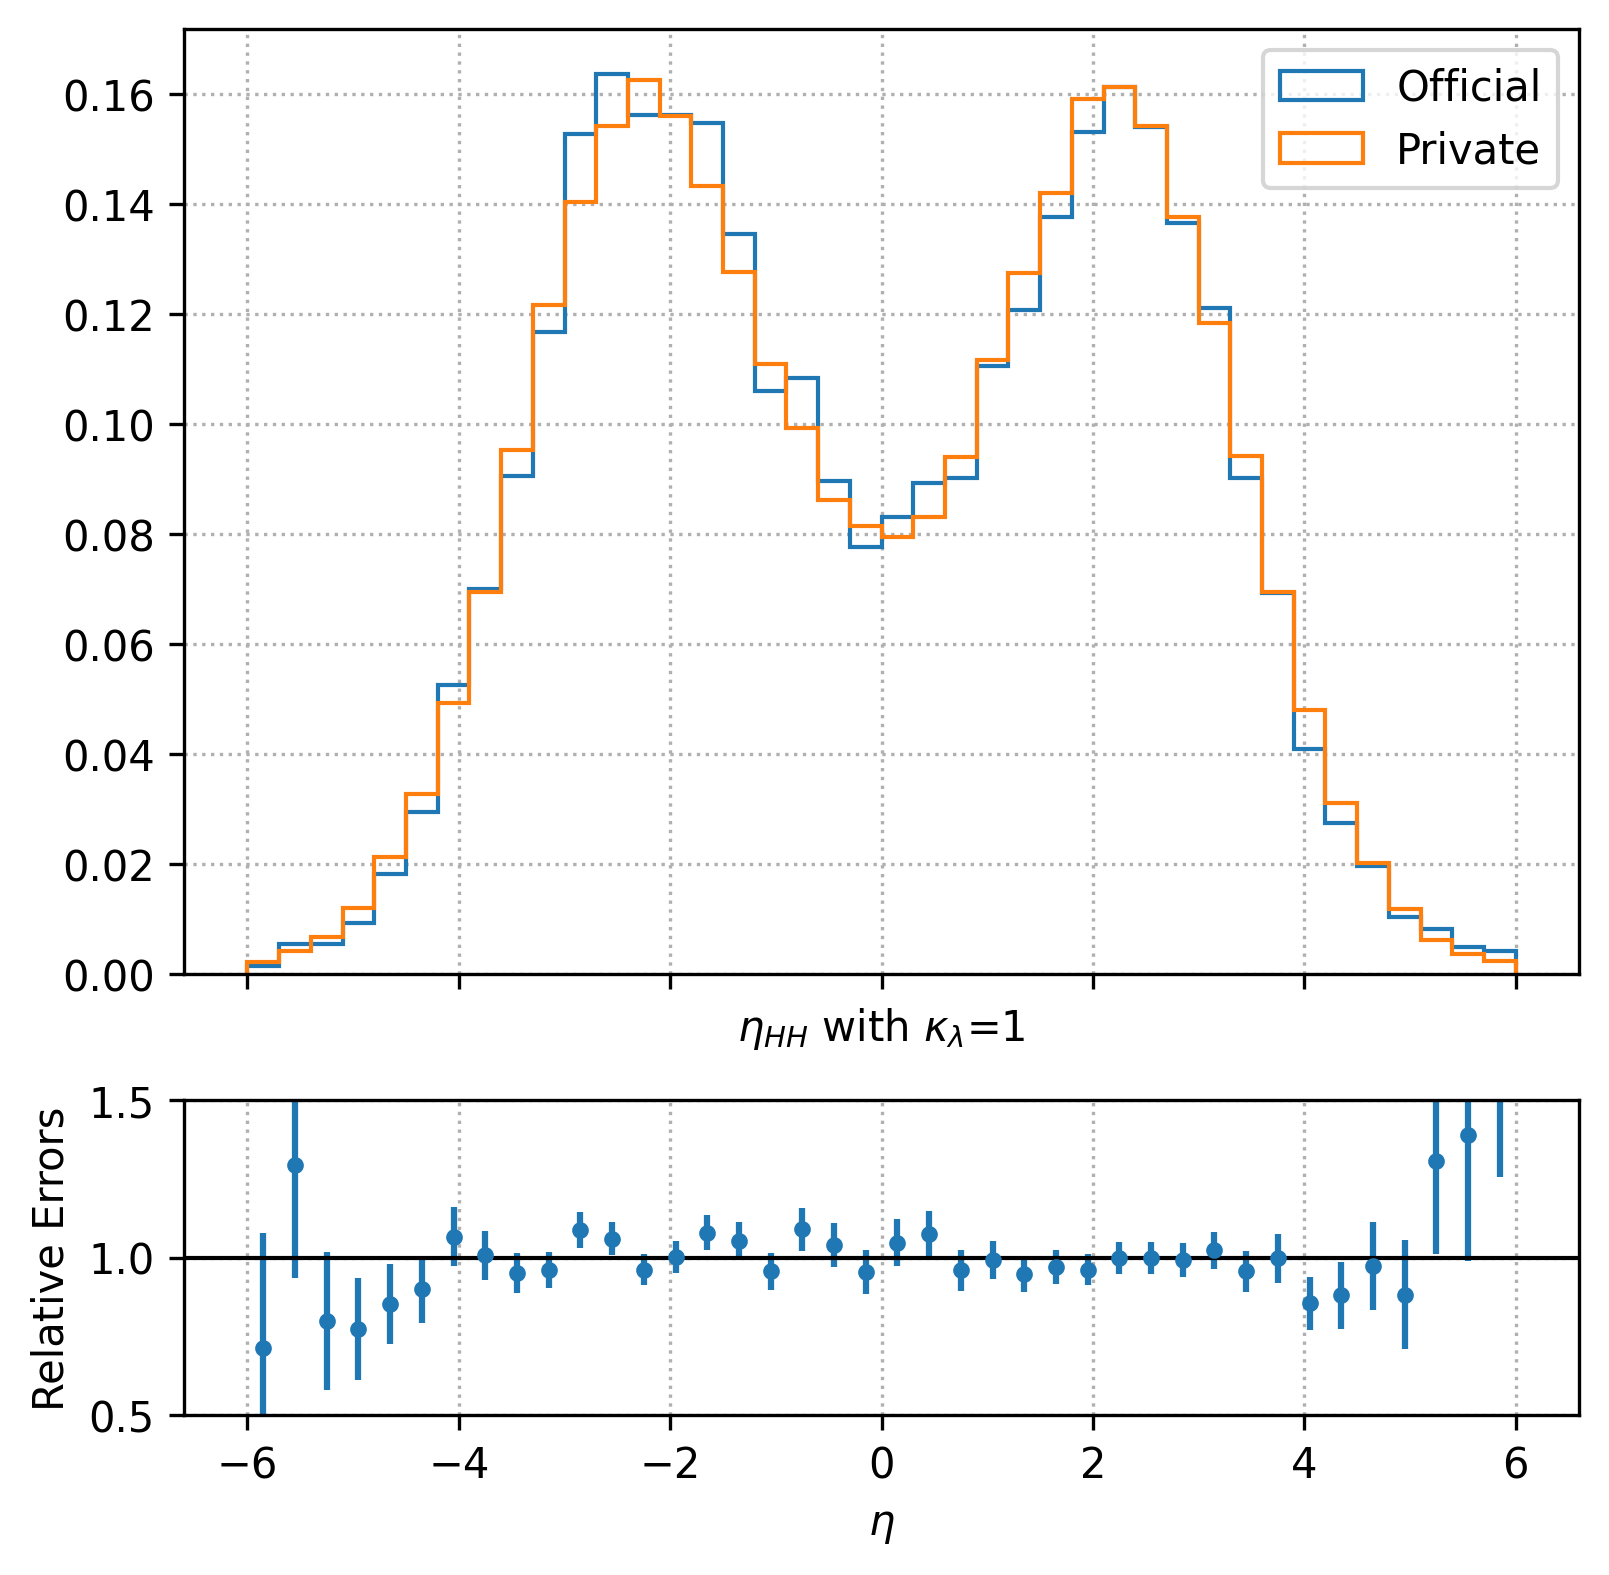

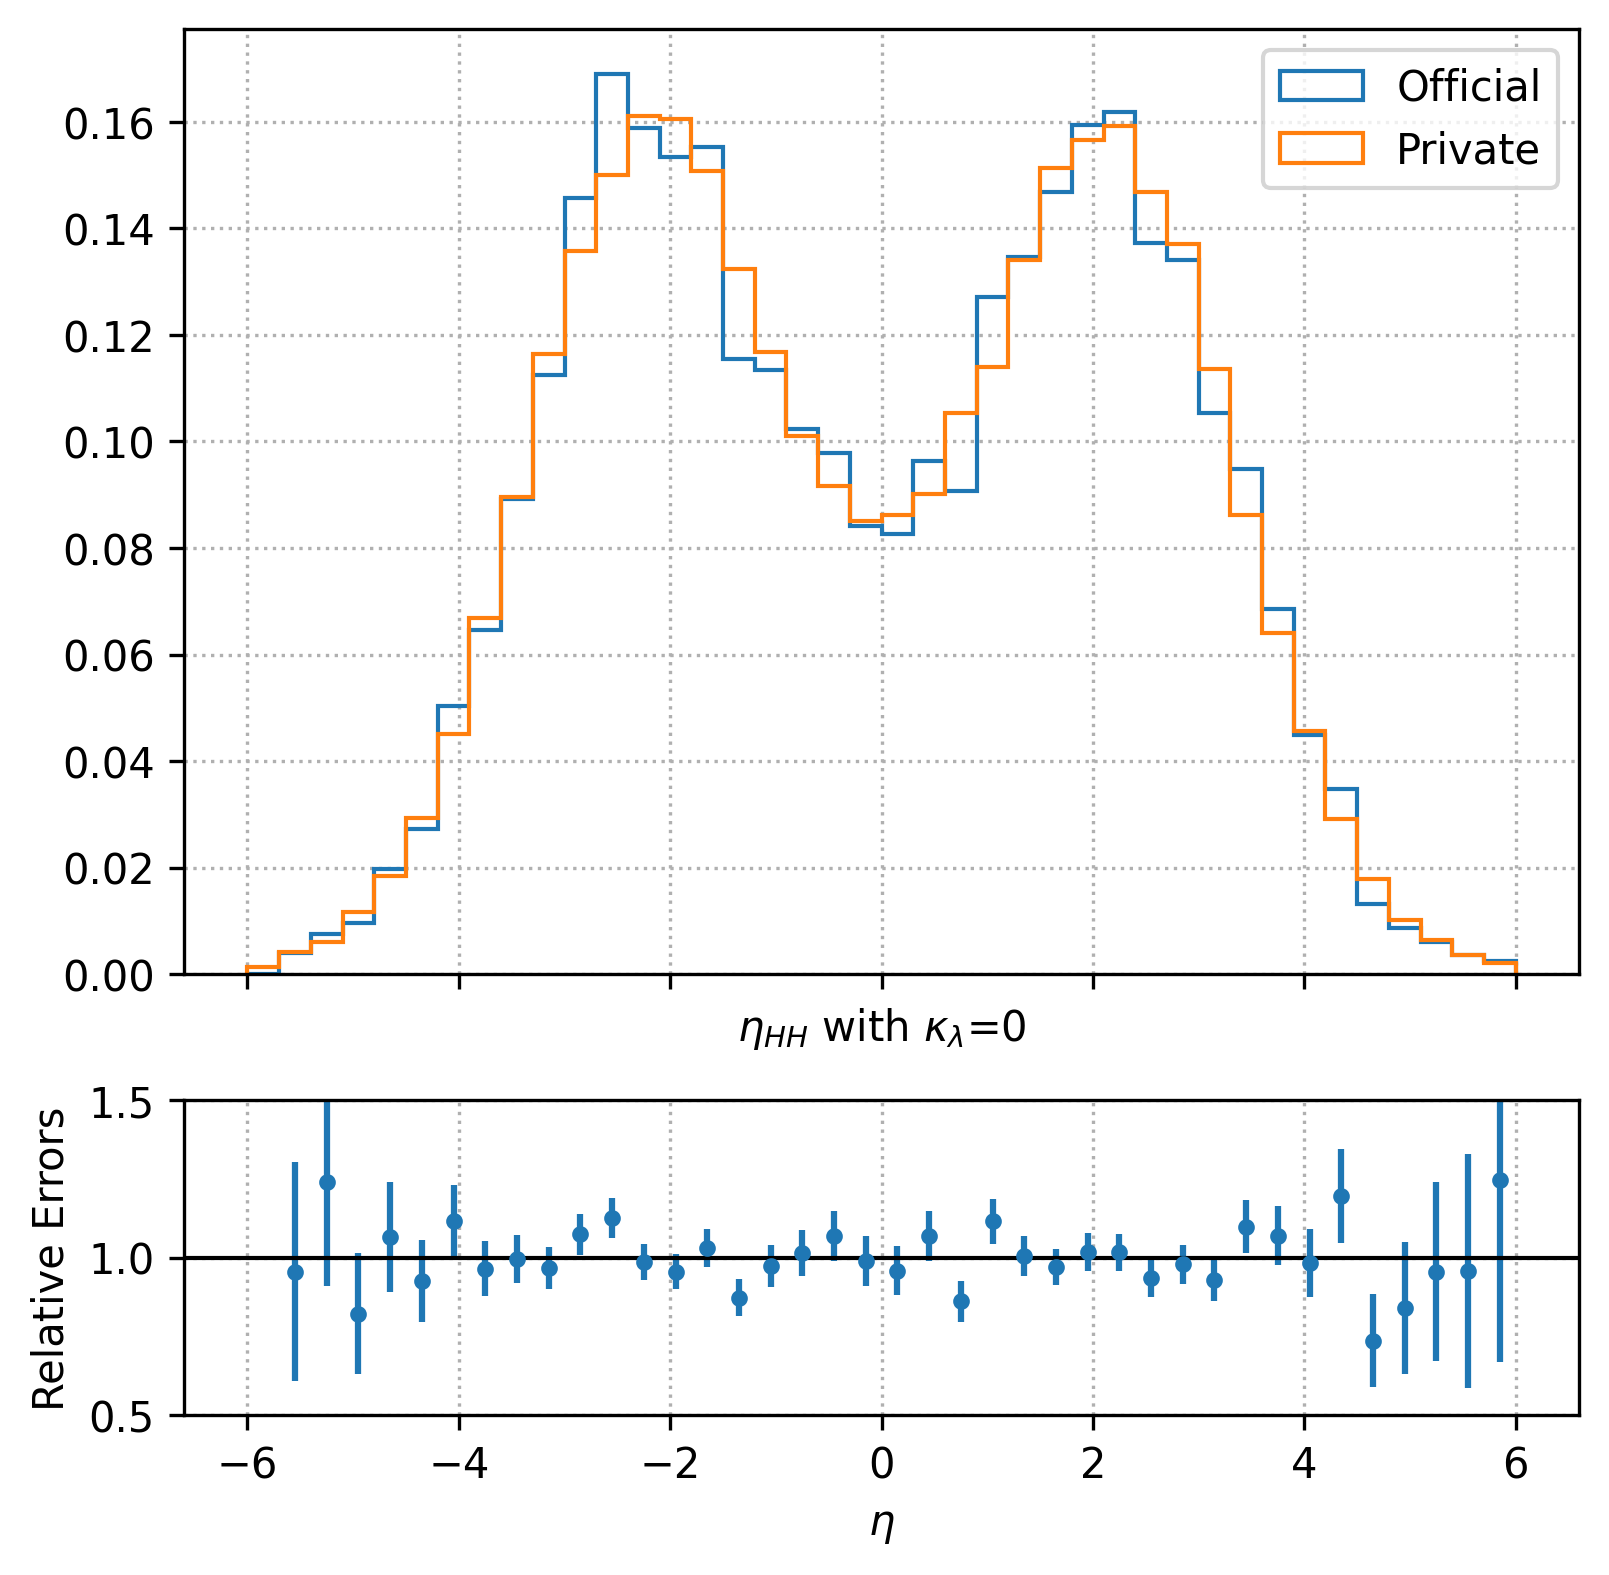

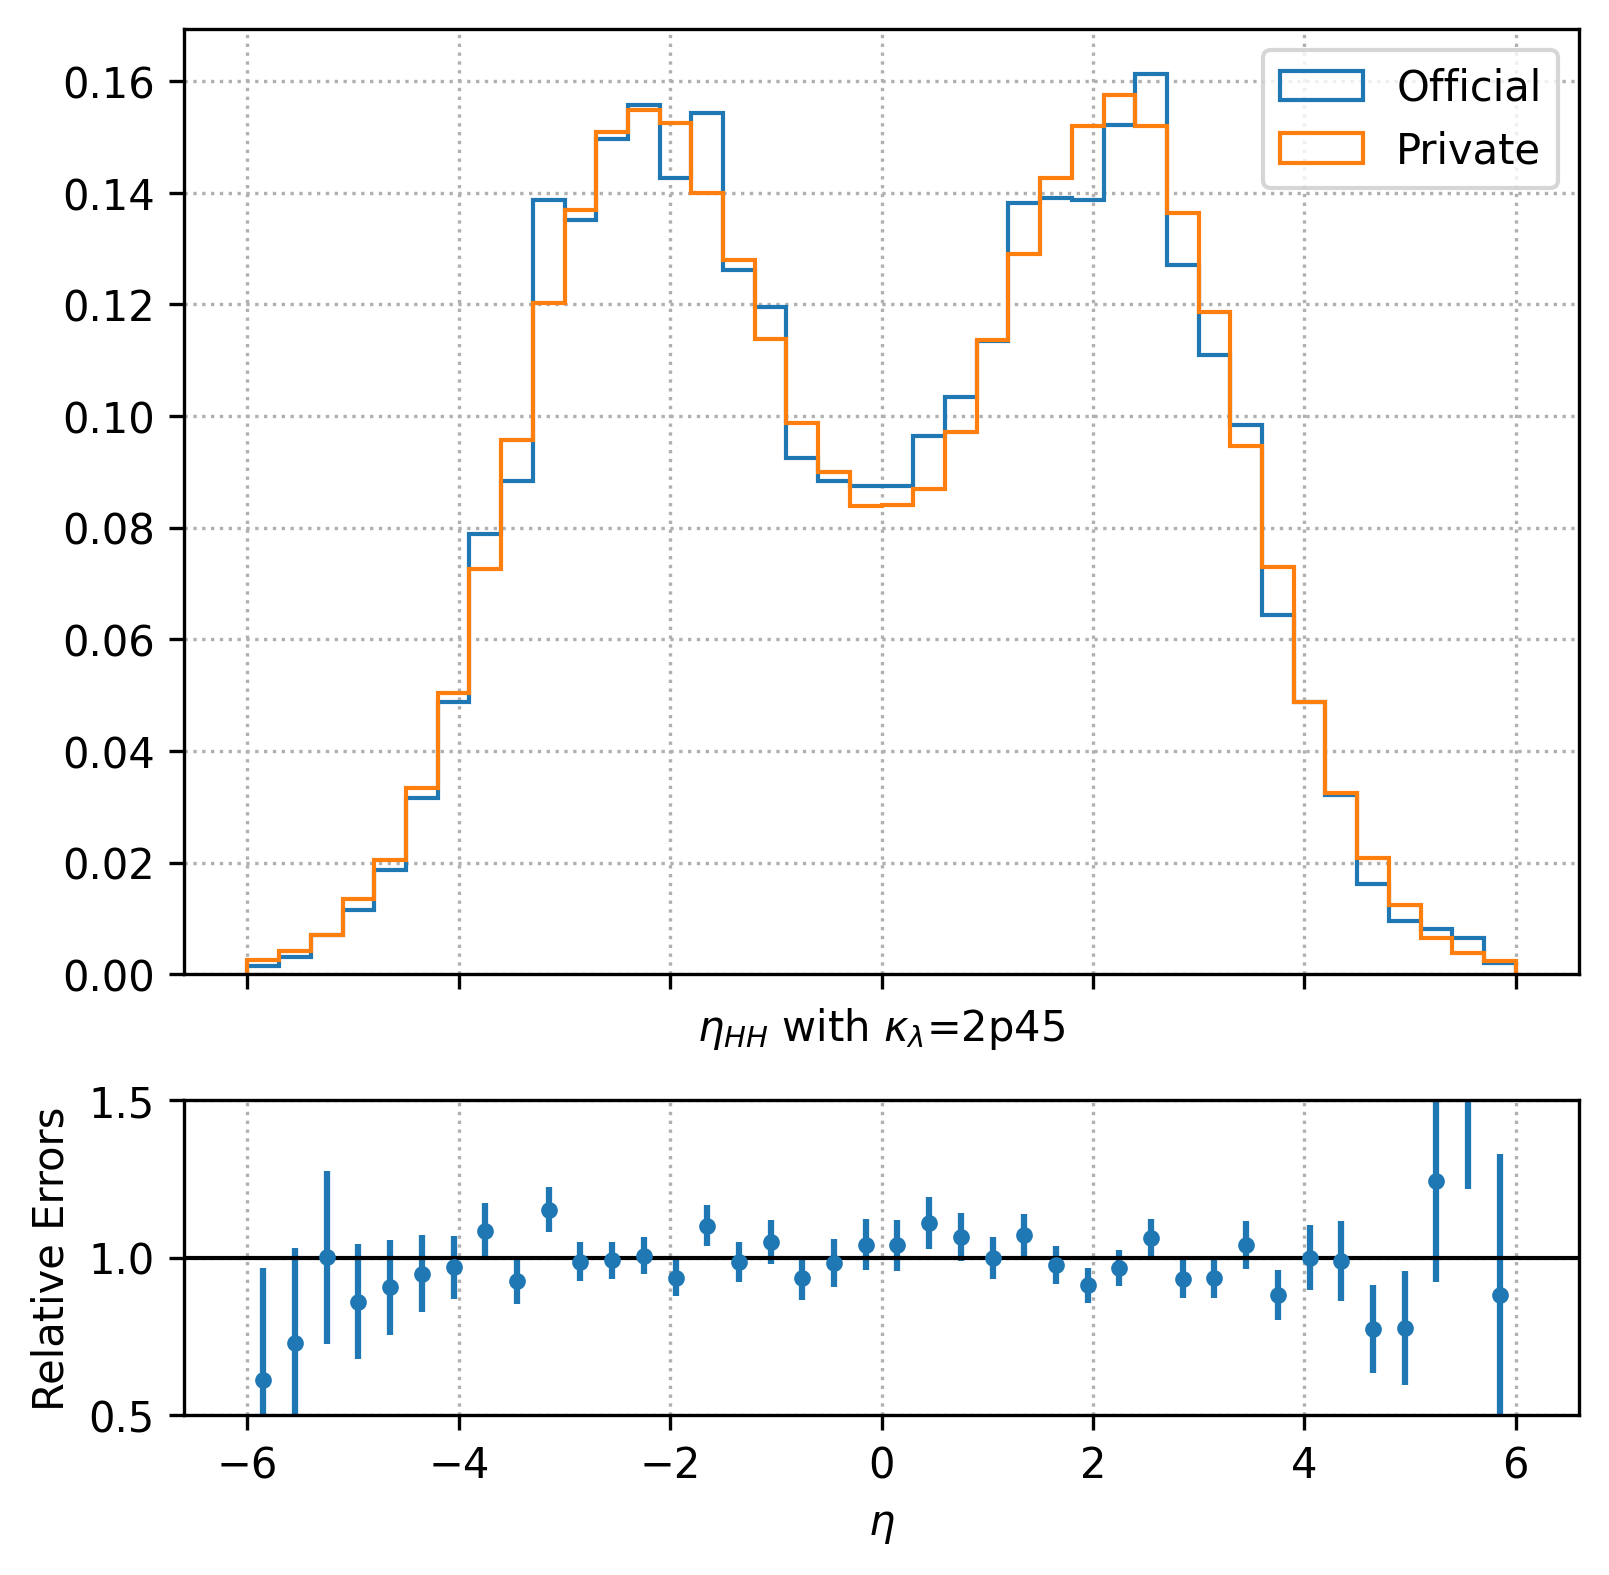

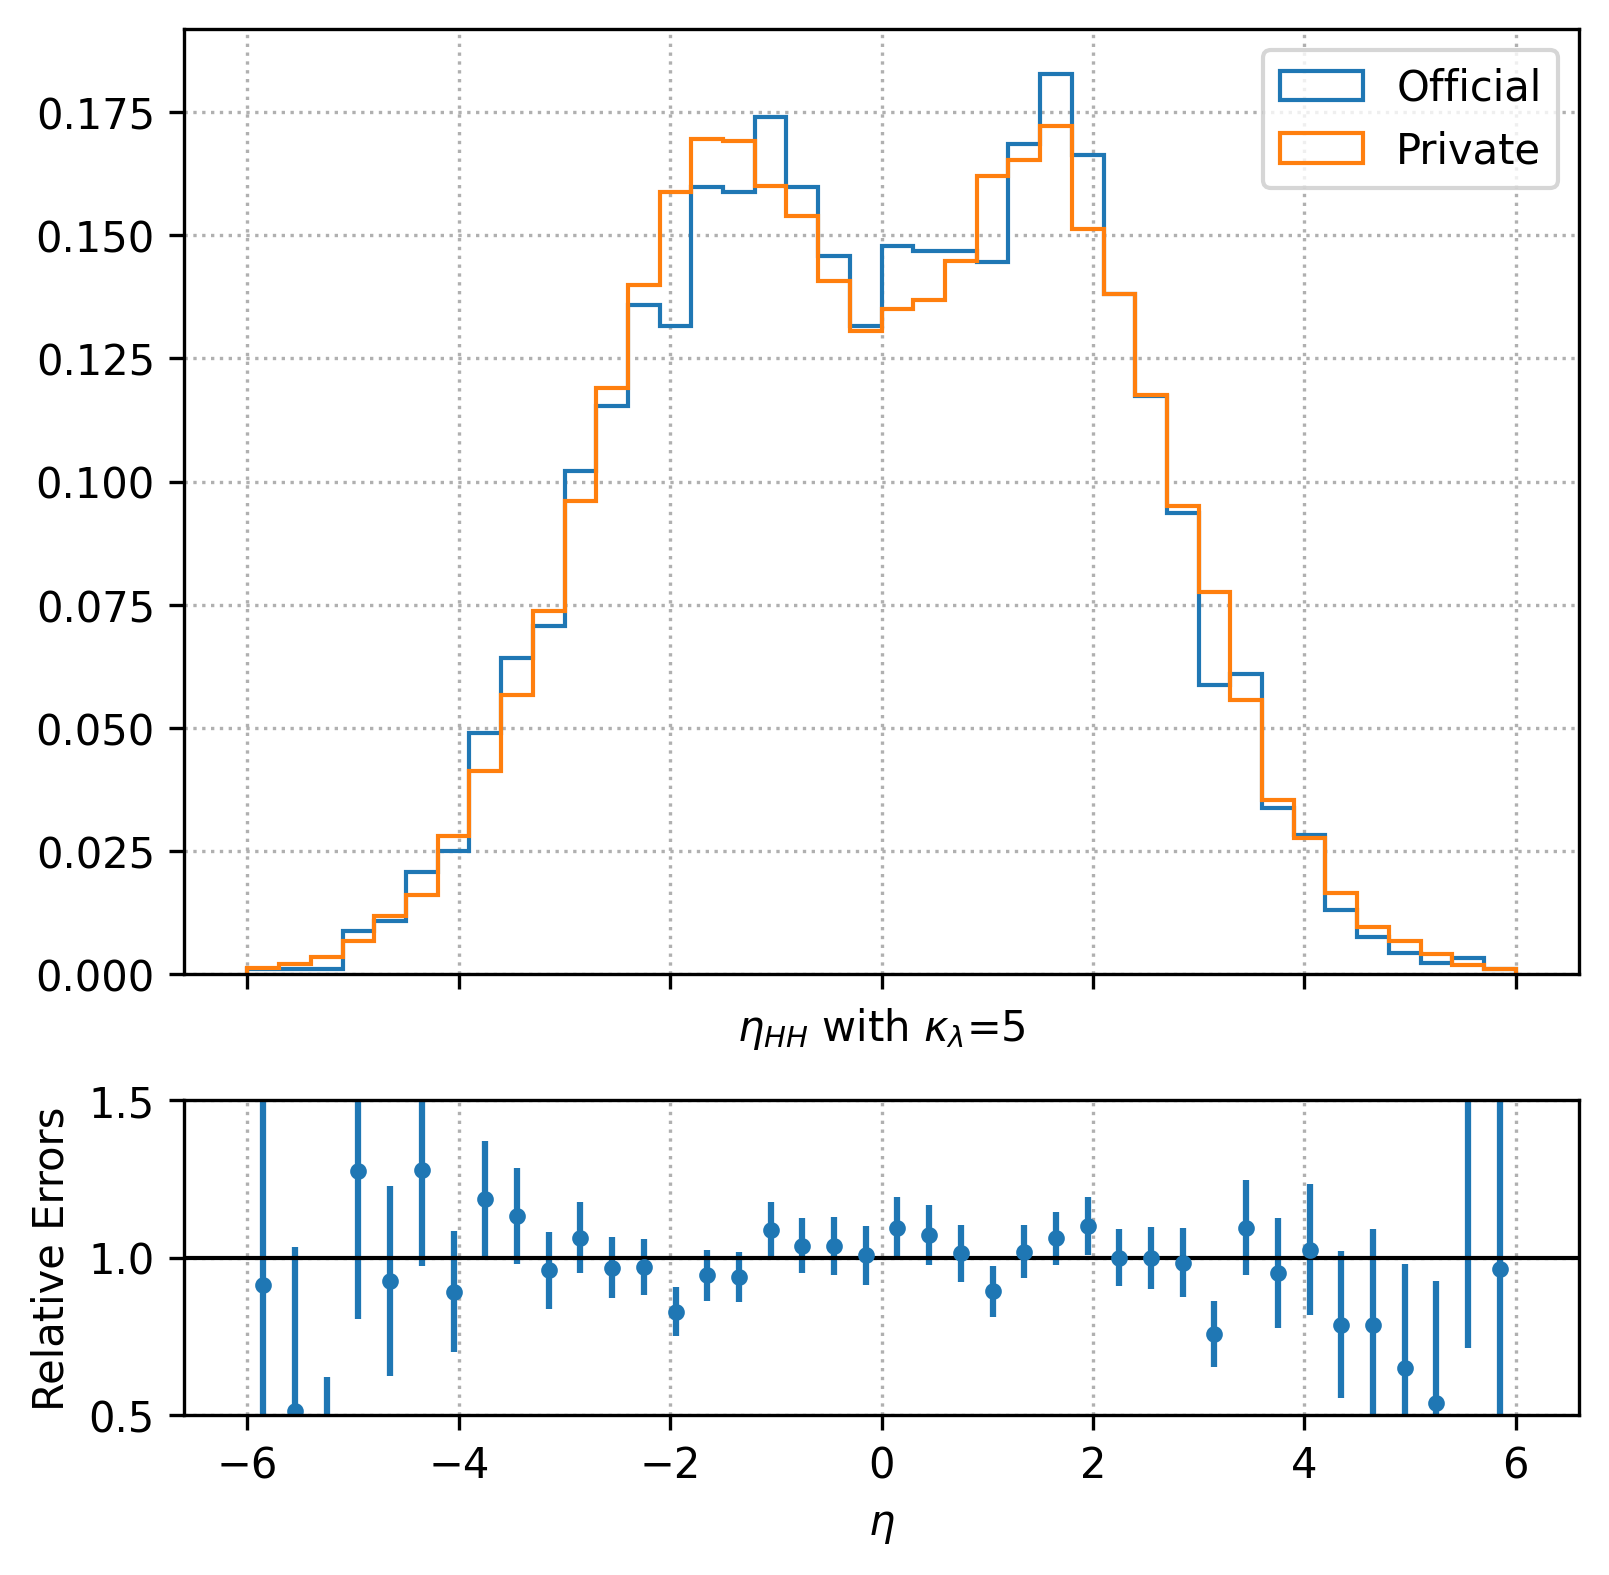

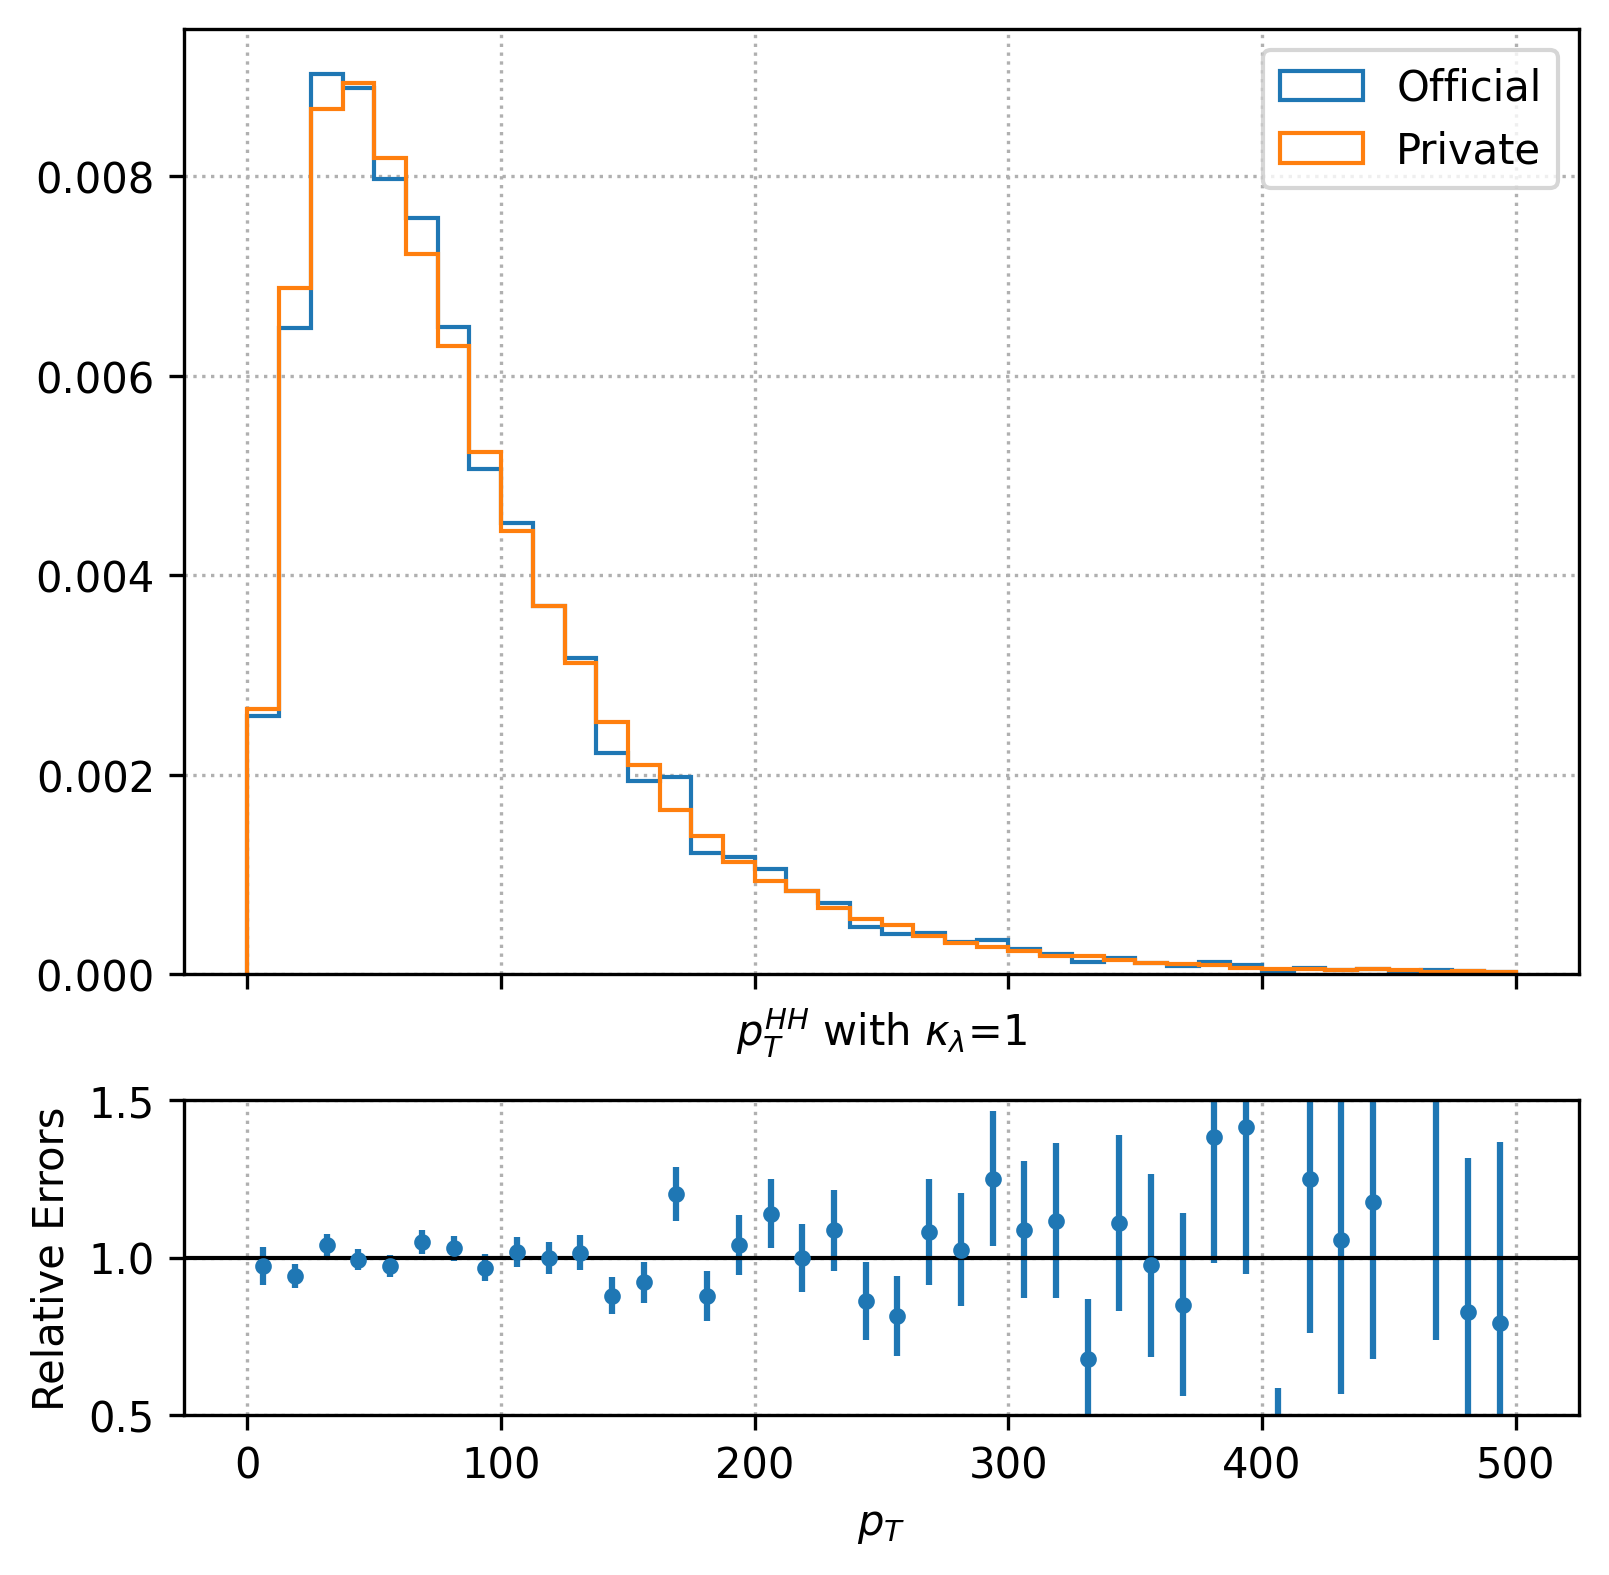

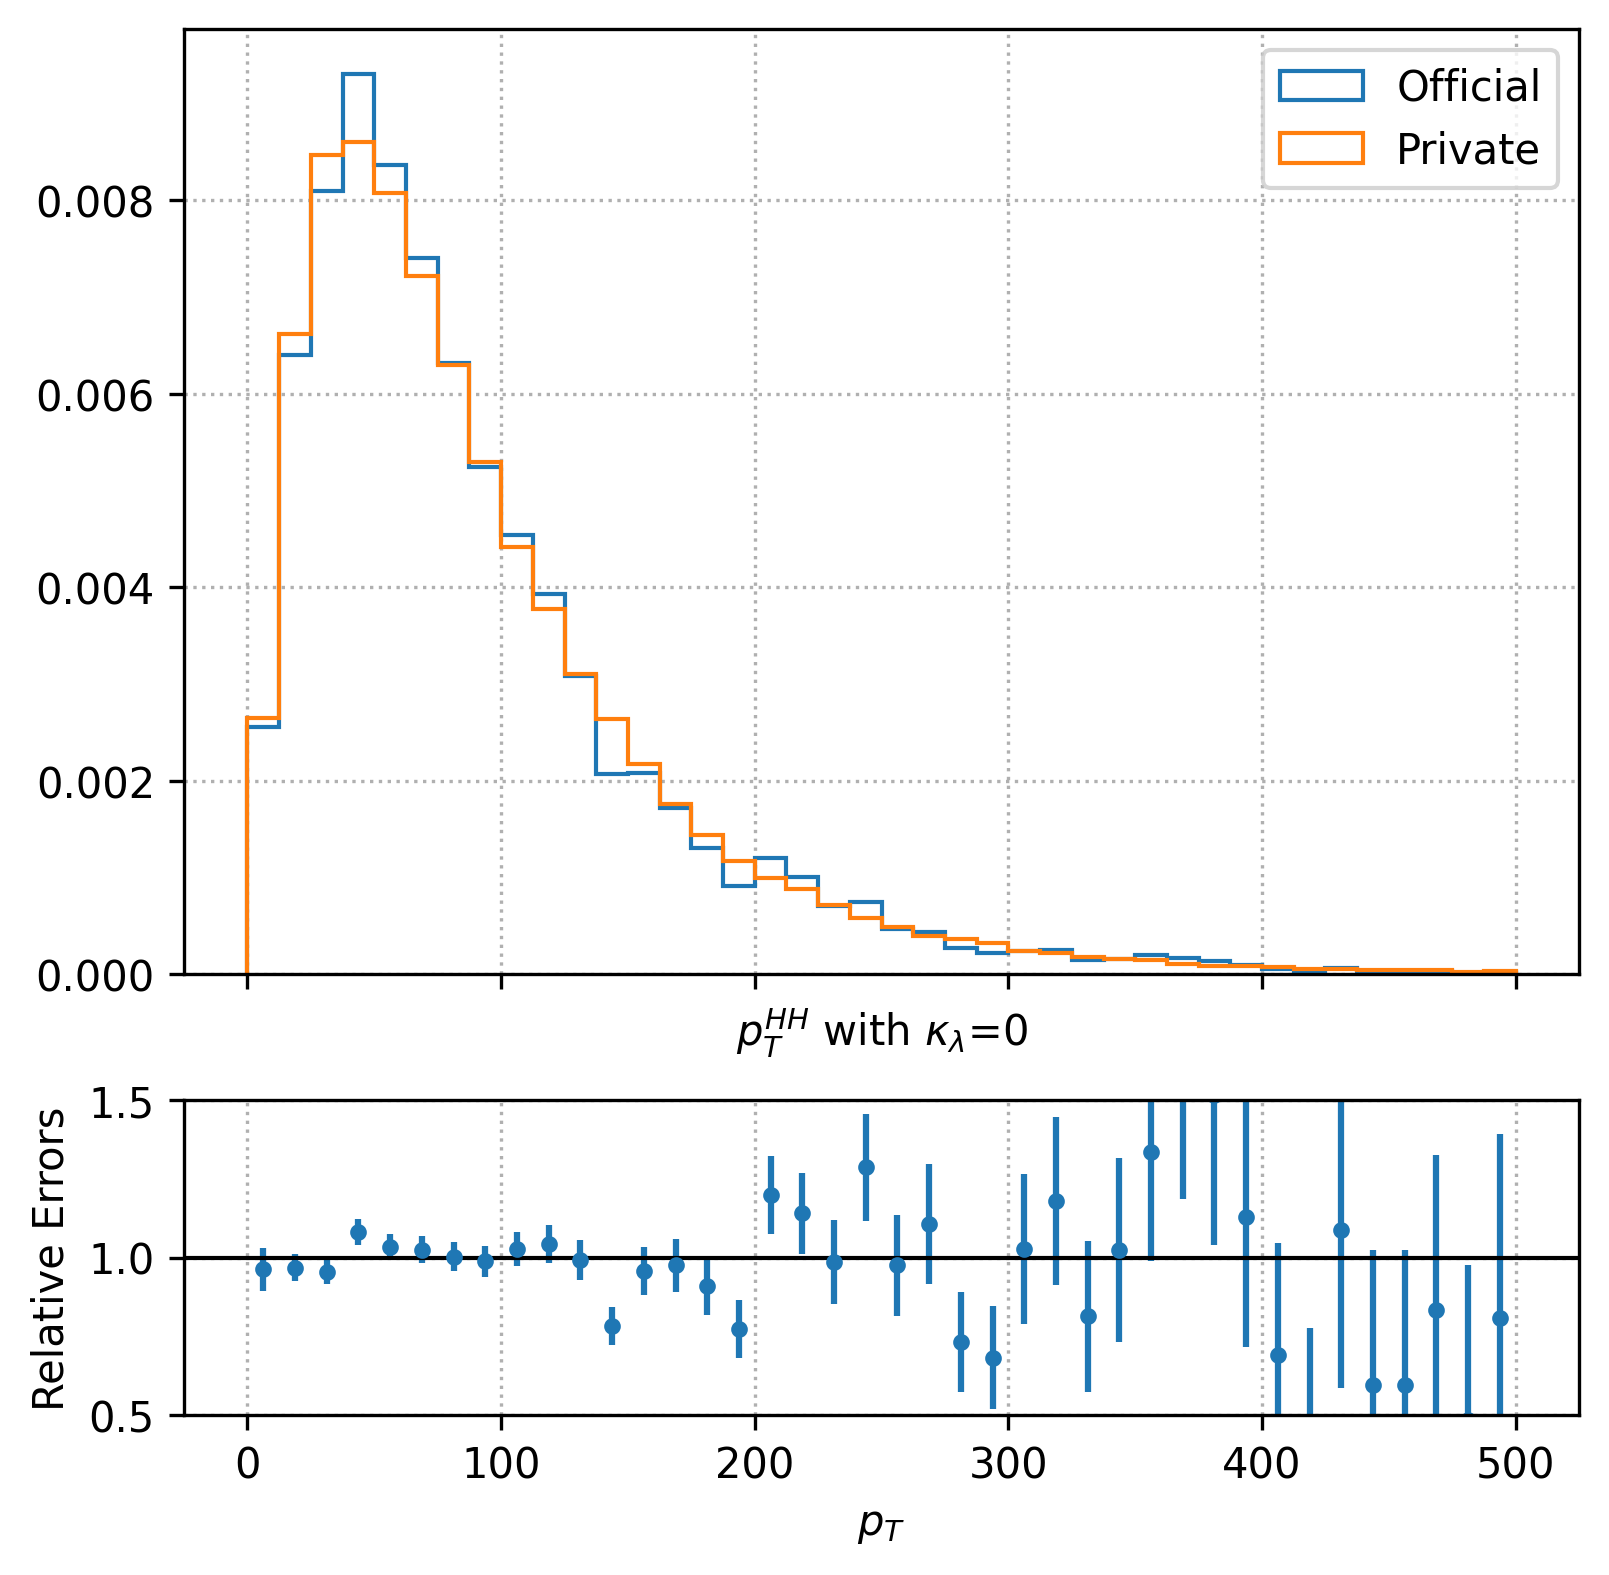

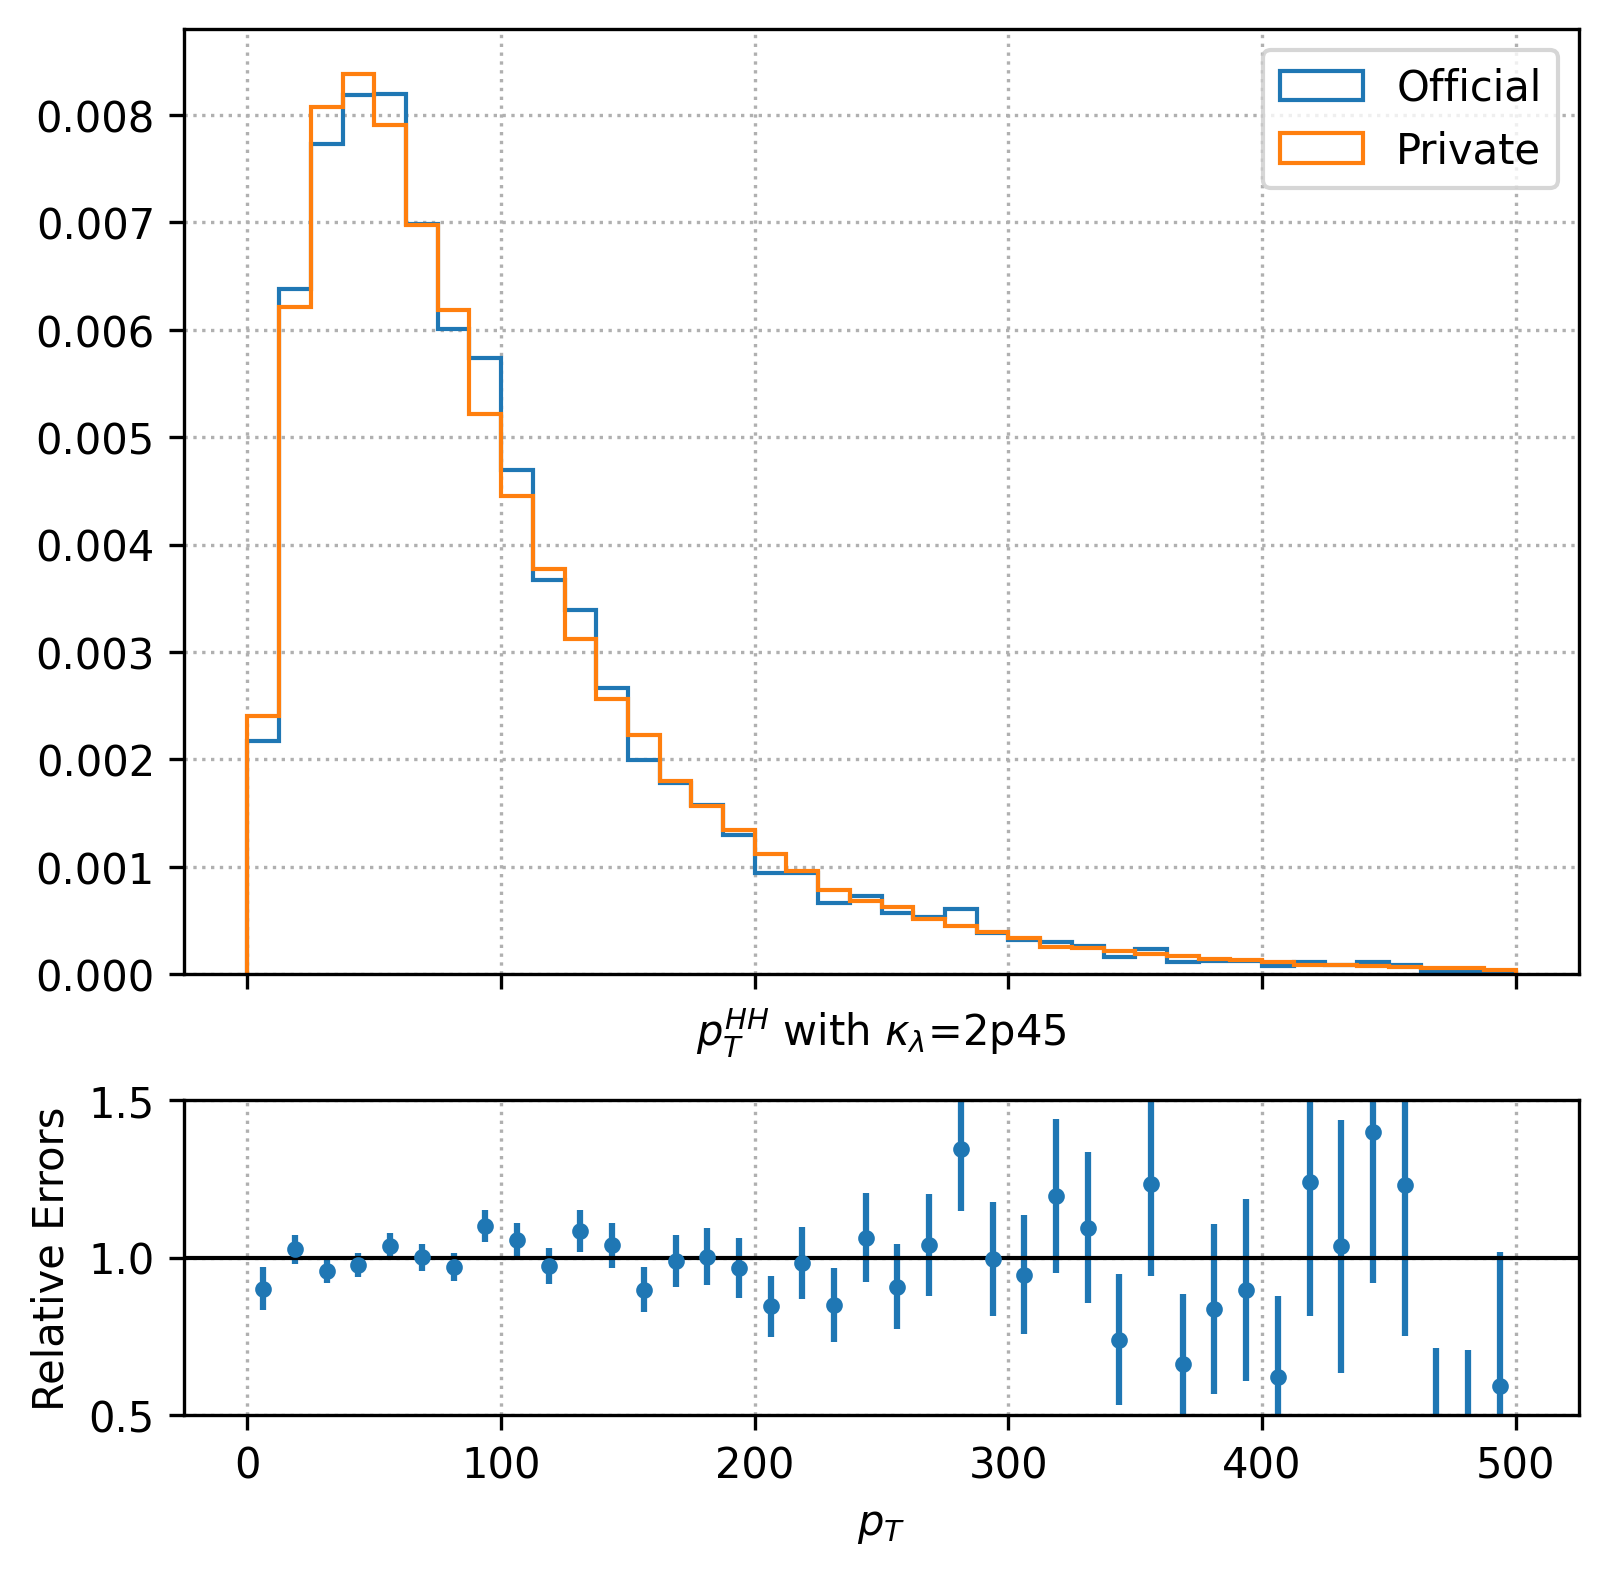

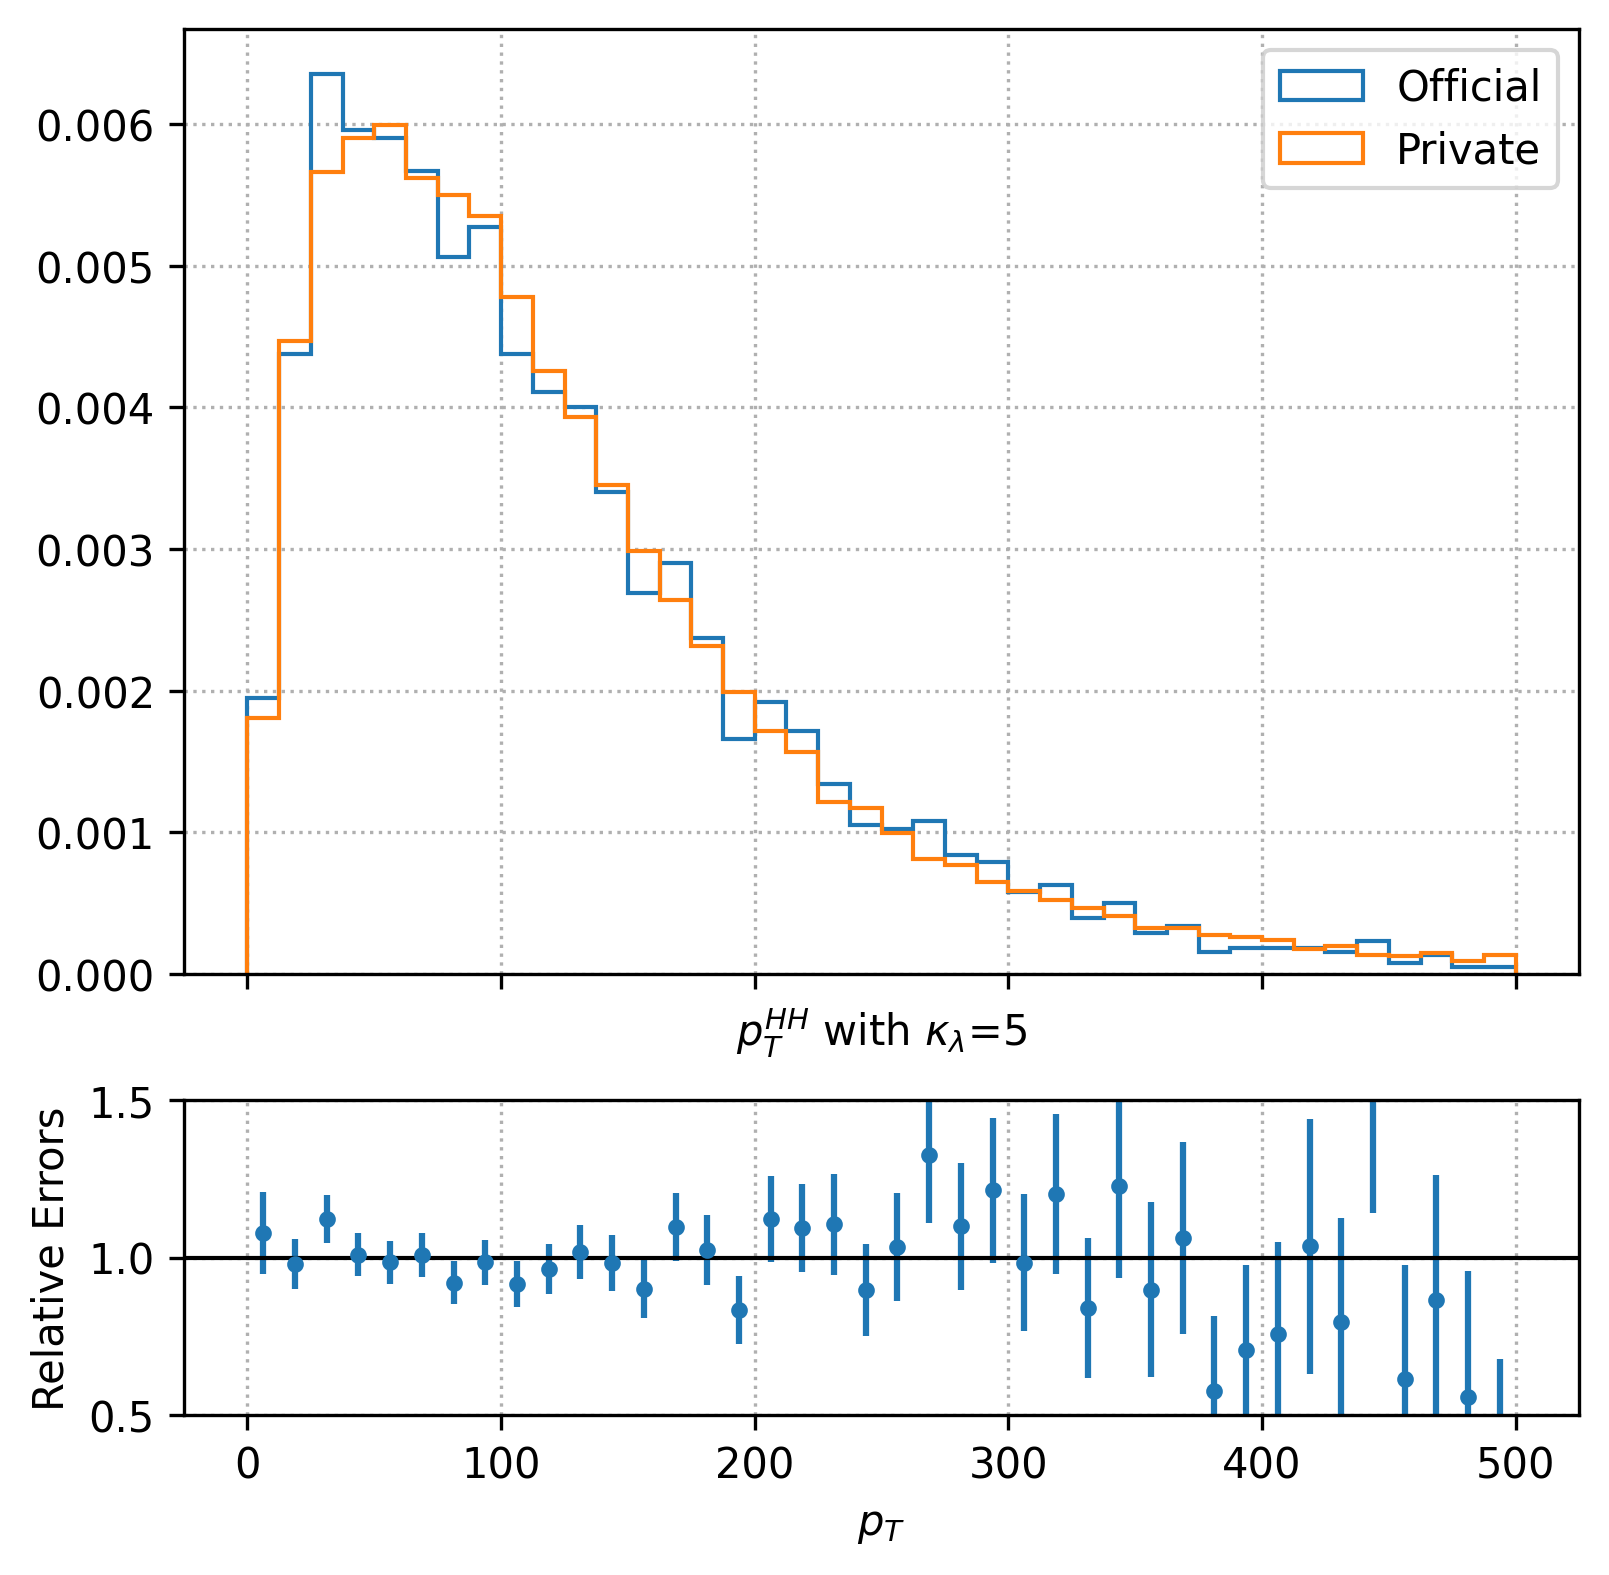

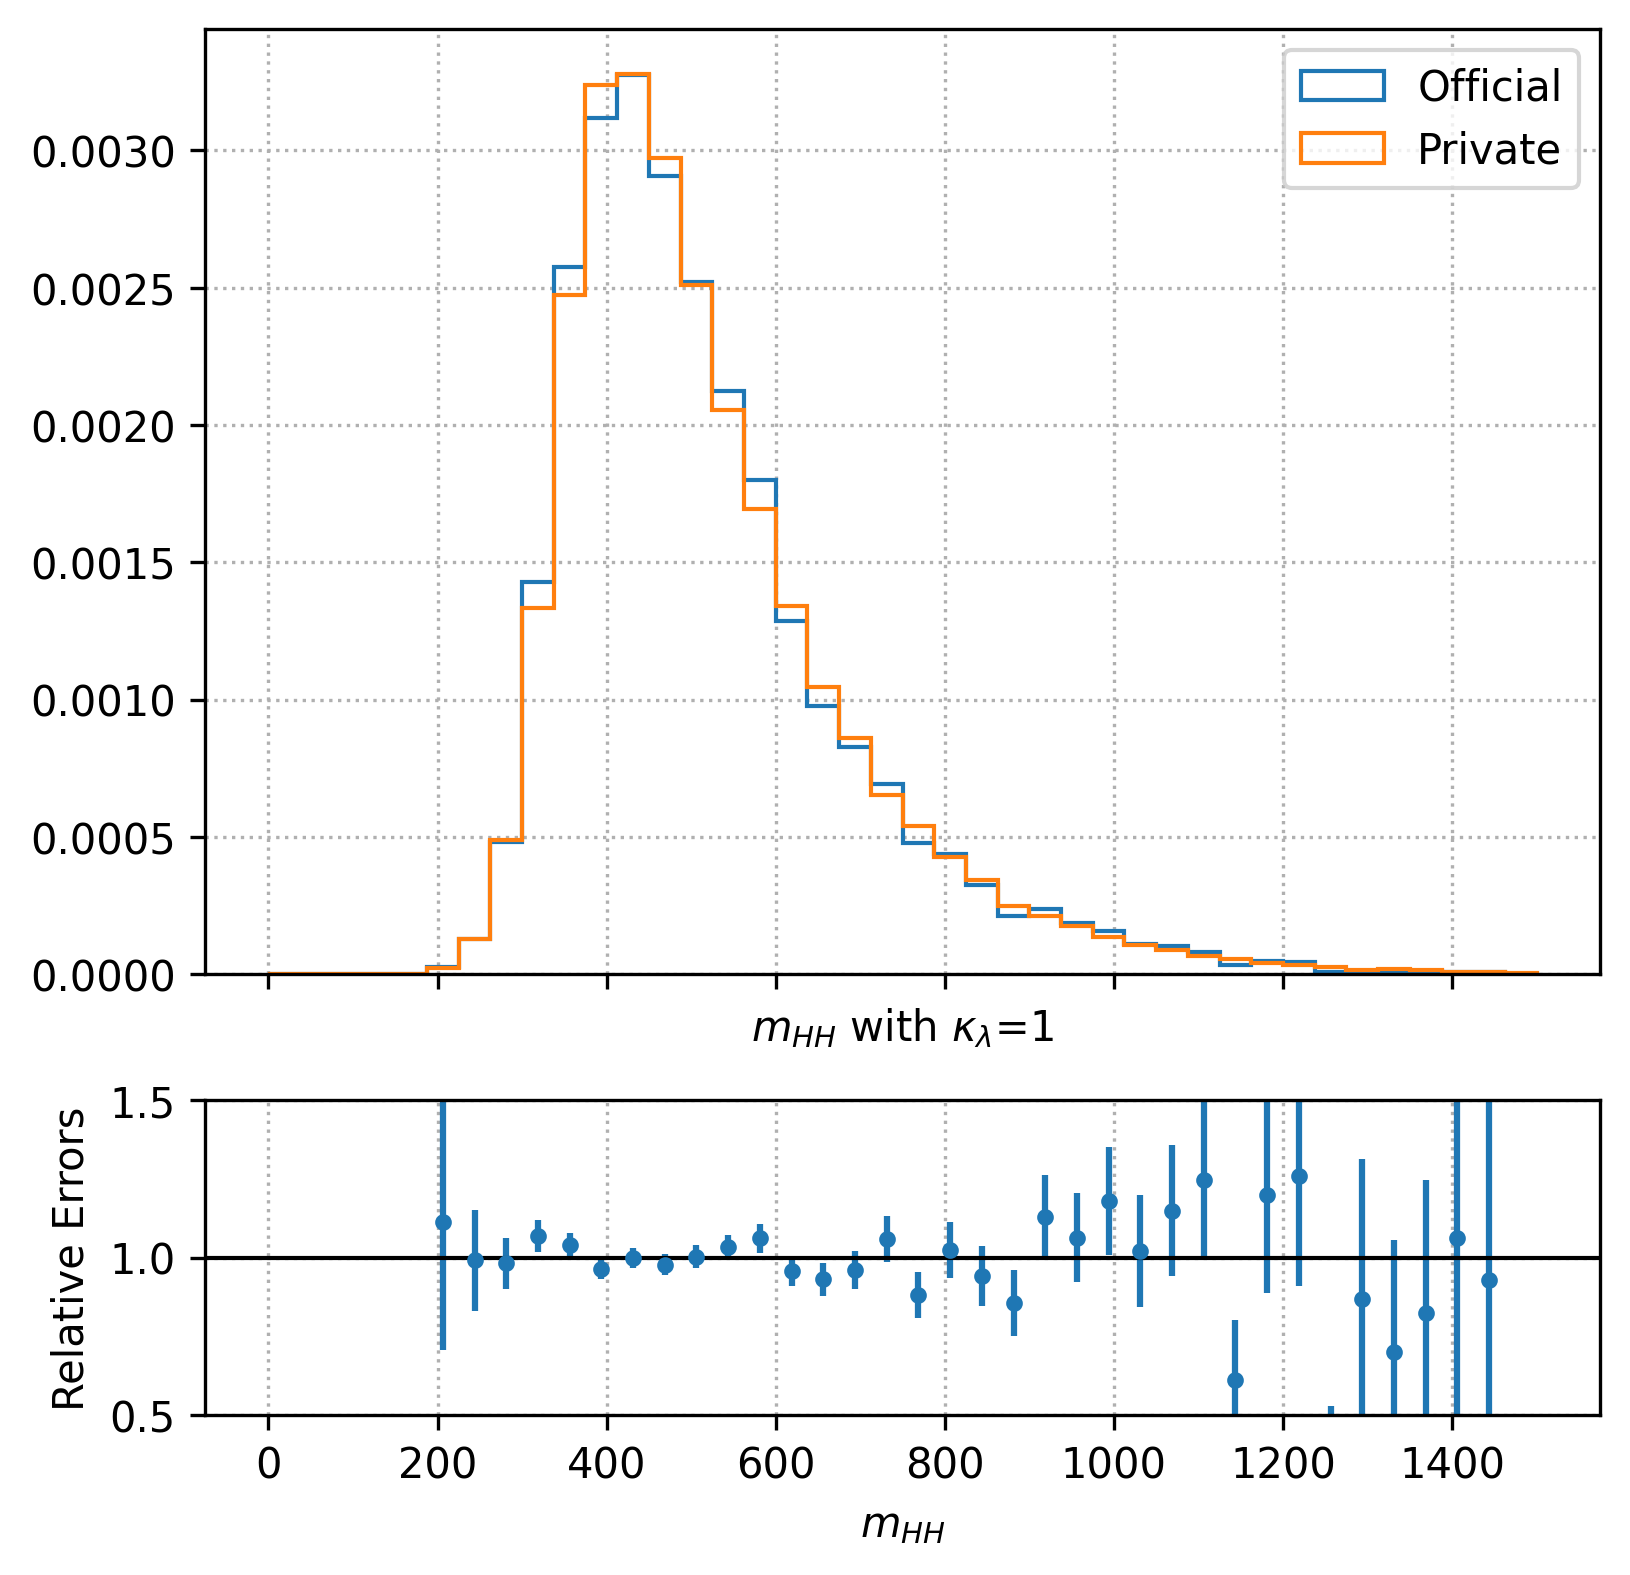

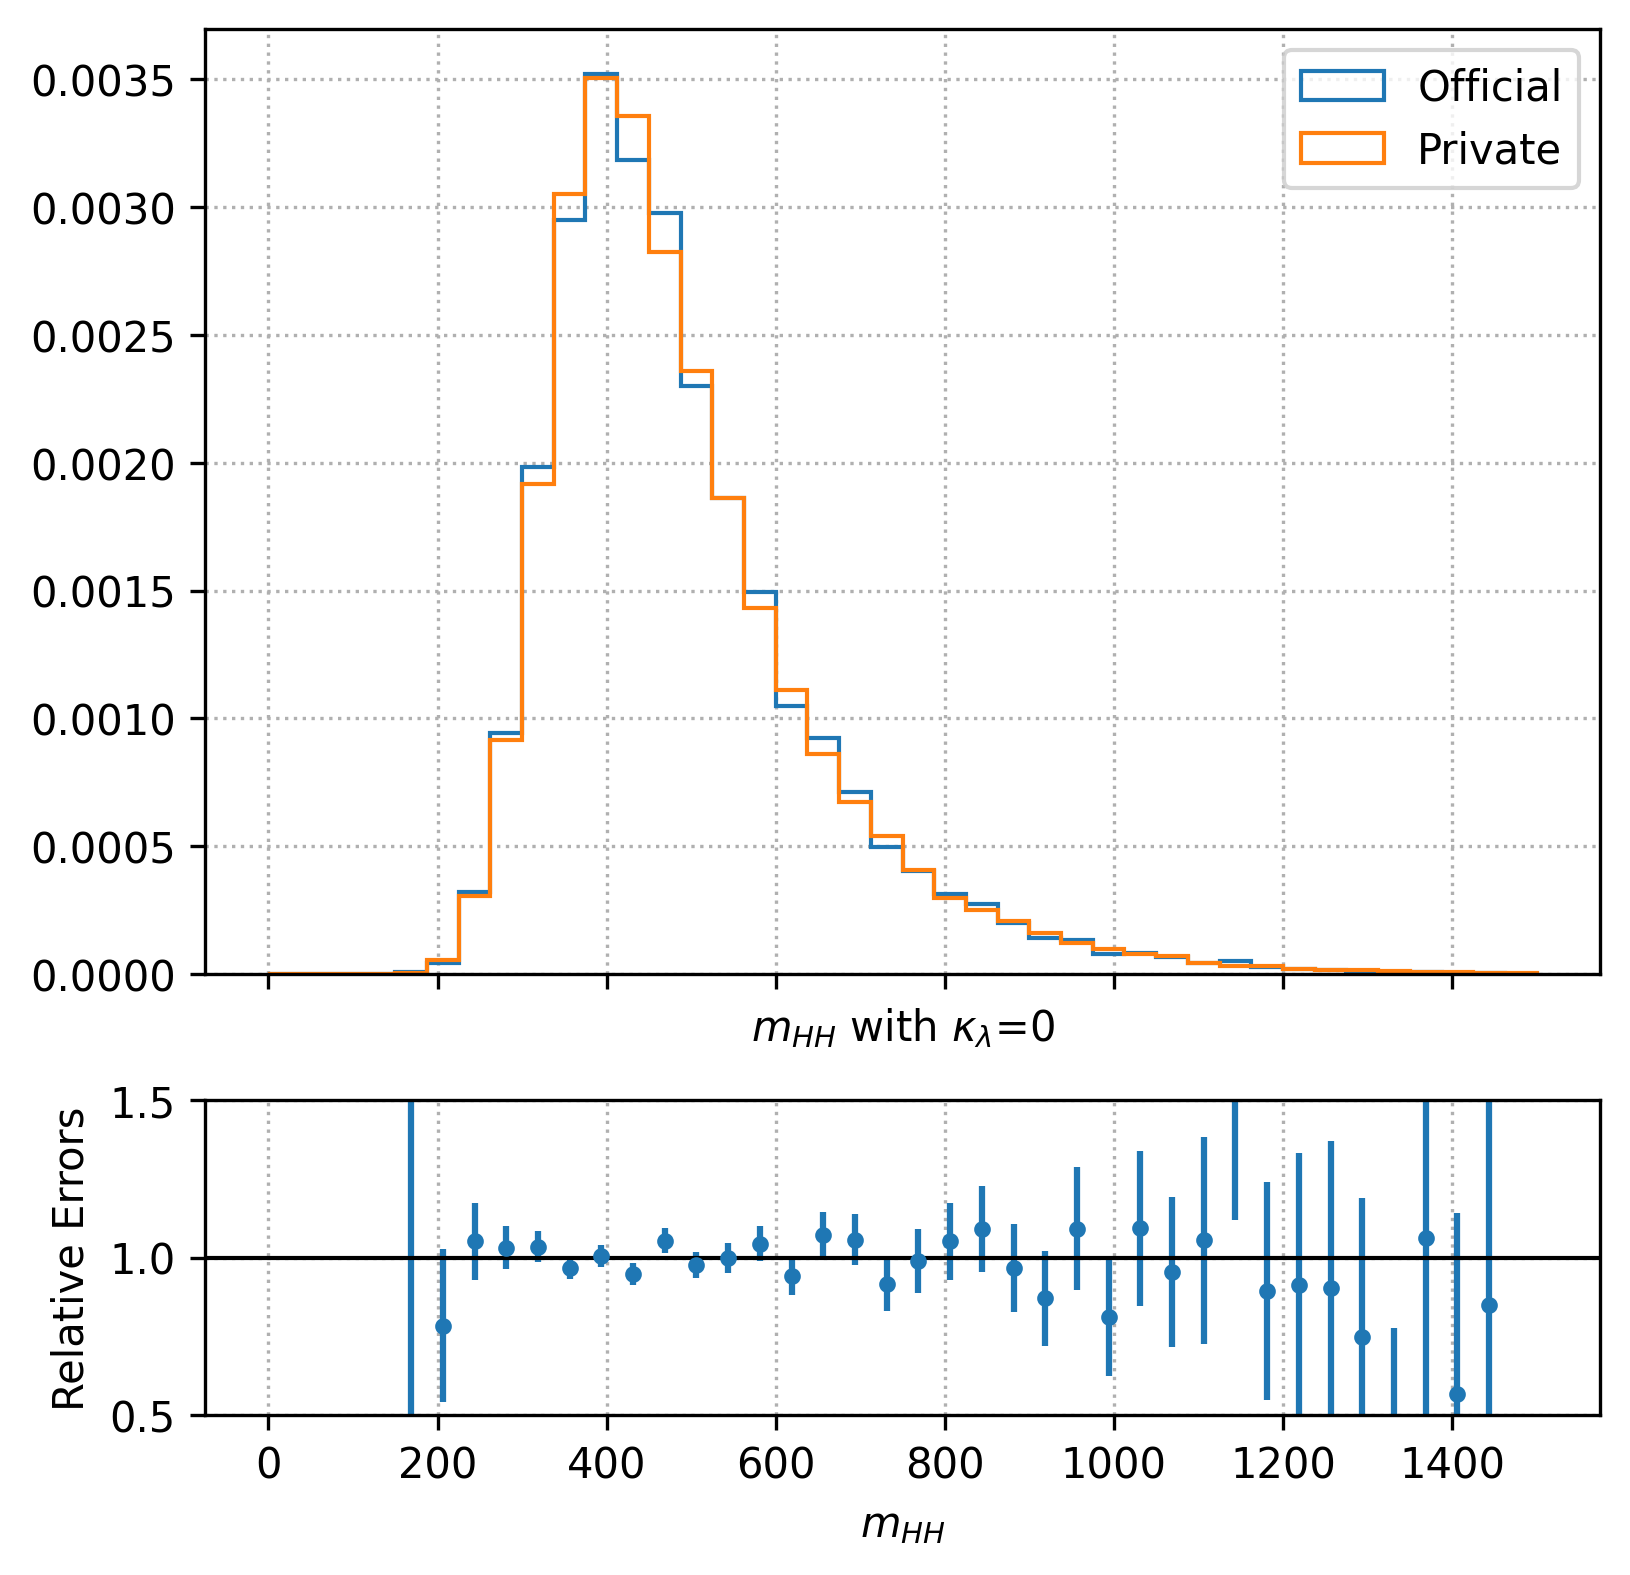

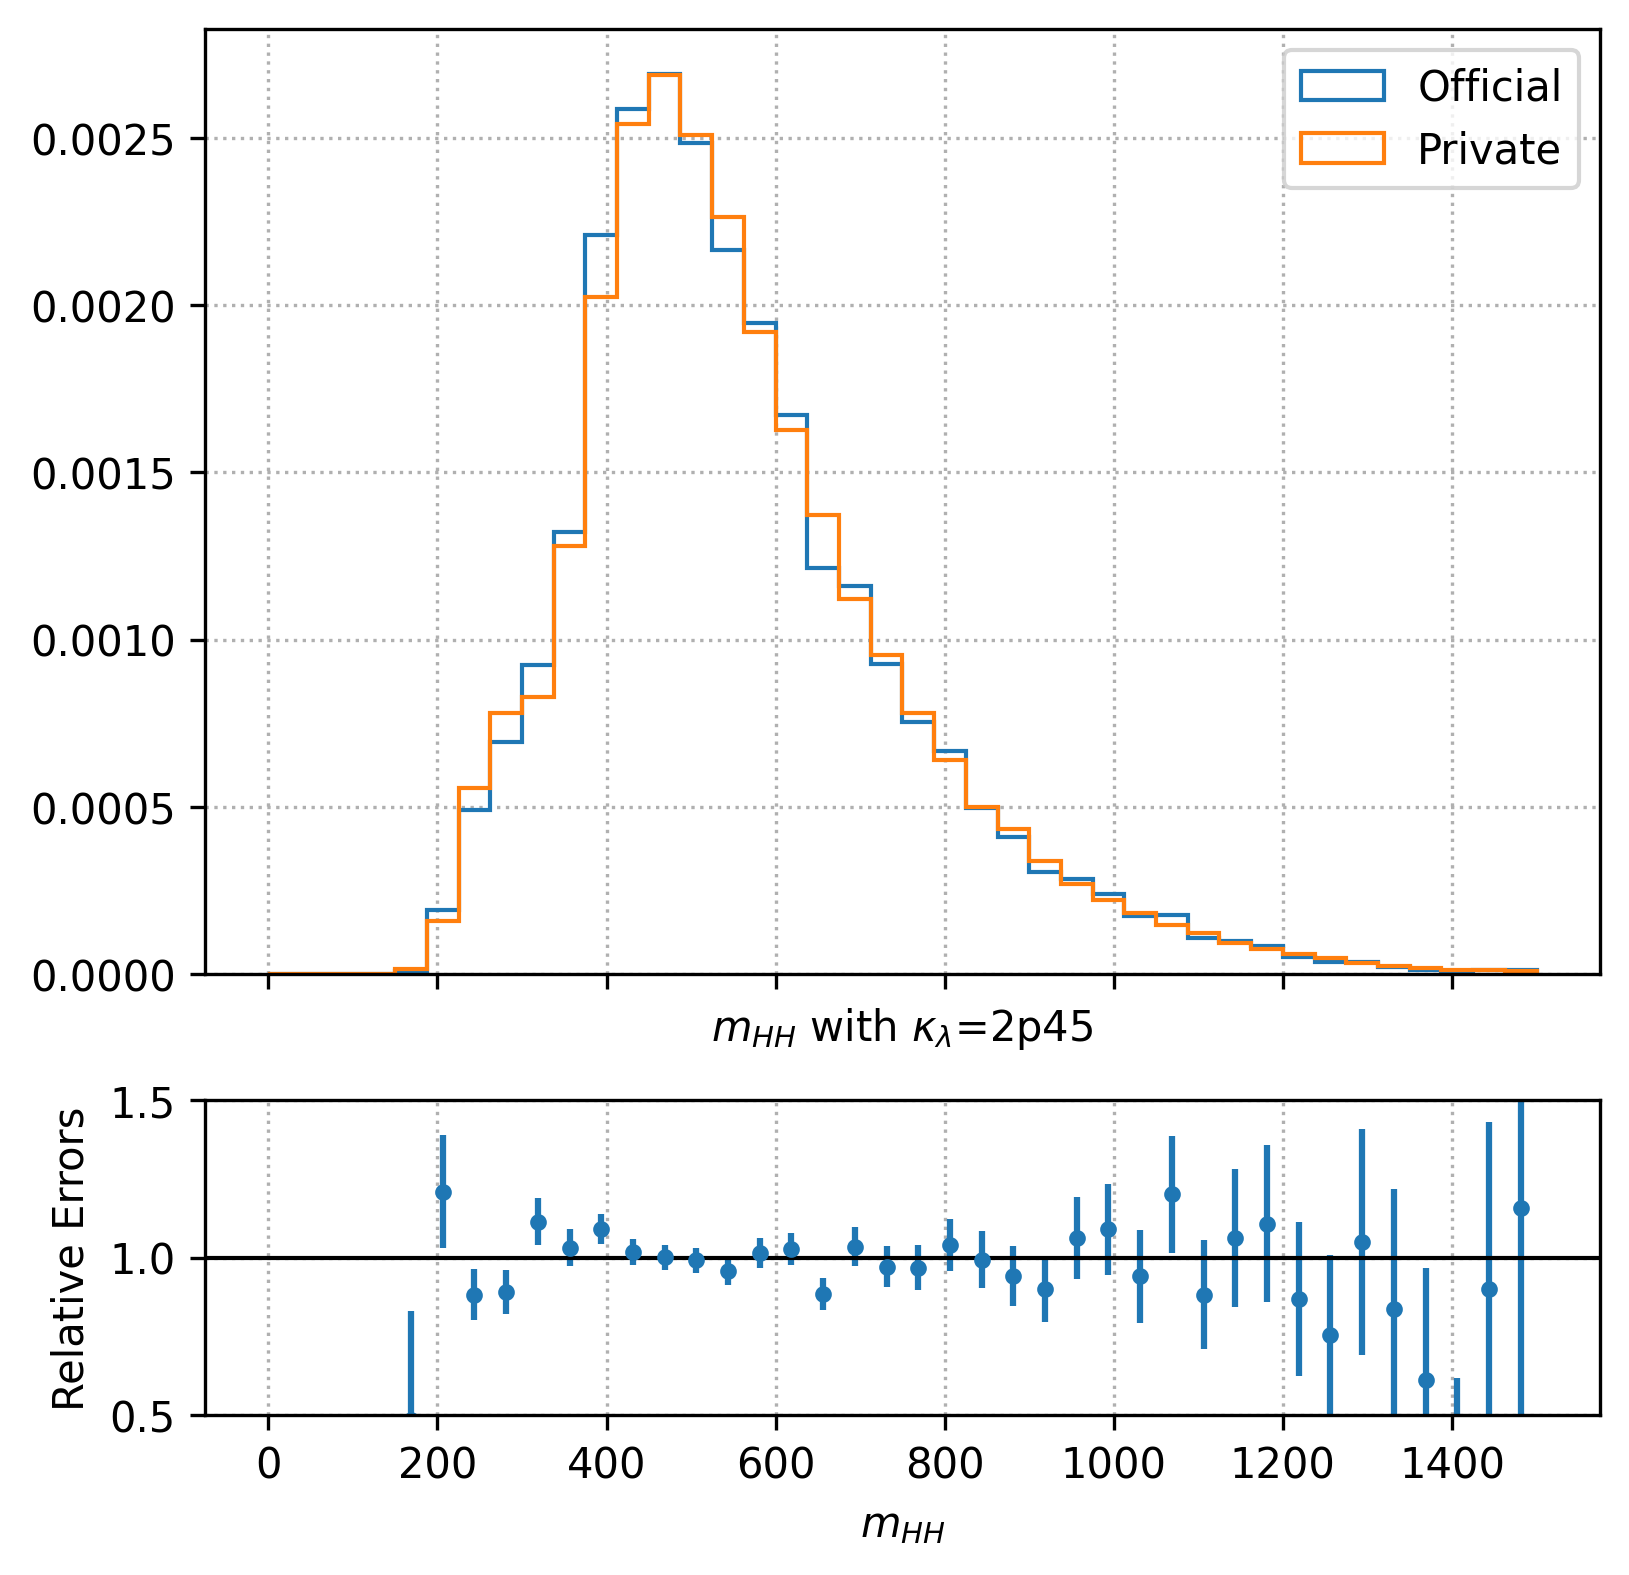

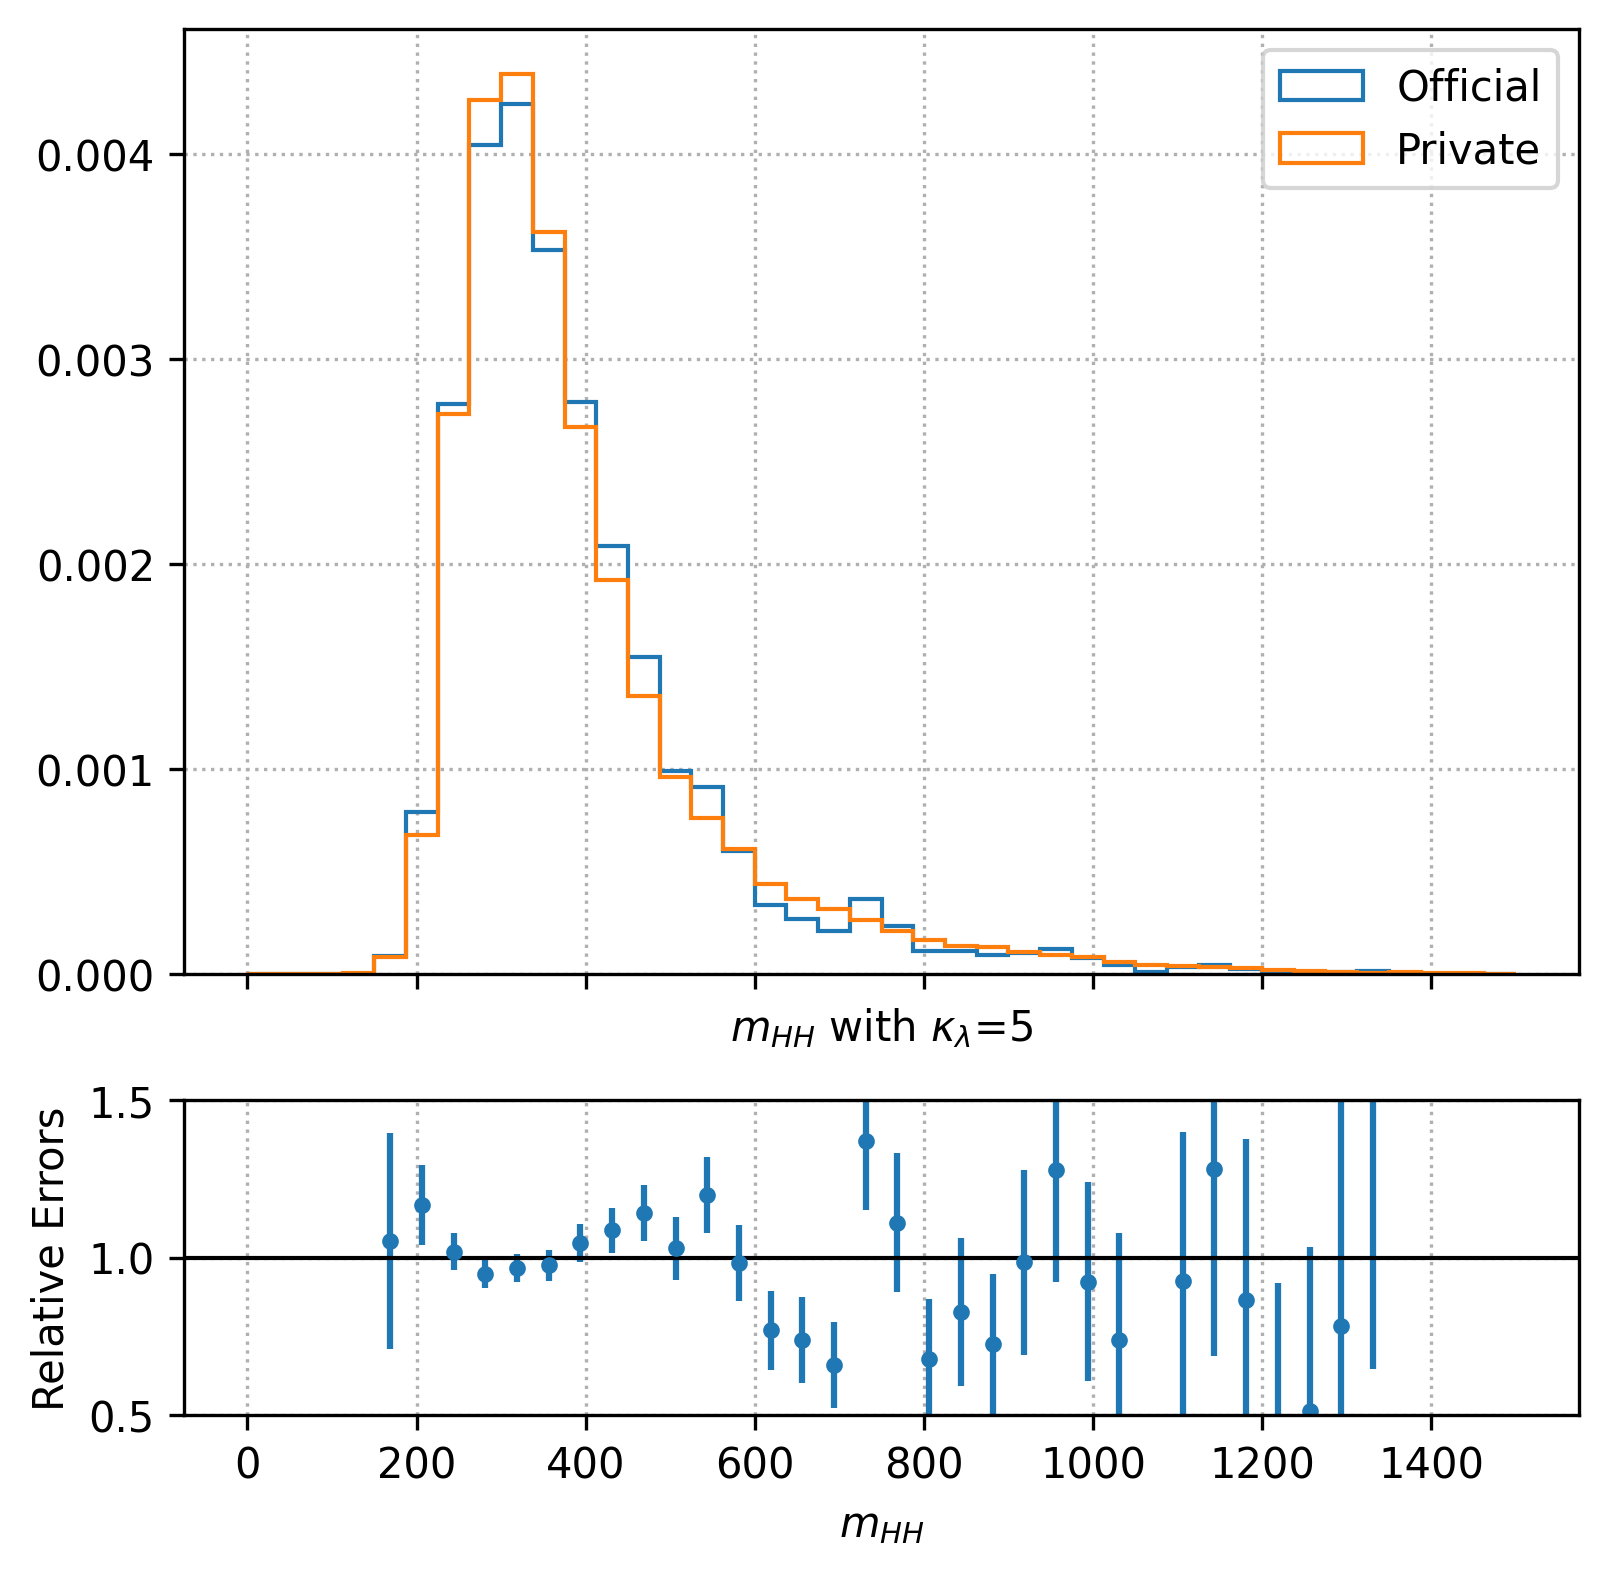

In [ ]:
plot_higgs_error(reco_higgs_1_kl_1_official,reco_higgs_1_kl_1_private, "eta", 40, (-3,3),"1","H1")
plot_higgs_error(reco_higgs_1_kl_0_official,reco_higgs_1_kl_0_private, "eta", 40, (-3,3),"0","H1")
plot_higgs_error(reco_higgs_1_kl_2p45_official,reco_higgs_1_kl_2p45_private, "eta",40, (-3,3), "2p45", "H1")
plot_higgs_error(reco_higgs_1_kl_5_official,reco_higgs_1_kl_5_private, "eta",  40, (-3,3), "5","H1")

plot_higgs_error(reco_higgs_1_kl_1_official,reco_higgs_1_kl_1_private, "mass", 40, (60,180),"1","H1")
plot_higgs_error(reco_higgs_1_kl_0_official,reco_higgs_1_kl_0_private, "mass", 40, (60,180),"0","H1")
plot_higgs_error(reco_higgs_1_kl_2p45_official,reco_higgs_1_kl_2p45_private, "mass",40, (60,180), "2p45", "H1")
plot_higgs_error(reco_higgs_1_kl_5_official,reco_higgs_1_kl_5_private, "mass",  40, (60,180), "5","H1")

plot_higgs_error(reco_higgs_1_kl_1_official,reco_higgs_1_kl_1_private, "pt", 40, (0,500),"1", "H1")
plot_higgs_error(reco_higgs_1_kl_0_official,reco_higgs_1_kl_0_private, "pt", 40, (0,500),"0", "H1")
plot_higgs_error(reco_higgs_1_kl_2p45_official,reco_higgs_1_kl_2p45_private, "pt", 40, (0,500), "2p45","H1")
plot_higgs_error(reco_higgs_1_kl_5_official,reco_higgs_1_kl_5_private, "pt", 40, (0,500), "5", "H1")

plot_higgs_error(reco_higgs_2_kl_1_official,reco_higgs_2_kl_1_private, "mass", 40, (60,180),"1","H2")
plot_higgs_error(reco_higgs_2_kl_0_official,reco_higgs_2_kl_0_private, "mass", 40, (60,180),"0","H2")
plot_higgs_error(reco_higgs_2_kl_2p45_official,reco_higgs_2_kl_2p45_private, "mass",40, (60,180), "2p45", "H2")
plot_higgs_error(reco_higgs_2_kl_5_official,reco_higgs_2_kl_5_private, "mass",  40, (60,180), "5","H2")

plot_higgs_error(reco_higgs_2_kl_1_official,reco_higgs_2_kl_1_private, "eta", 40, (-3,3),"1","H2")
plot_higgs_error(reco_higgs_2_kl_0_official,reco_higgs_2_kl_0_private, "eta", 40, (-3,3),"0","H2")
plot_higgs_error(reco_higgs_2_kl_2p45_official,reco_higgs_2_kl_2p45_private, "eta",40, (-3,3), "2p45", "H2")
plot_higgs_error(reco_higgs_2_kl_5_official,reco_higgs_2_kl_5_private, "eta",  40, (-3,3), "5","H2")

plot_higgs_error(reco_higgs_2_kl_1_official,reco_higgs_2_kl_1_private, "pt", 40, (0,500),"1", "H2")
plot_higgs_error(reco_higgs_2_kl_0_official,reco_higgs_2_kl_0_private, "pt", 40, (0,500),"0", "H2")
plot_higgs_error(reco_higgs_2_kl_2p45_official,reco_higgs_2_kl_2p45_private, "pt", 40, (0,500), "2p45","H2")
plot_higgs_error(reco_higgs_2_kl_5_official,reco_higgs_2_kl_5_private, "pt", 40, (0,500), "5", "H2")

plot_higgs_error(reco_hh_kl_1_official,reco_hh_kl_1_private, "eta", 40, (-6,6),"1","HH")
plot_higgs_error(reco_hh_kl_0_official,reco_hh_kl_0_private, "eta", 40, (-6,6),"0","HH")
plot_higgs_error(reco_hh_kl_2p45_official,reco_hh_kl_2p45_private, "eta", 40, (-6,6),"2p45","HH")
plot_higgs_error(reco_hh_kl_5_official,reco_hh_kl_5_private, "eta", 40, (-6,6),"5","HH")

plot_higgs_error(reco_hh_kl_1_official,reco_hh_kl_1_private, "pt", 40, (0,500),"1","HH")
plot_higgs_error(reco_hh_kl_0_official,reco_hh_kl_0_private, "pt", 40, (0,500),"0","HH")
plot_higgs_error(reco_hh_kl_2p45_official,reco_hh_kl_2p45_private, "pt", 40, (0,500),"2p45","HH")
plot_higgs_error(reco_hh_kl_5_official,reco_hh_kl_5_private, "pt", 40, (0,500),"5","HH")

plot_higgs_error(reco_hh_kl_1_official,reco_hh_kl_1_private, "mass", 40, (0,1500),"1","HH")
plot_higgs_error(reco_hh_kl_0_official,reco_hh_kl_0_private, "mass", 40, (0,1500),"0","HH")
plot_higgs_error(reco_hh_kl_2p45_official,reco_hh_kl_2p45_private, "mass", 40, (0,1500),"2p45","HH")
plot_higgs_error(reco_hh_kl_5_official,reco_hh_kl_5_private, "mass", 40, (0,1500),"5","HH")


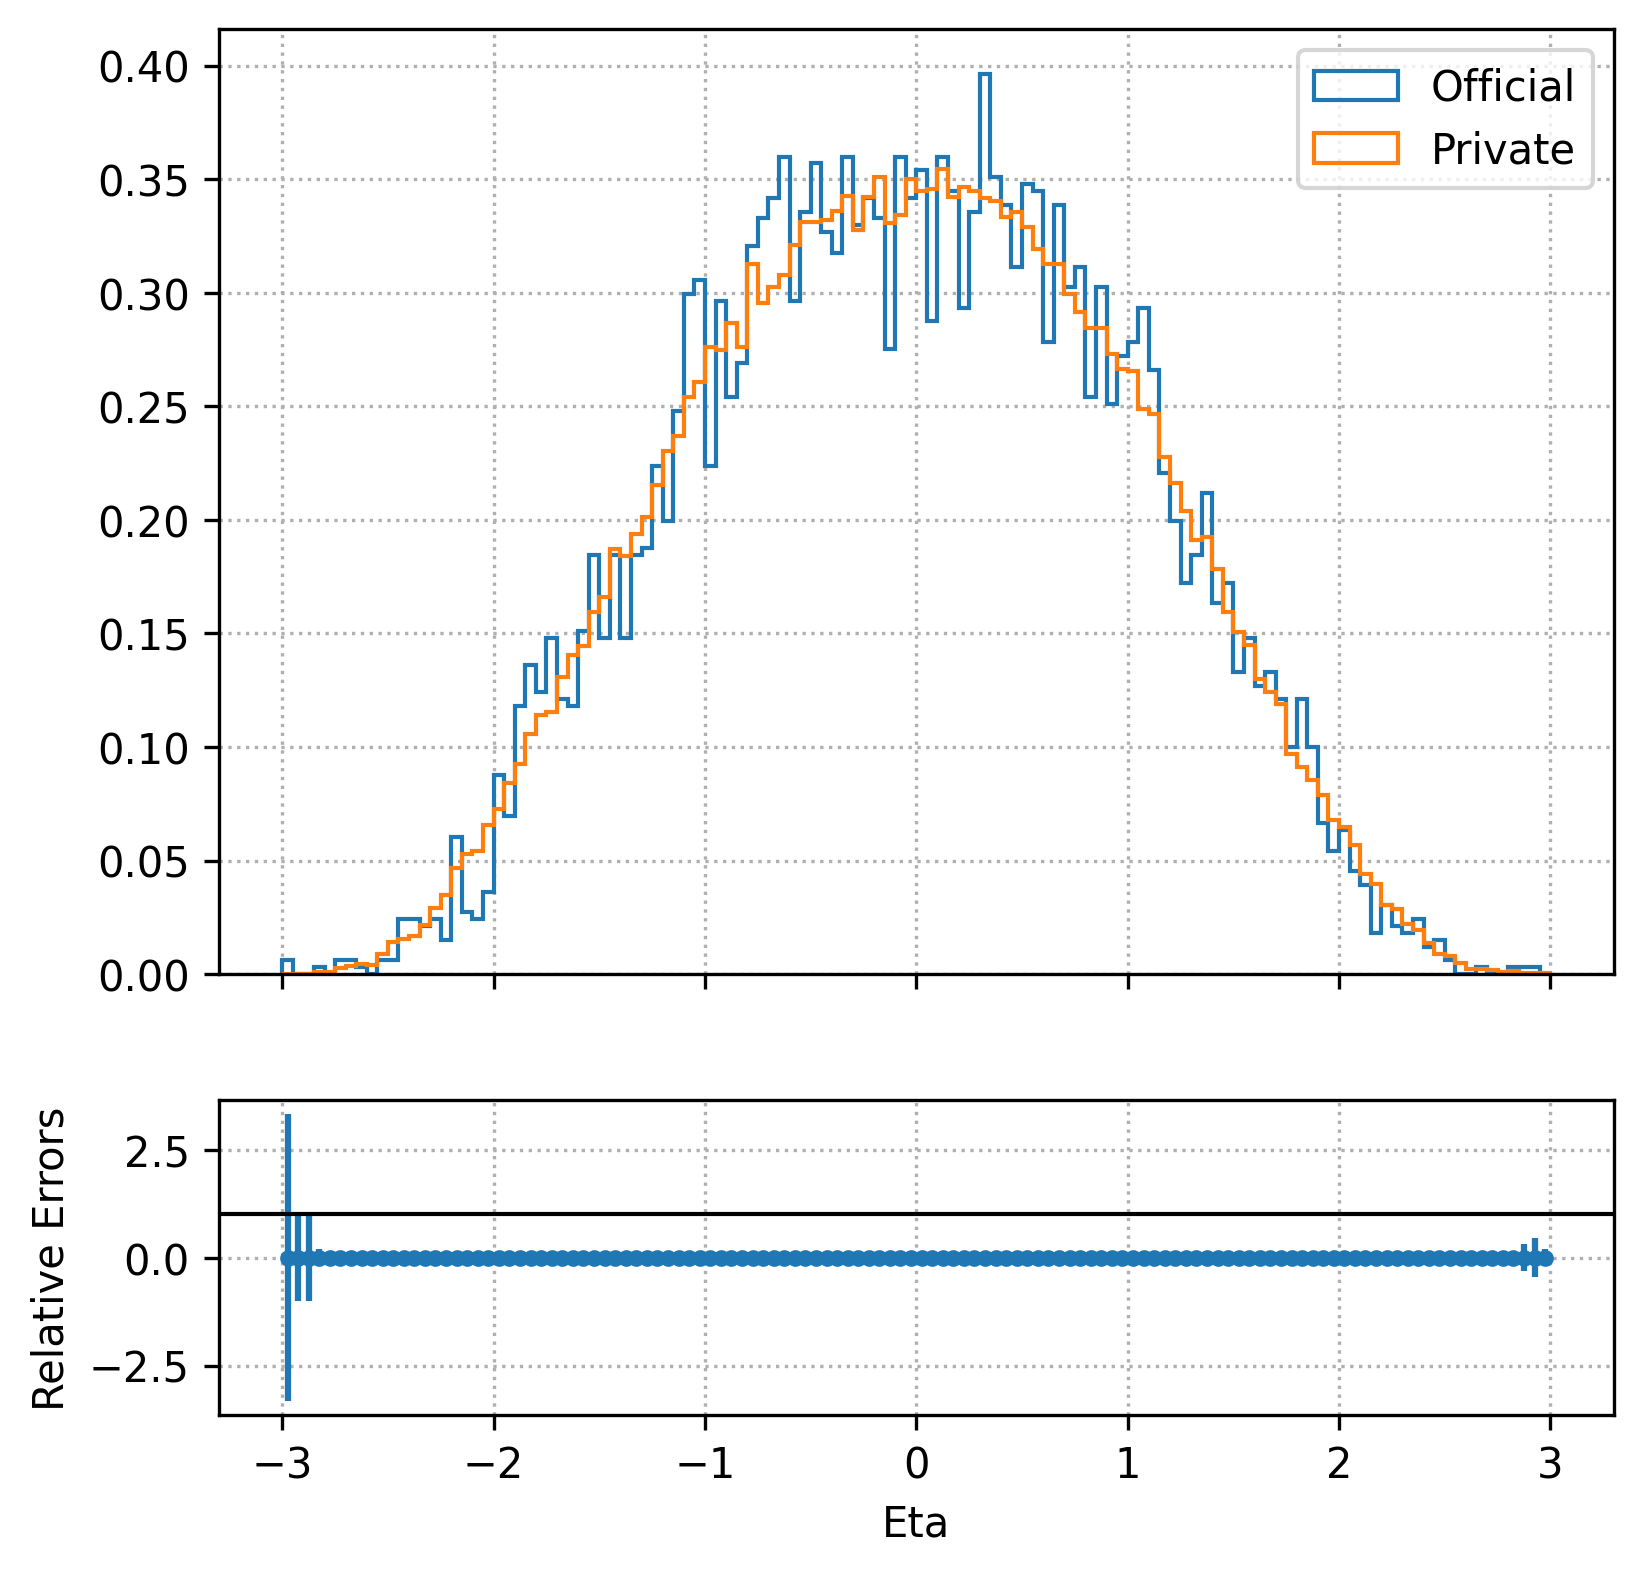

In [ ]:
# Convert data to numpy arrays
official_eta = ak.to_numpy(reco_higgs_1_kl_0_official.eta)
private_eta = ak.to_numpy(reco_higgs_1_kl_0_private.eta)

# Plot using your function
#plot_higgs_eta(reco_higgs_1_kl_0_official, reco_higgs_1_kl_0_private, 0, "leading")

# Calculate histograms
counts_o, bin_edges_o = np.histogram(official_eta, bins=120, range=(-3,3))
counts_p, bin_edges_p = np.histogram(private_eta, bins=120, range=(-3,3))

# Assuming error calculation is to be reviewed - this is an example of how it might be done
errors_o = np.sqrt(counts_o)
errors_p = np.sqrt(counts_p)
ratio= (counts_o/np.sum(counts_o))*(counts_p/np.sum(counts_p))
ratio_errors = np.sqrt((errors_o/counts_p)**2 + ((errors_p + counts_o)/(counts_p)**2)**2)

# Setup your subplots
fig, (ax1, ax2) = plt.subplots(figsize=(6, 6), nrows=2, sharex=True, gridspec_kw={"height_ratios": [3, 1]})
bin_centers = 0.5 * (bin_edges_o[:-1] + bin_edges_o[1:])


# Plot histograms on the first axis
ax1.hist(official_eta, bins=120, range=(-3,3), histtype="step", label="Official", density=True)
ax1.hist(private_eta, bins=120, range=(-3,3), histtype="step", label="Private", density=True)
ax1.legend()
ax1.grid(linestyle=':')

# Plot relative errors on the second axis
ax2.errorbar(bin_centers, ratio, yerr=ratio_errors, marker=".", label='Ratio with Errors')
ax2.axhline(1, color="black", linewidth=1)
ax2.set_xlabel('Eta')
ax2.set_ylabel('Relative Errors')
ax2.grid(linestyle=':')

plt.show()
